# <font color='blue'> Table Of Contents </font>

### <font color='blue'> AWS IoT Analytics : Introduction </font>

### <font color='blue'> AWS IoT Analytics : Channel Creation </font>

### <font color='blue'> AWS IoT Analytics : Datastore Creation </font>

### <font color='blue'> AWS IoT Analytics : Pipeline Creation </font>

### <font color='blue'> AWS IoT Analytics : Dataset Creation </font>

### <font color='blue'> AWS IoT Analytics : Notebook Creation </font>

### <font color='blue'> BedSideMonitor example </font>




# <font color='blue'> AWS IoT analytics : Introduction </font>


In this lab, we'll go through a complete workflow of an IoT Analytics example. We'll source the data from IoT topic that is being published to by the BedSideMonitor simulator that we used in previous labs. It's a streaming input so after the following configuration, the code should be running and pushing data to AWS IoT Core for it to appear in IoT Analytics flow.

We'll create channels, datasets, datastores and pipelines using AWS IoT analytics services. These concepts were discussed in the course videos.

We'll configure the local simulator program based on the certificate and keys, transmit and validate the data using the MQTT test client on AWS IoT Core.

Once the data is available on analytics platform, we will create AWS IoT notebook to perform anomaly detection on the pushed data. 

In this week we will be extending the previous use case, using the same healthcare device - Bed side monitor - to tie the whole flow together.

You can do all of these in your AWS Educate account. You can also use a generic AWS account.

We can divide this lab in different sections as mentioned above. 


# <font color='blue'> IAM role creation : Introduction </font>

We will be creating two roles that we require to complete this lab. These roles are required while creating the channela dn while creating the notebook.  

To create a new role follow these steps-

**A. Channel role Creation**

1. On AWS console search for `IAM` service and click on `Roles` option.

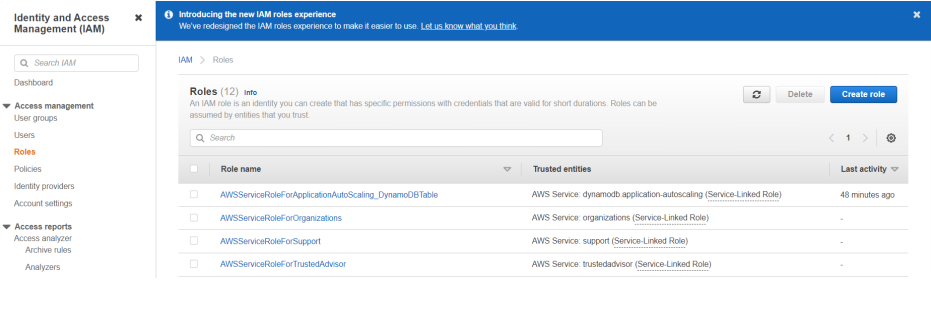

2. Click on `Create role`, you will get a screen as follows-

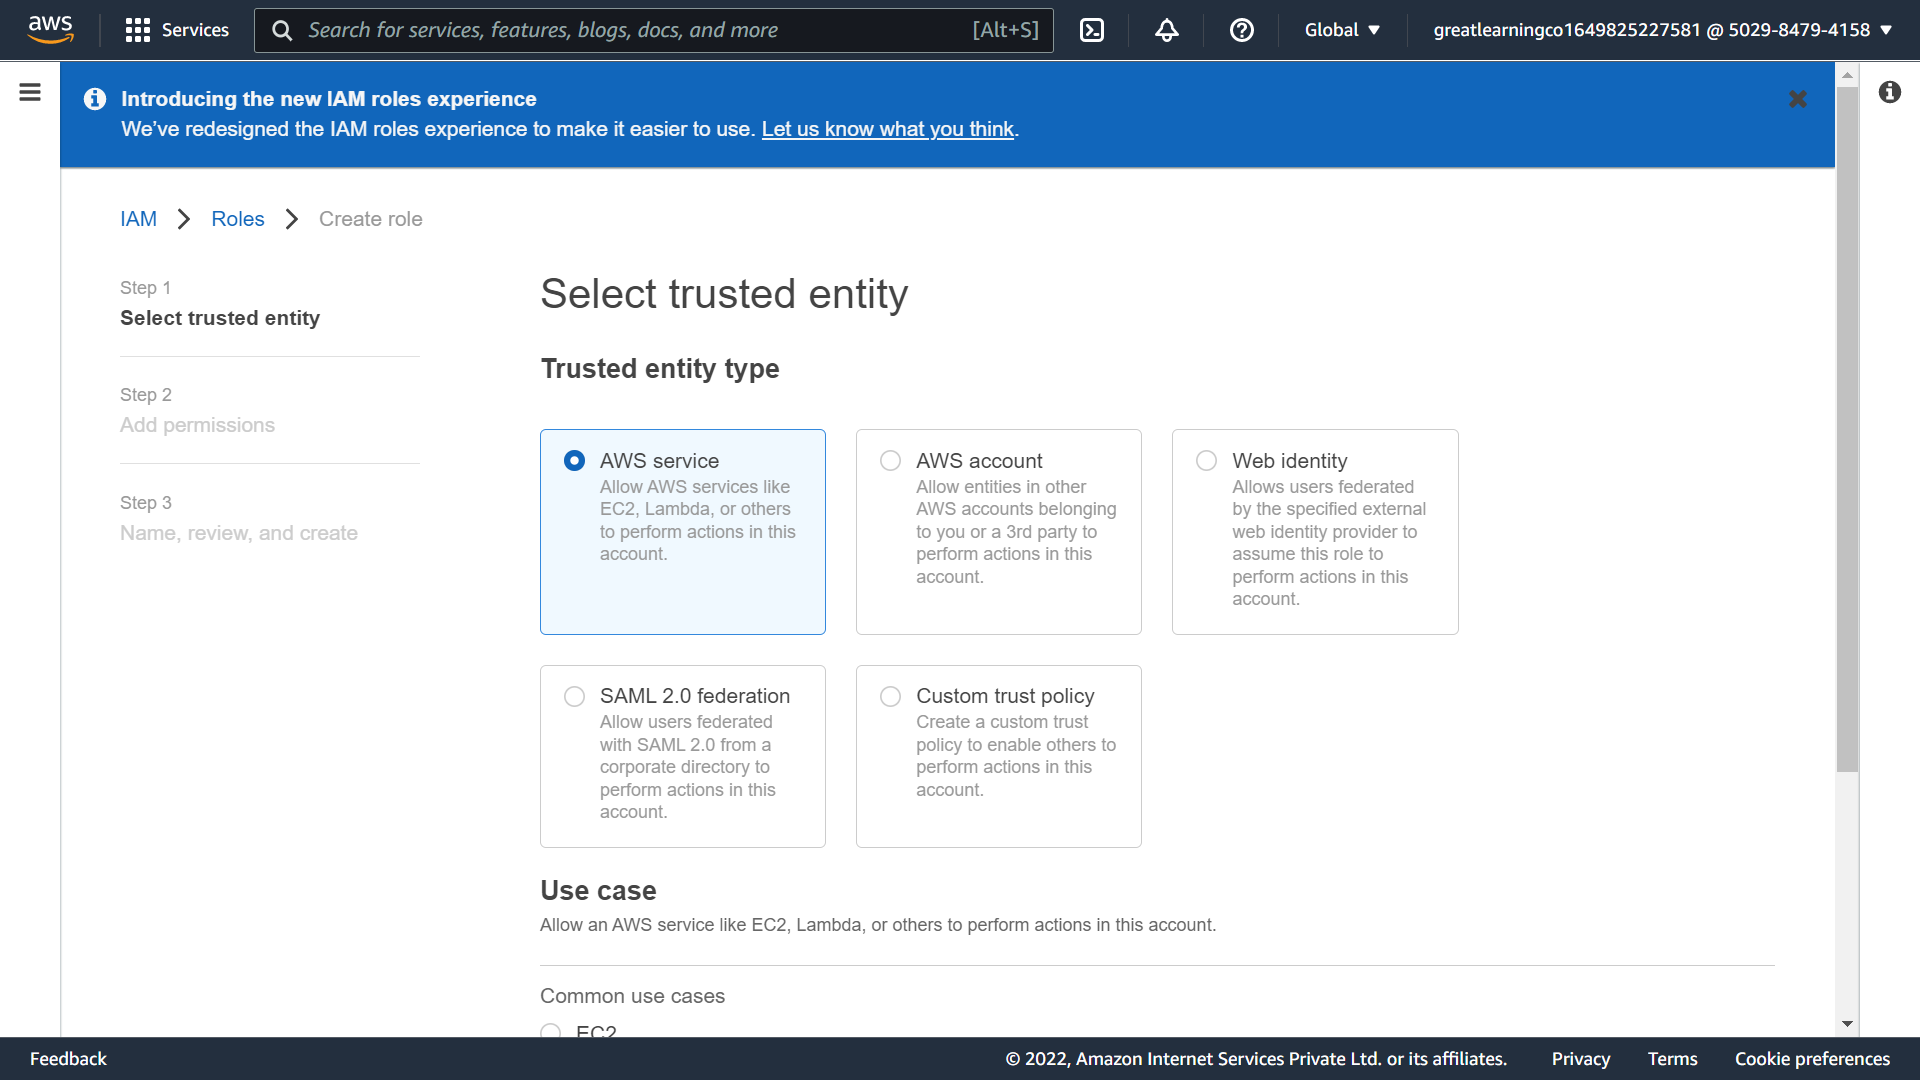

3. Scroll down to choose `IOT` as the Use Case for other AWS services as shown below-

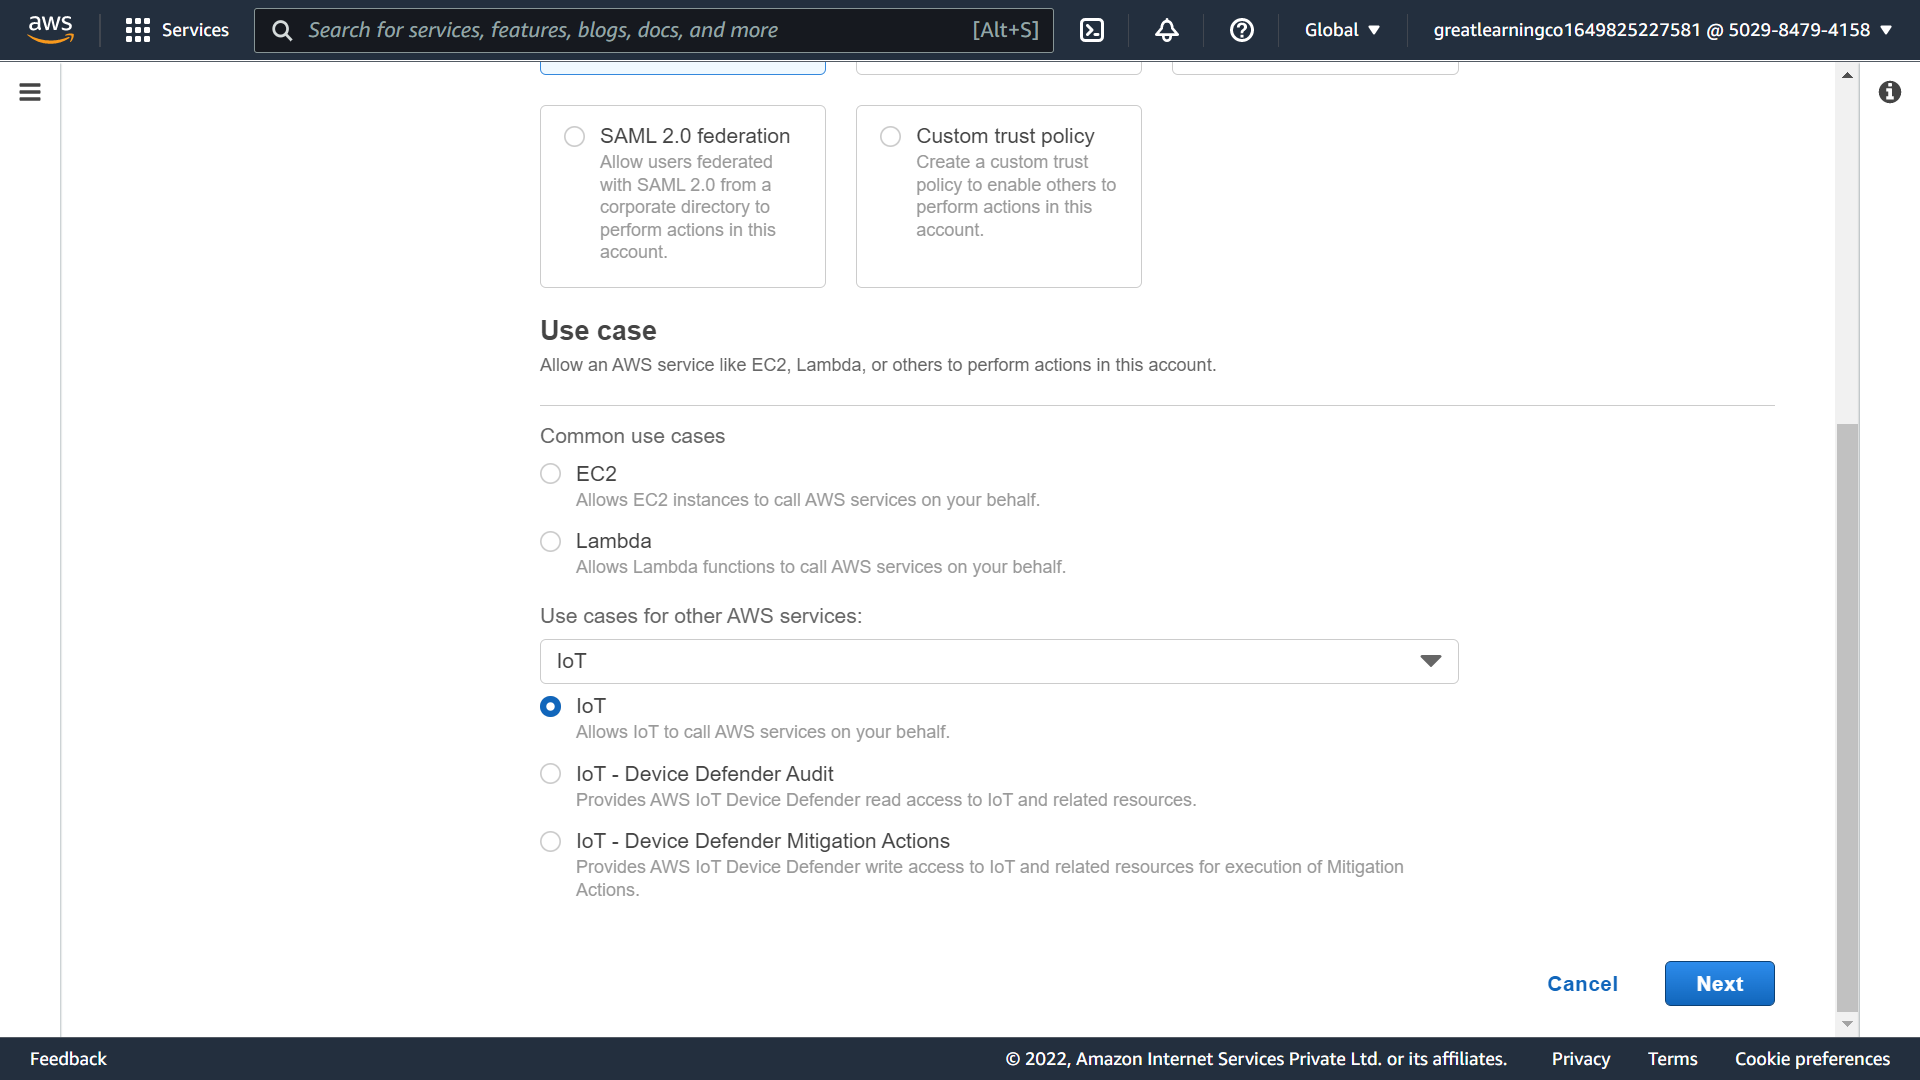

4. Click `Next` and you will get the screen for Permission Policies. Click `Next` again.

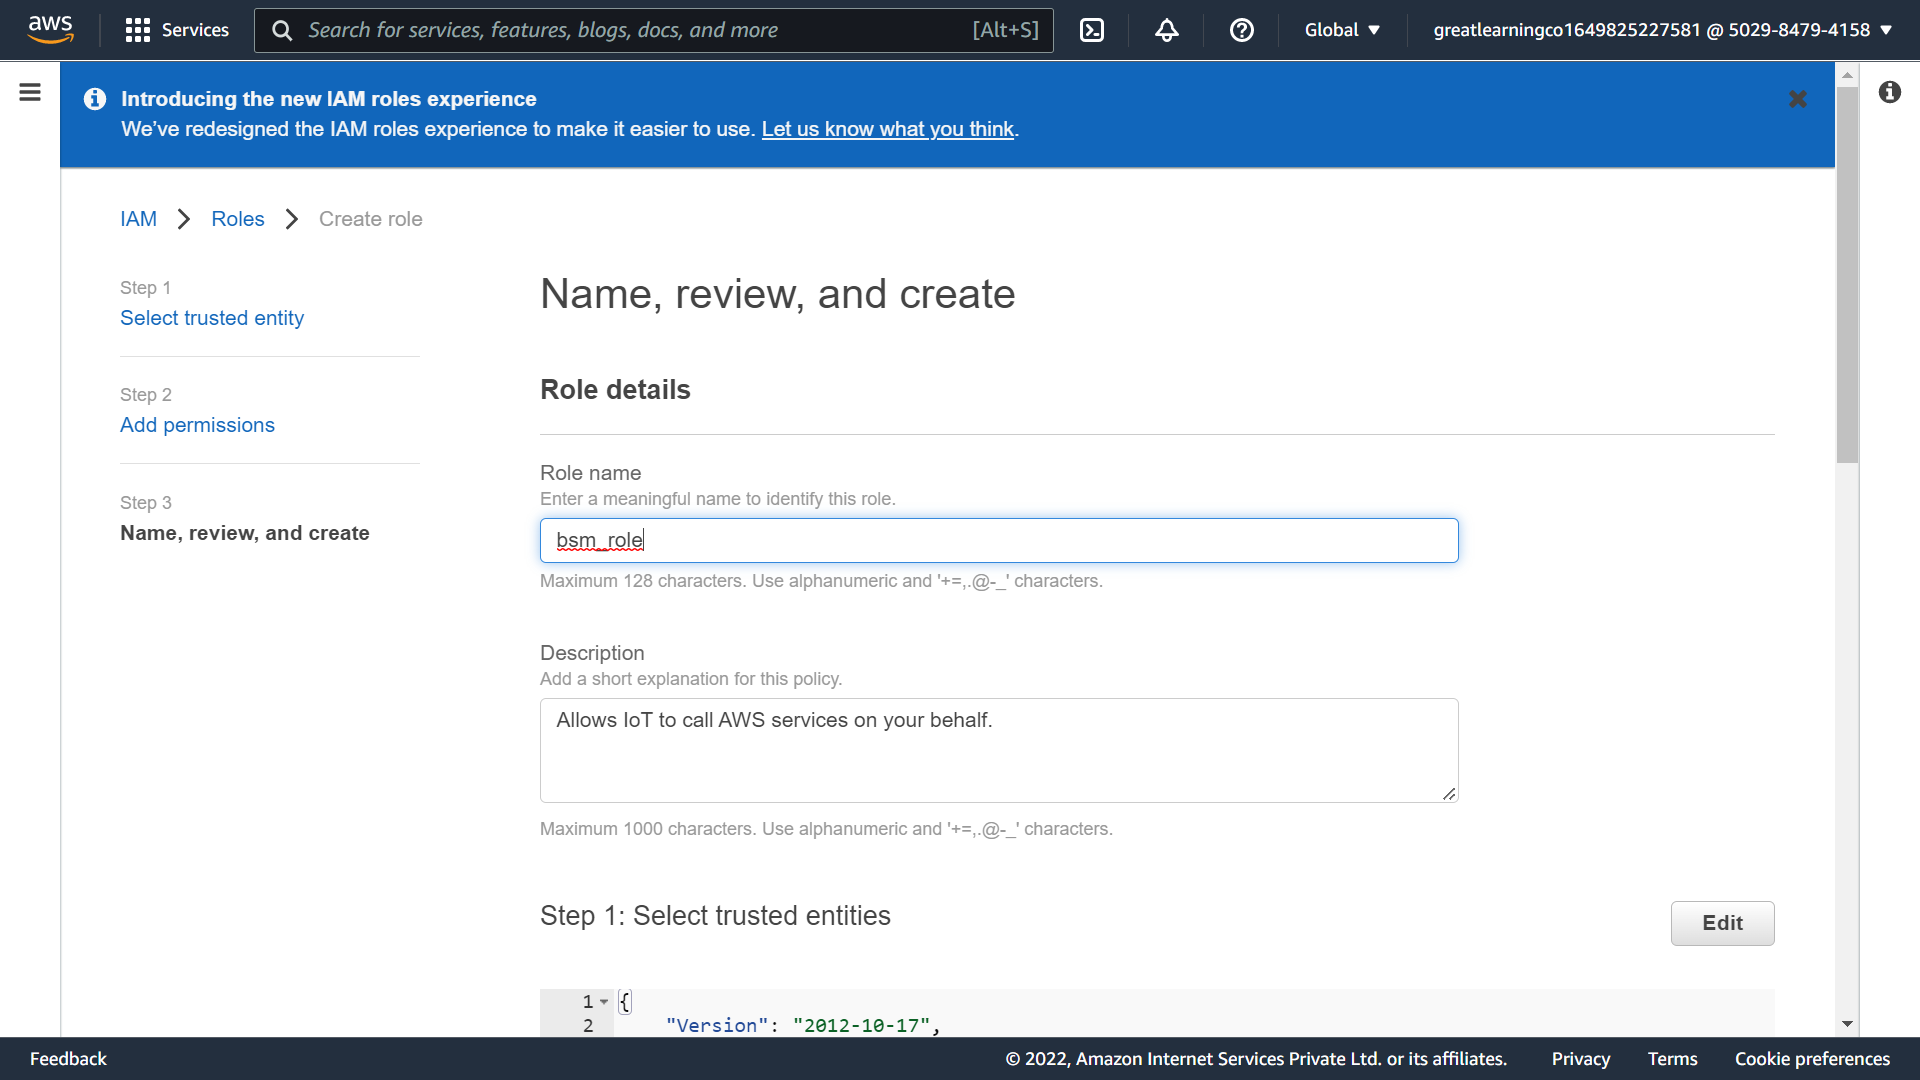

5. Give the Role name and click on `Create role`. On successful creation you can see the role name list in the roles list. Click on the role that was created and click on 'Add Permissions'

6. Search for S3FullAccess and IoTAnalyticsFullAccess. Once the policices are attached complete the process.

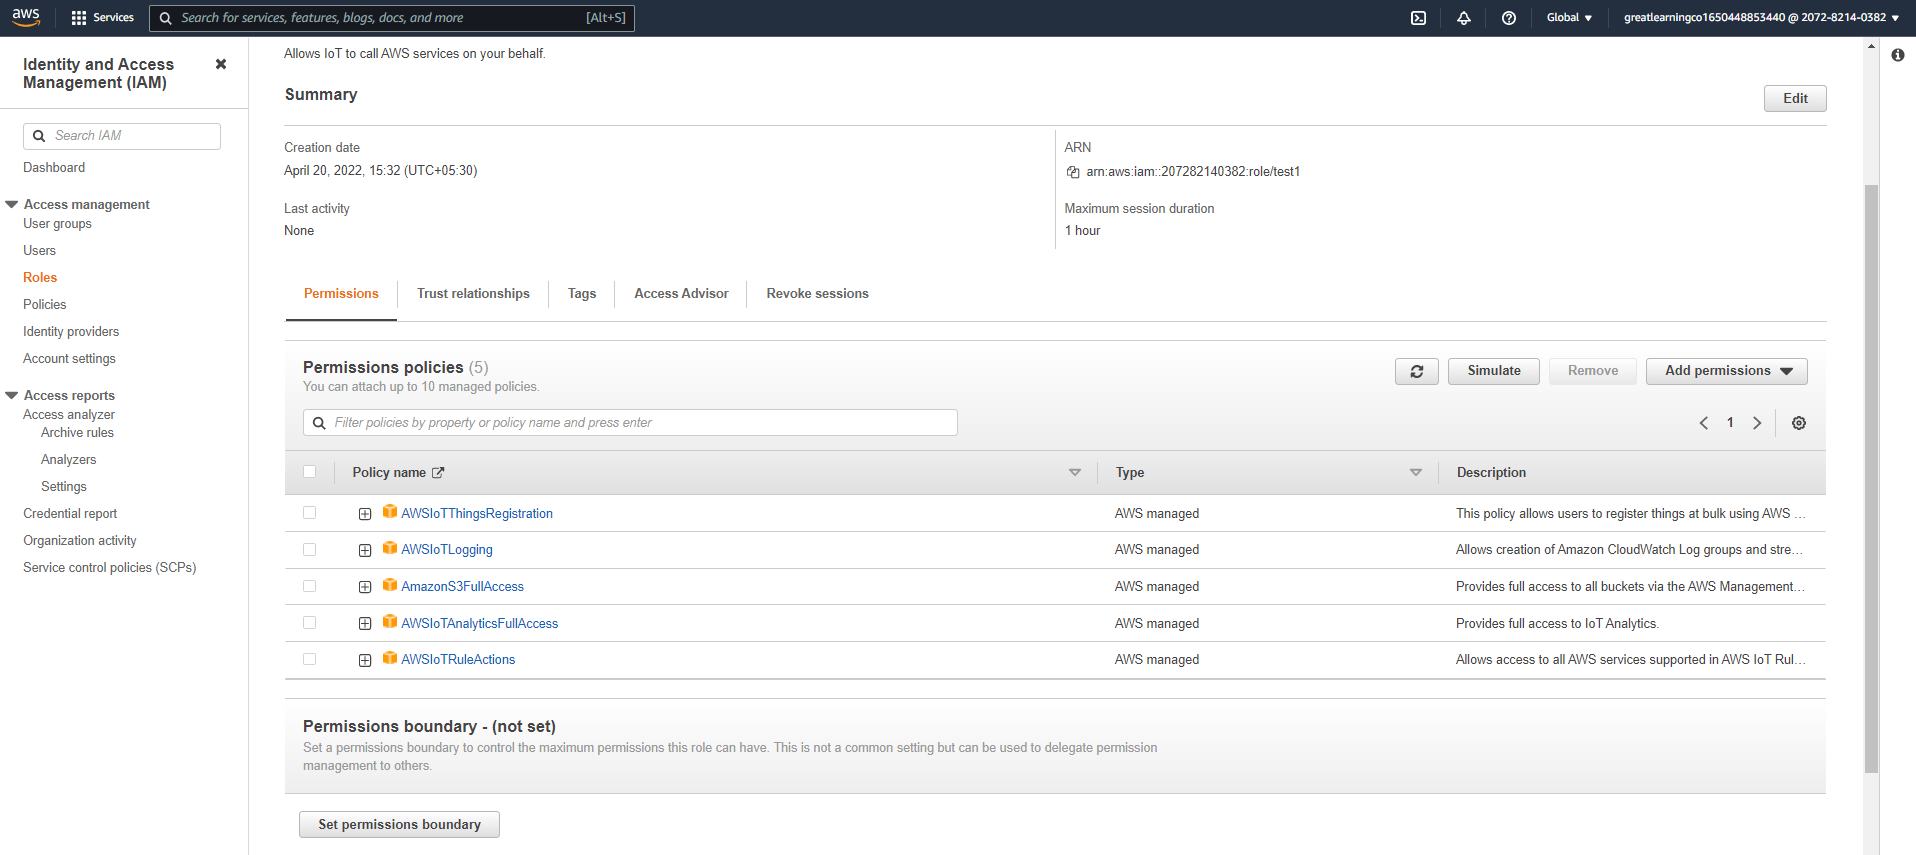

**B. Notebook role Creation**


1. On AWS console search for `IAM` service and click on `Roles` option.

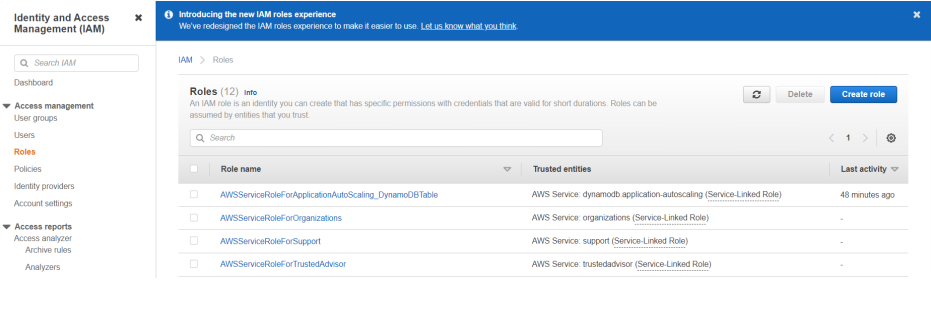

2. Click on `Create role`, you will get a screen as follows-

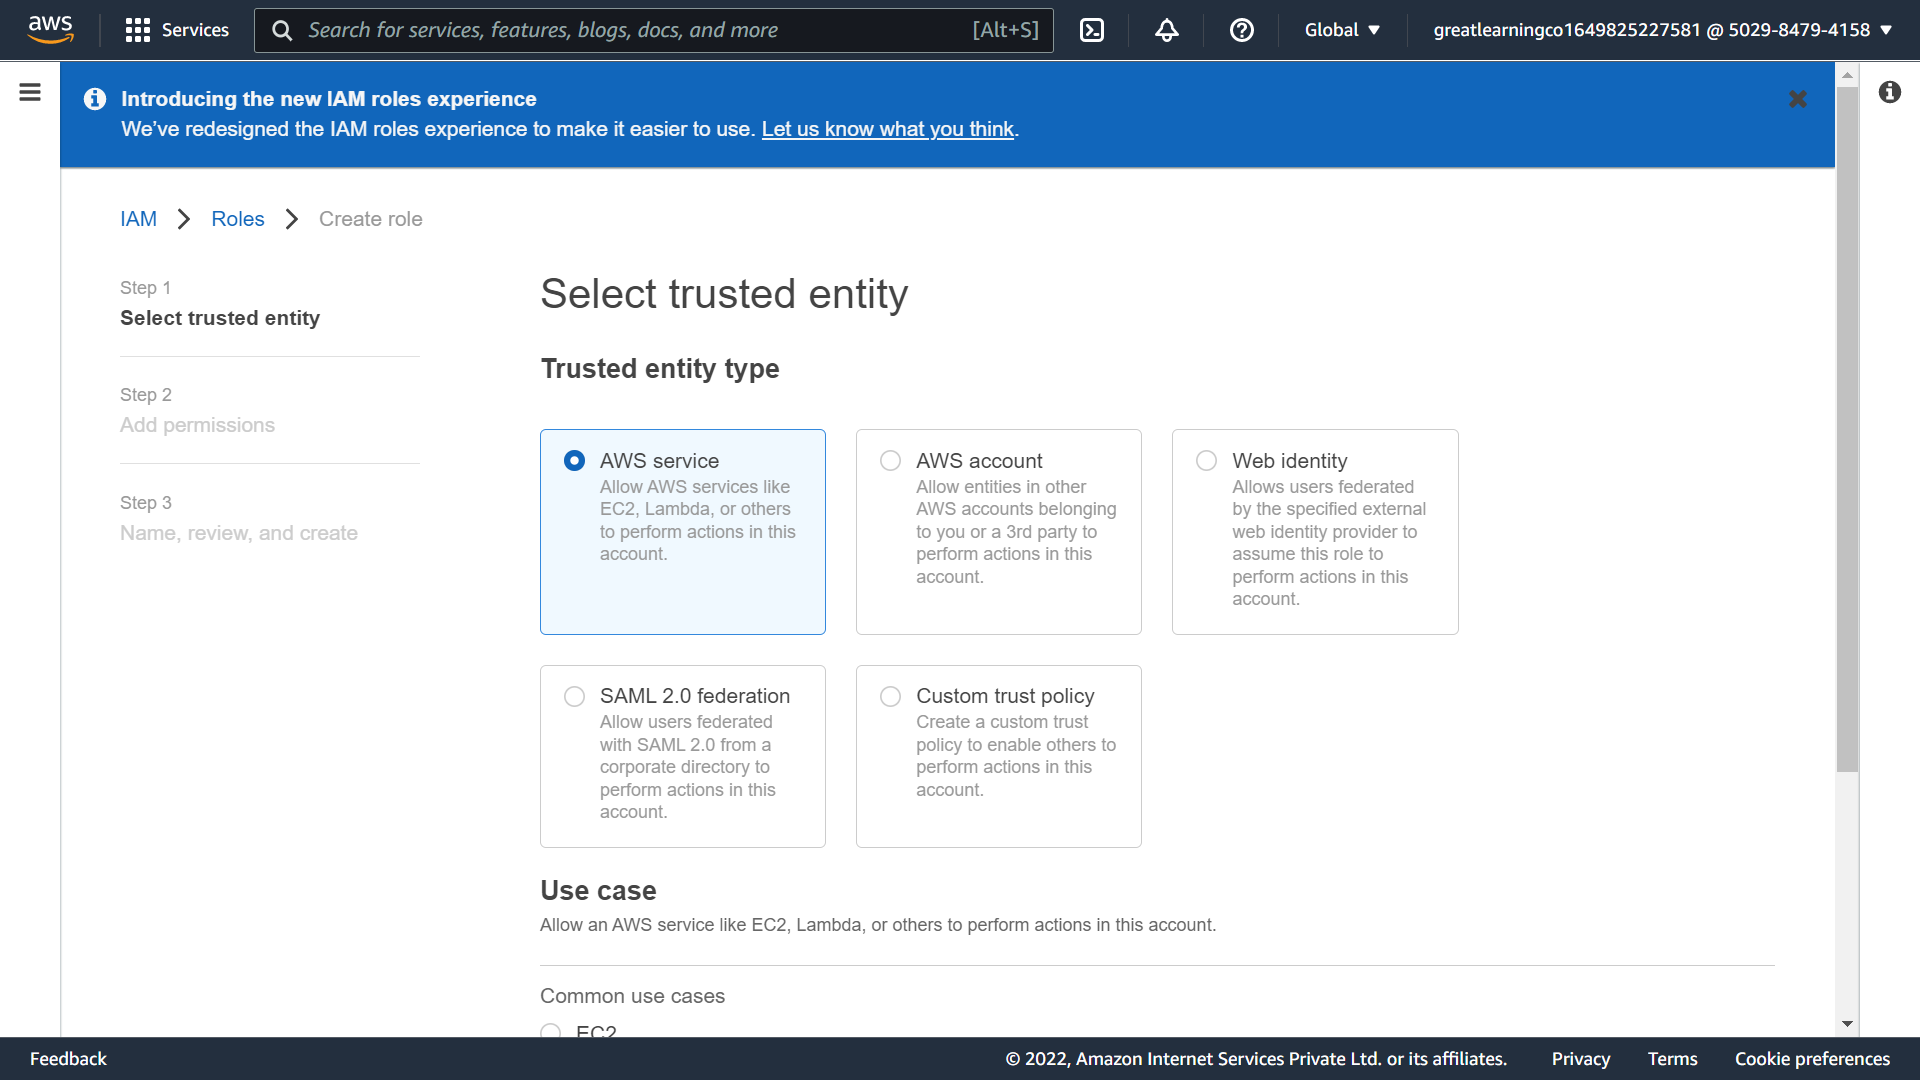

3. Scroll down to choose `Sagemaker` as the Use Case. Click `Next` and you will get the screen for Permission Policies. Click `Next` again.

4. Give the Role name and click on `Create role`. On successful creation you can see the role name list in the roles list. Click on the role that was created and click on 'Add Permissions'

5. Search for S3FullAccess and IoTAnalyticsFullAccess, IoTFullAccess, EC2FullAccess. Once the policices are attached complete the process.

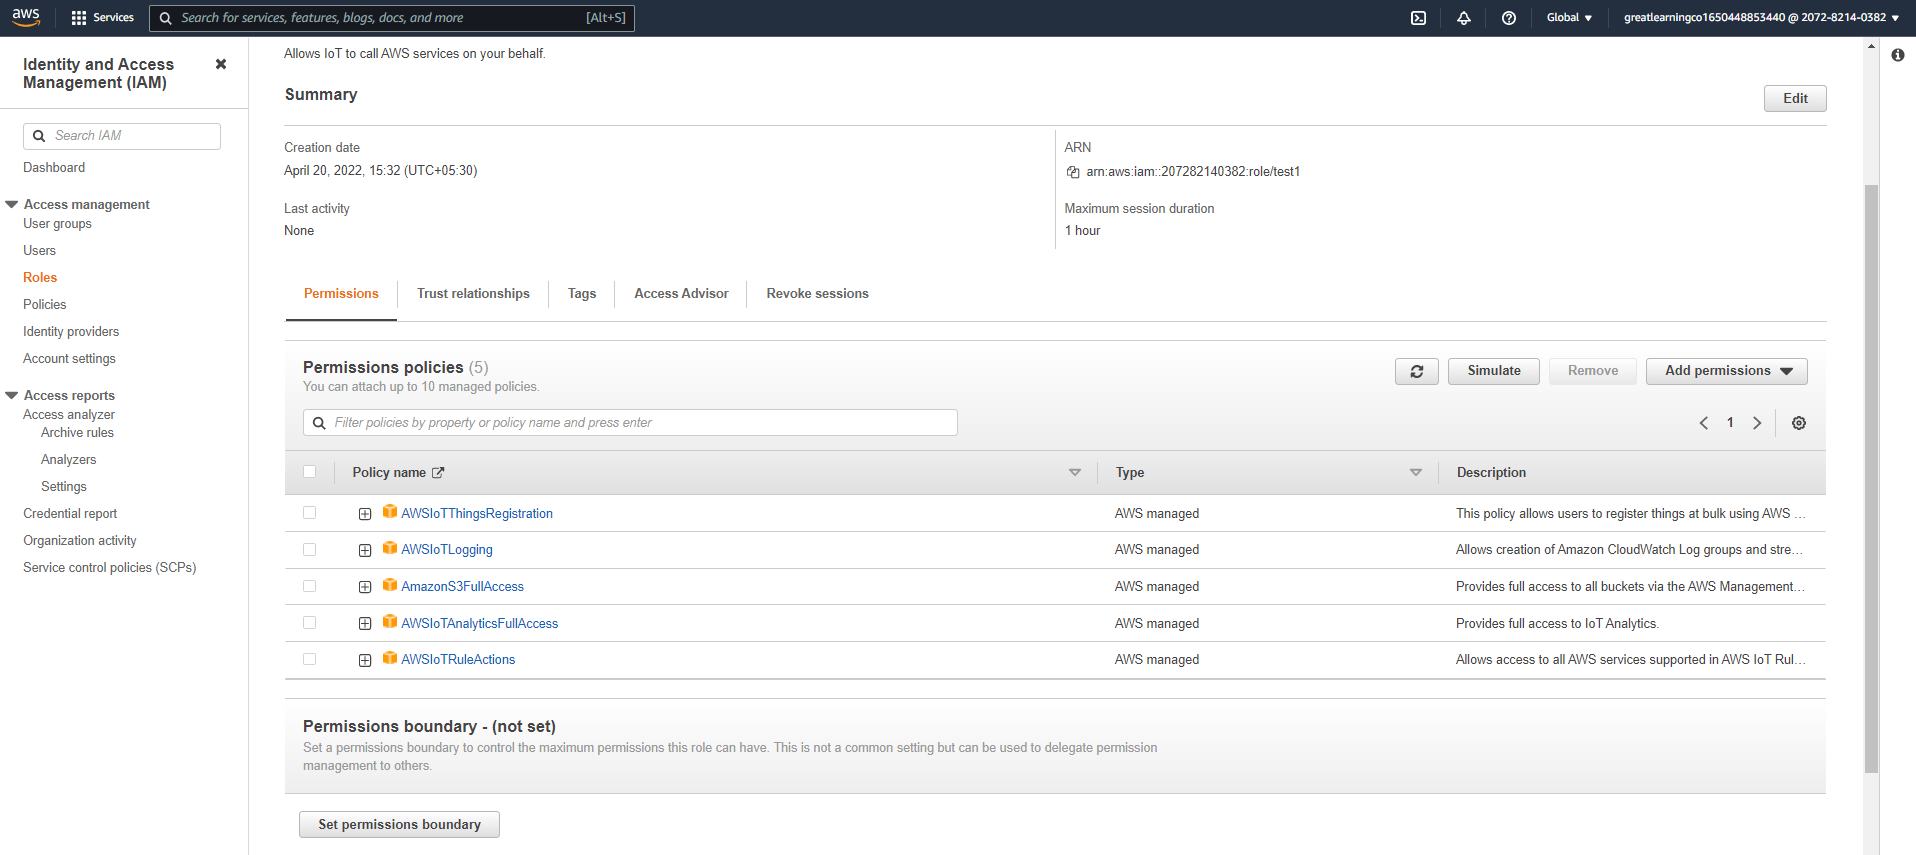

# <font color='blue'> AWS IoT analytics : Channel Creation </font>

Let's start with the channel creation. A channel ingests data from a source, say an IoT topic.

Please login to AWS account and go to the AWS management console page. 

Search for IoT analytics service and choose the appropriate option.

Once you are on the IoT analytics page, choose channel tab from the left hand side. 

Initially, as you do not have any channel, it will appear similar to the image attached below. 

Click on create channel and it will take you to the next page. 


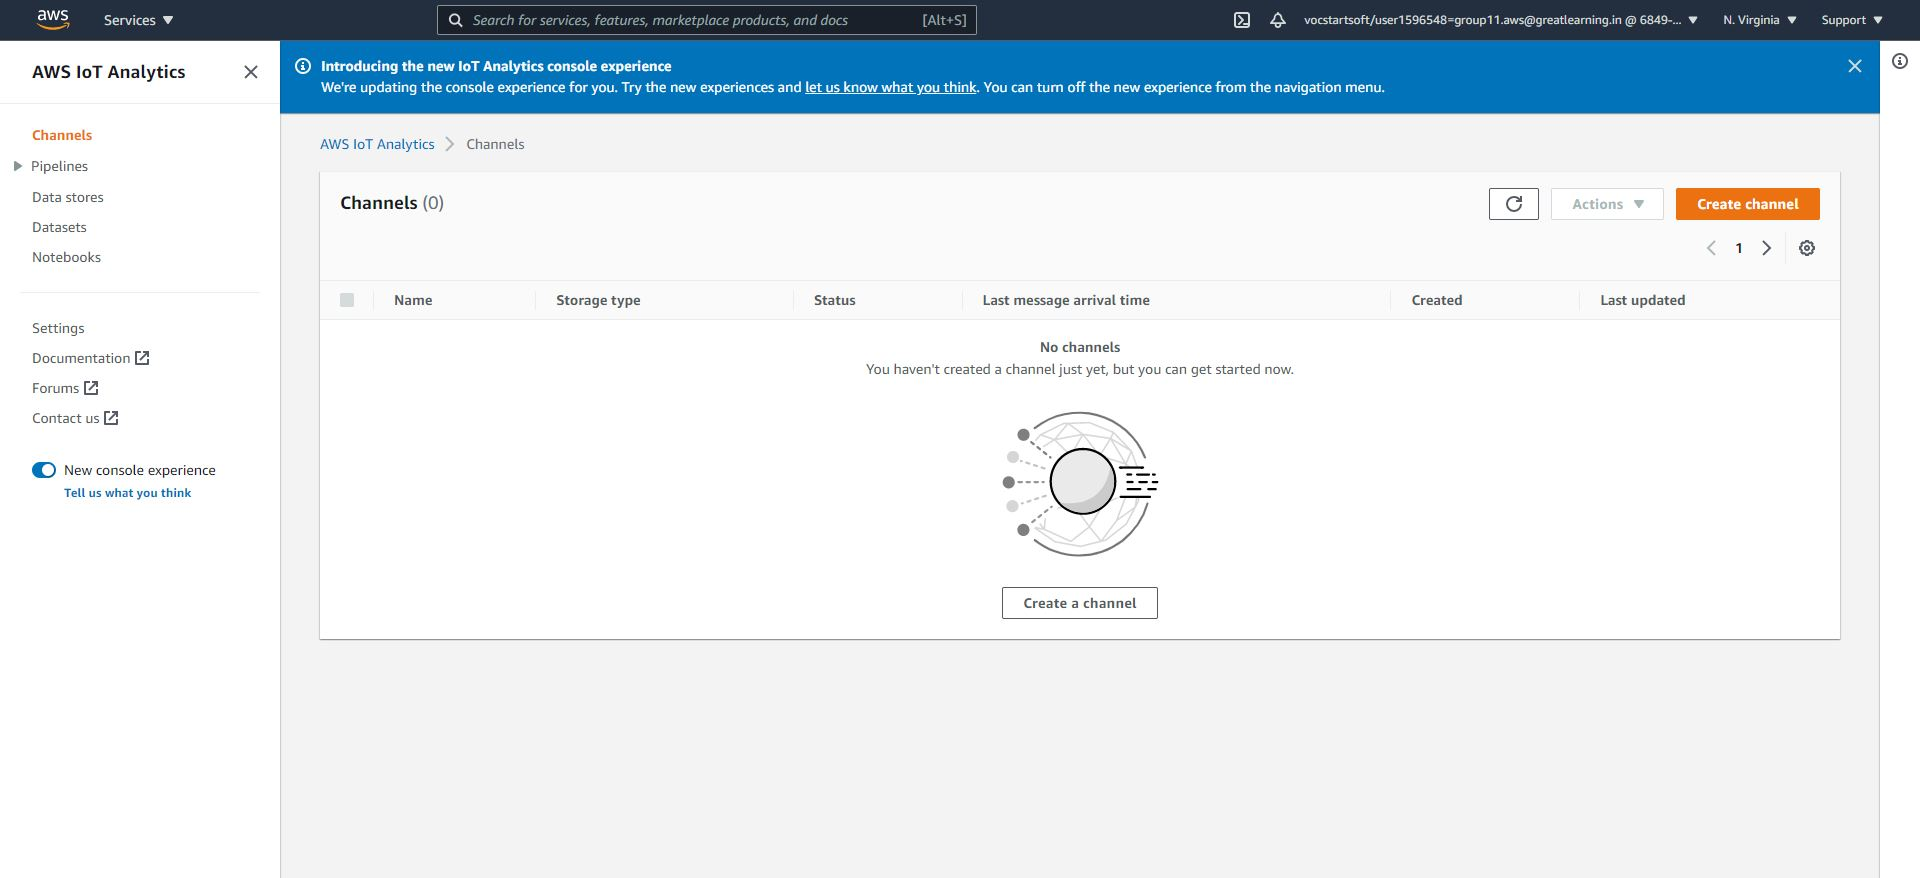


In this page provide the name for the channel and click on next. 

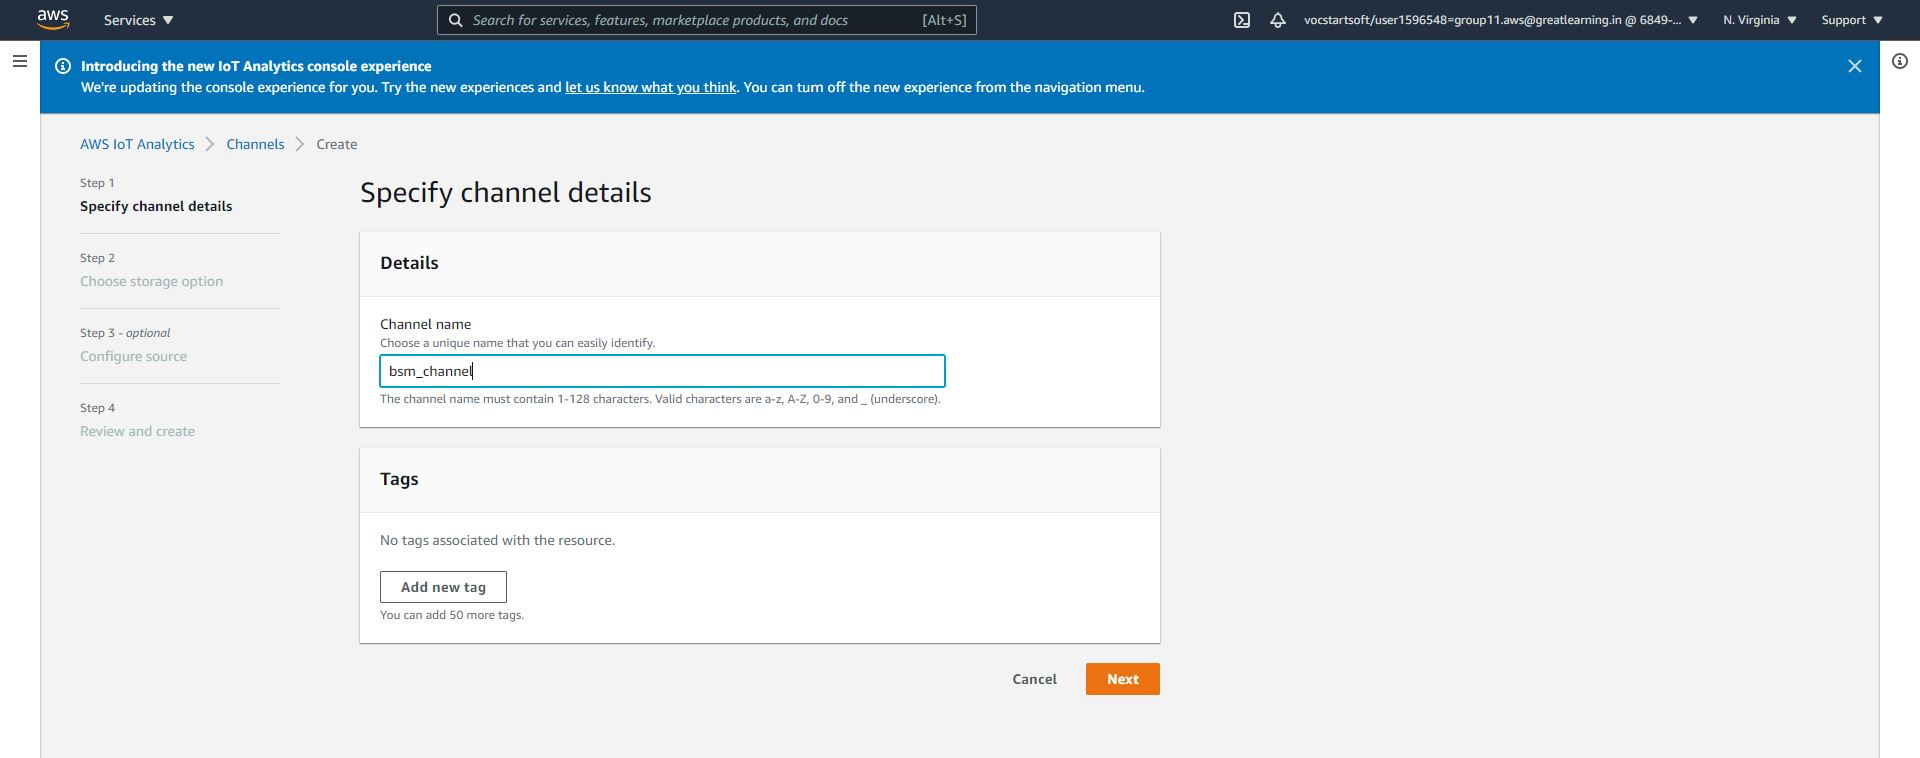

In the next page you are supposed to choose Service Managed Storage and choose indefinitely for storage duration. 

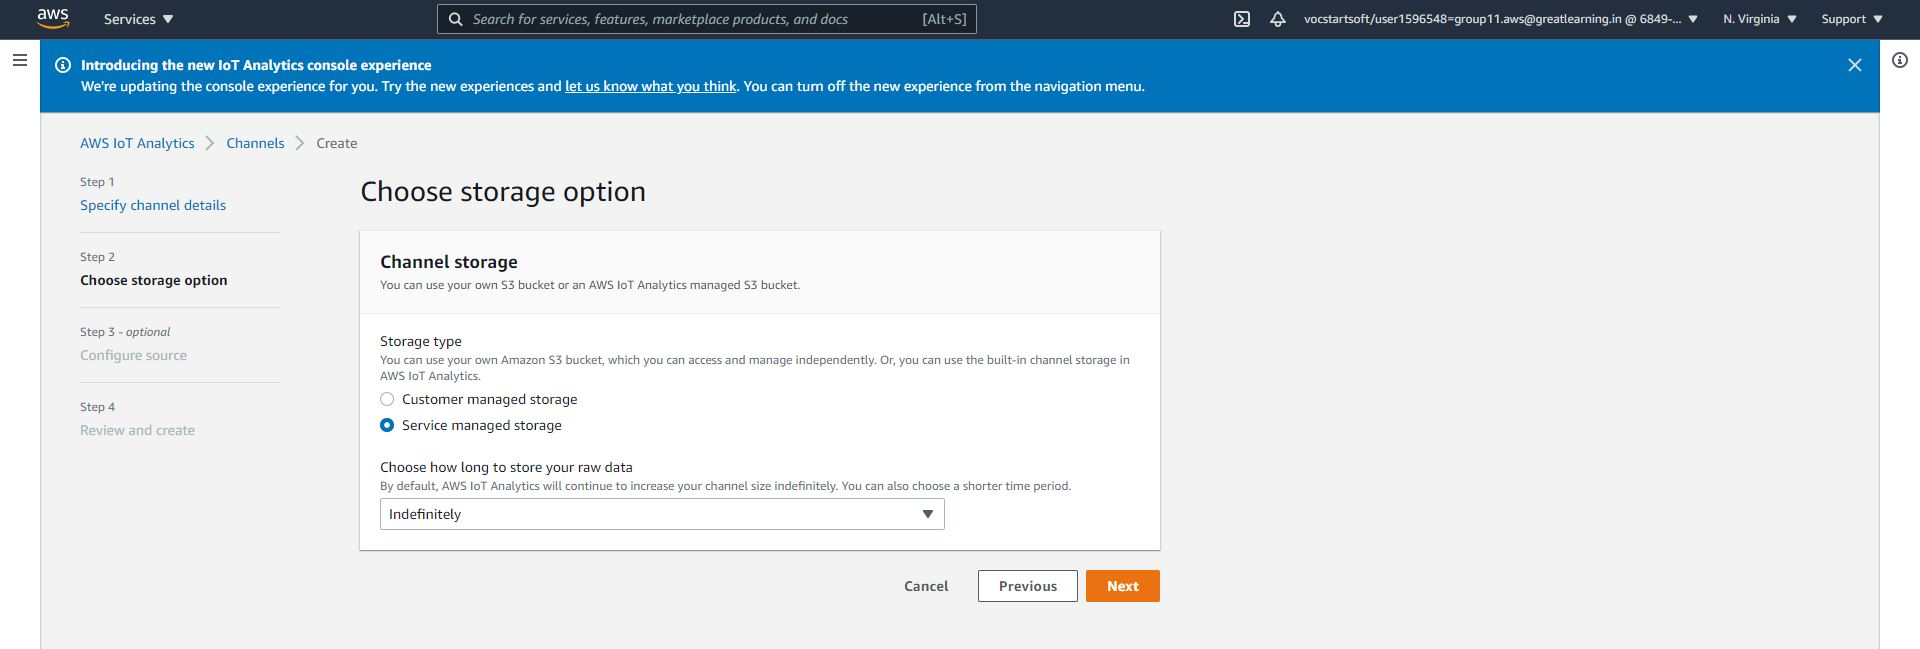

In this page, provide the topic name which you have given while running the script. (If you have not started the BedSideMonitor.py script file you can start running it now.)

Click on start listening to verify, if you are receiving the data in the channel. 

After verfiying click on Next to go to the next page. 

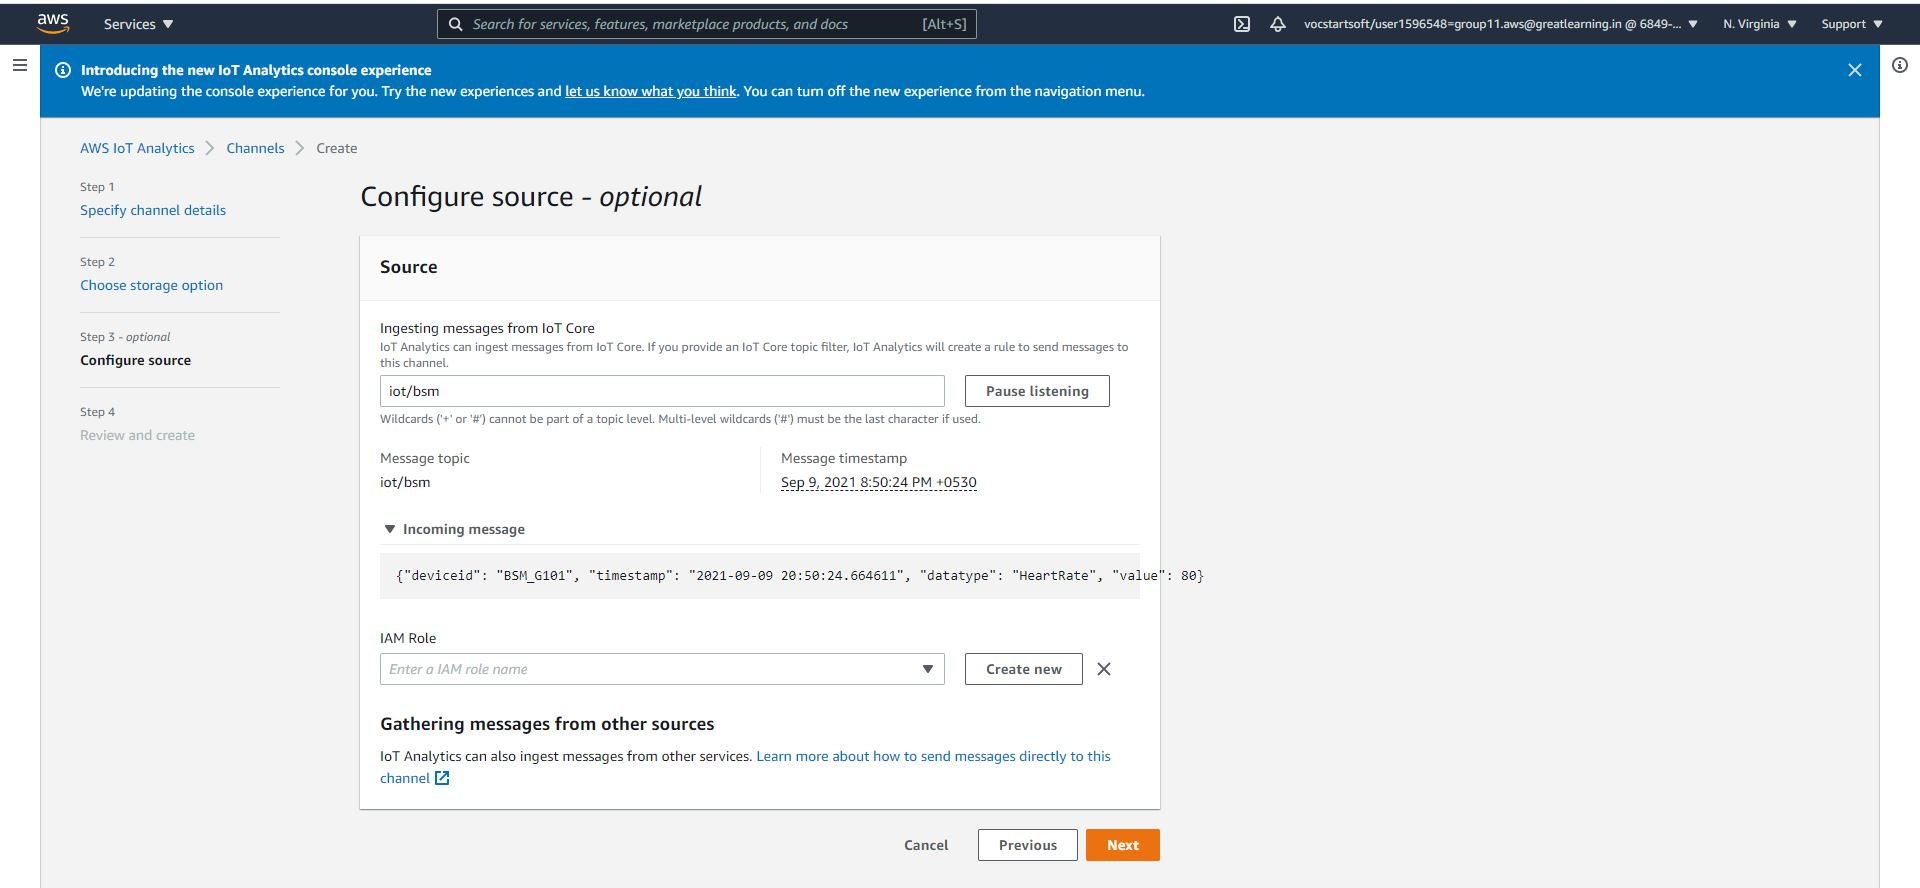

Enter the name of the role from drop down option. The role created in previous step should be available for you to choose. 

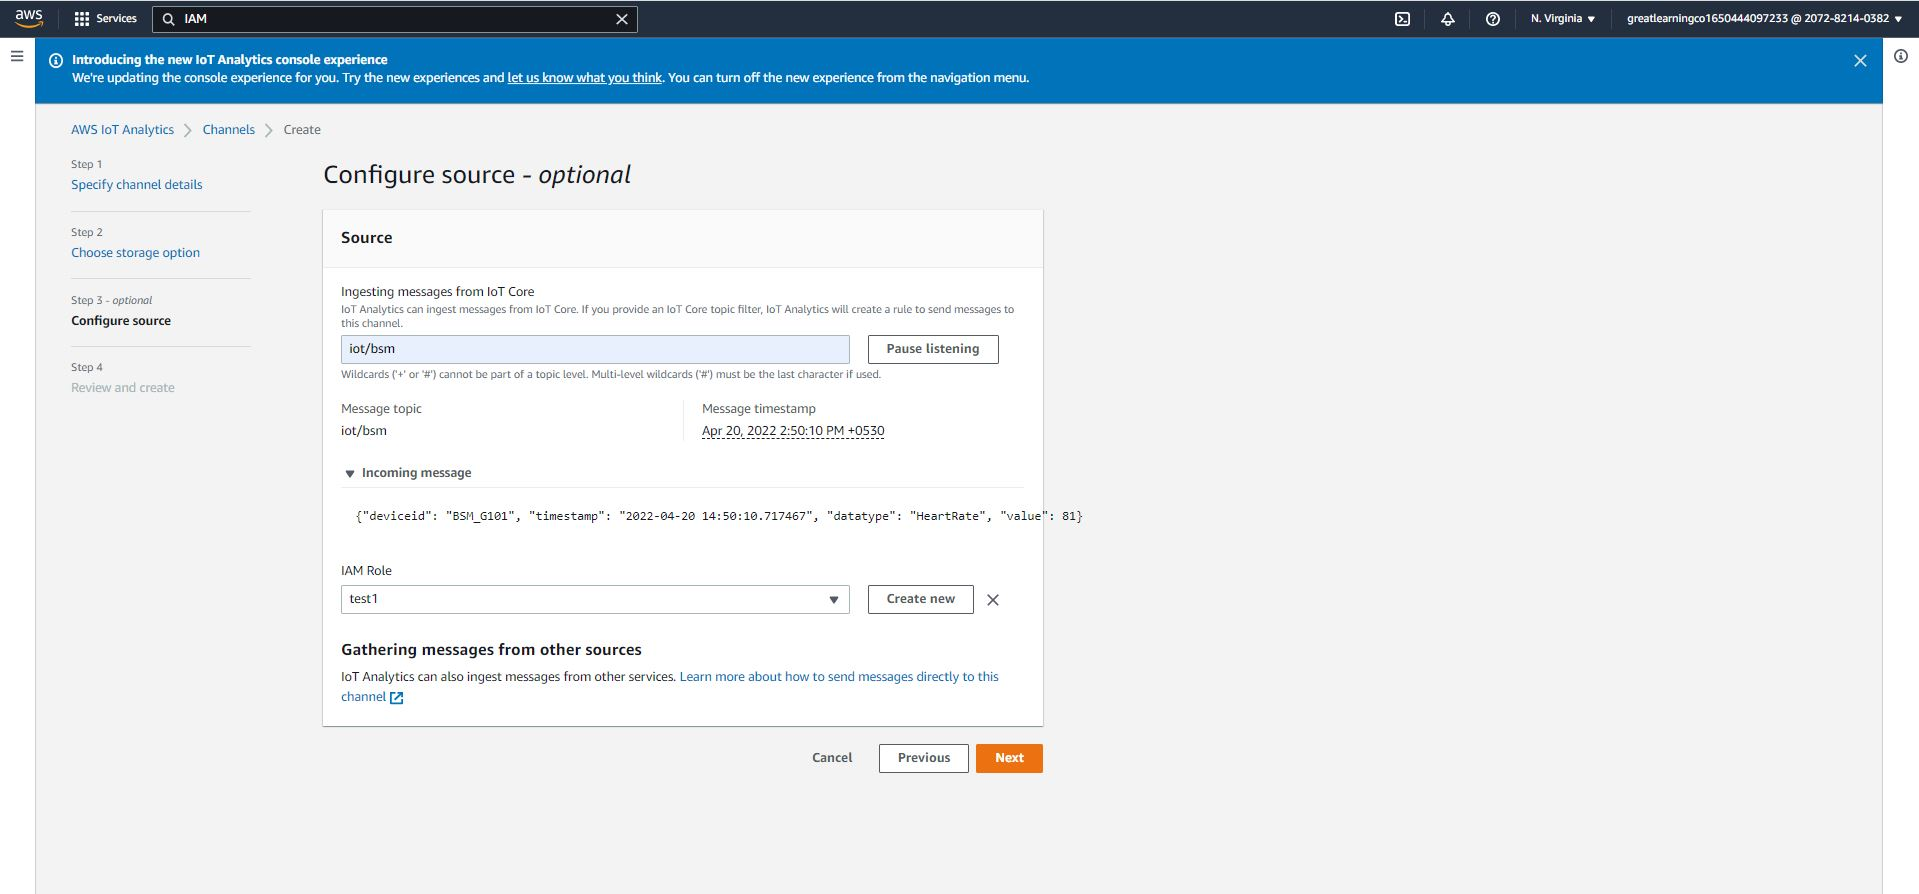

Now once the role is chosen, click on next and scroll below to find Create channel option at the end. 

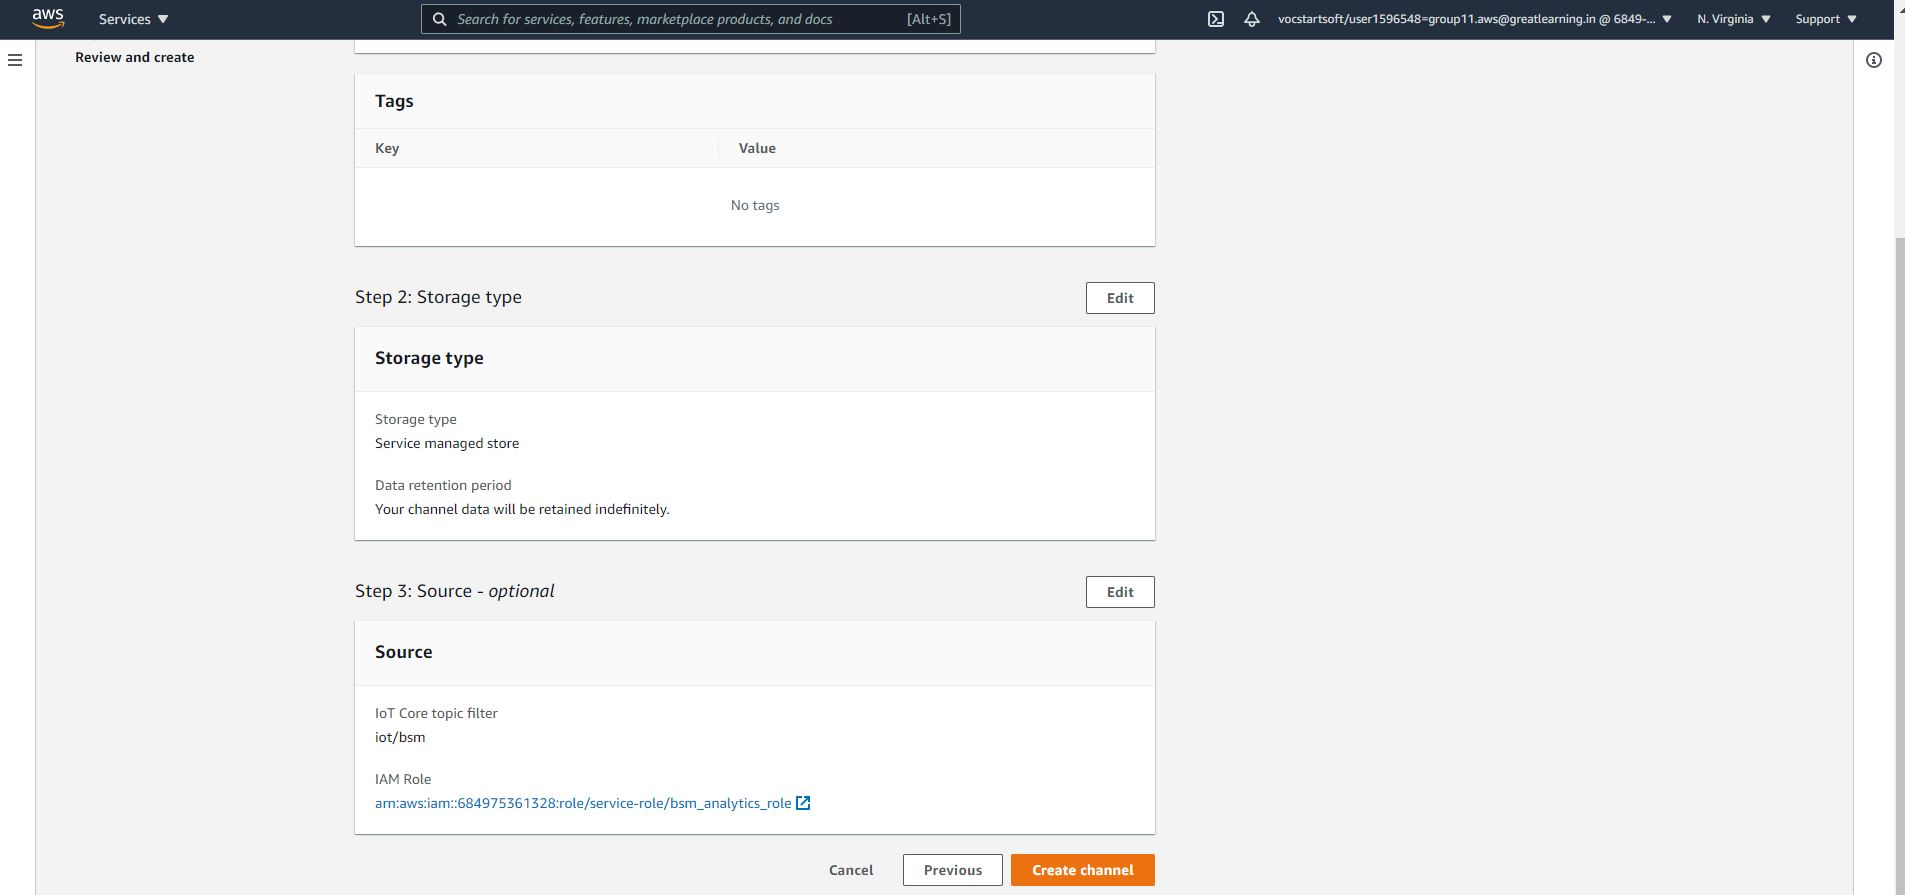


# <font color='blue'> AWS IoT analytics : Datastore Creation </font>

In this section we are going to create data store to store the IoT data for analysis. 

To create datastore, click on datastore. This will take you to the following page. 

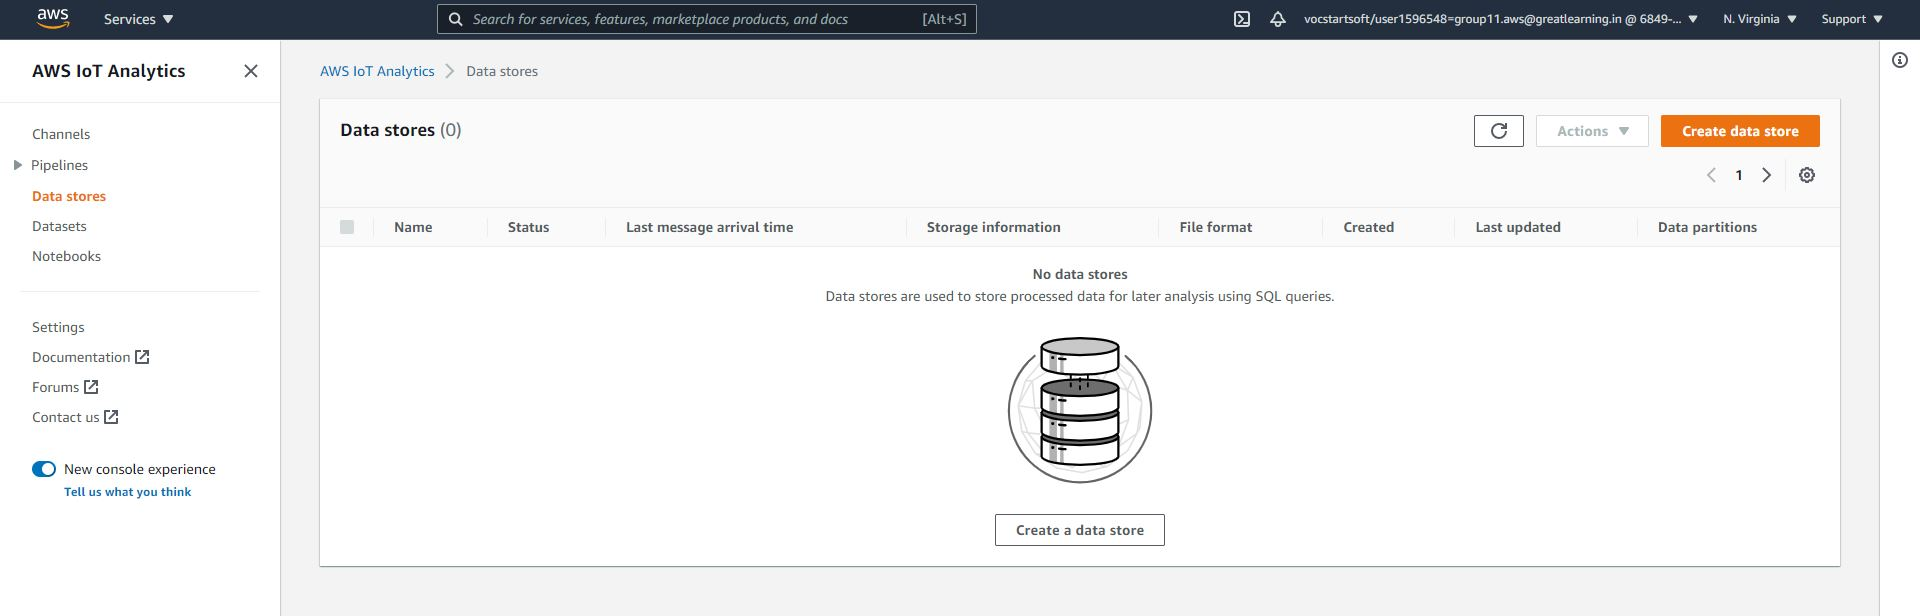

Enter the name for your datastore and click on next. 

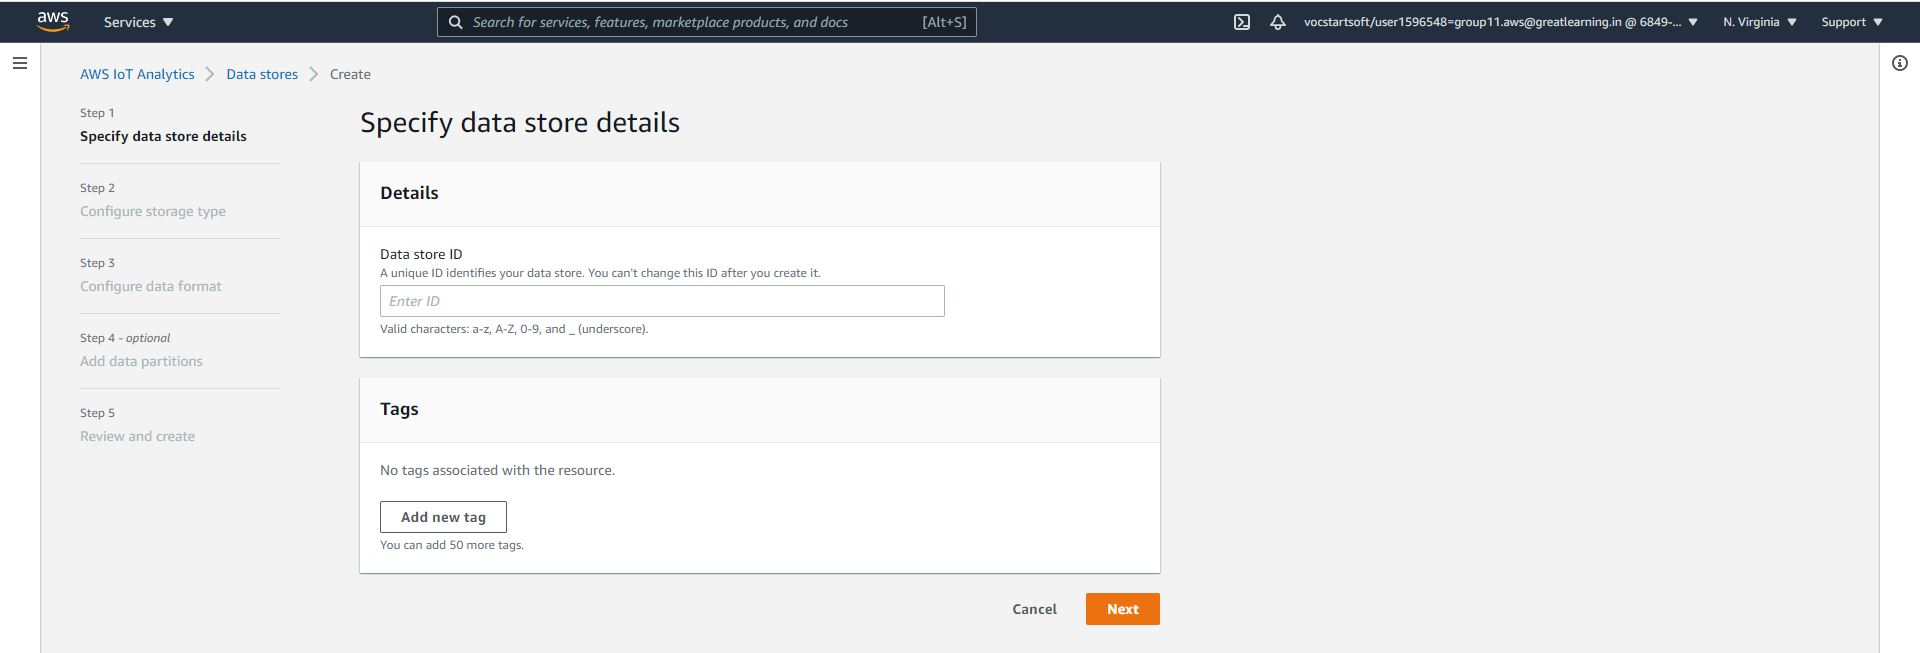

The next page will be similar to the next image. 

Choose the storage type as mentioned below and click on next.

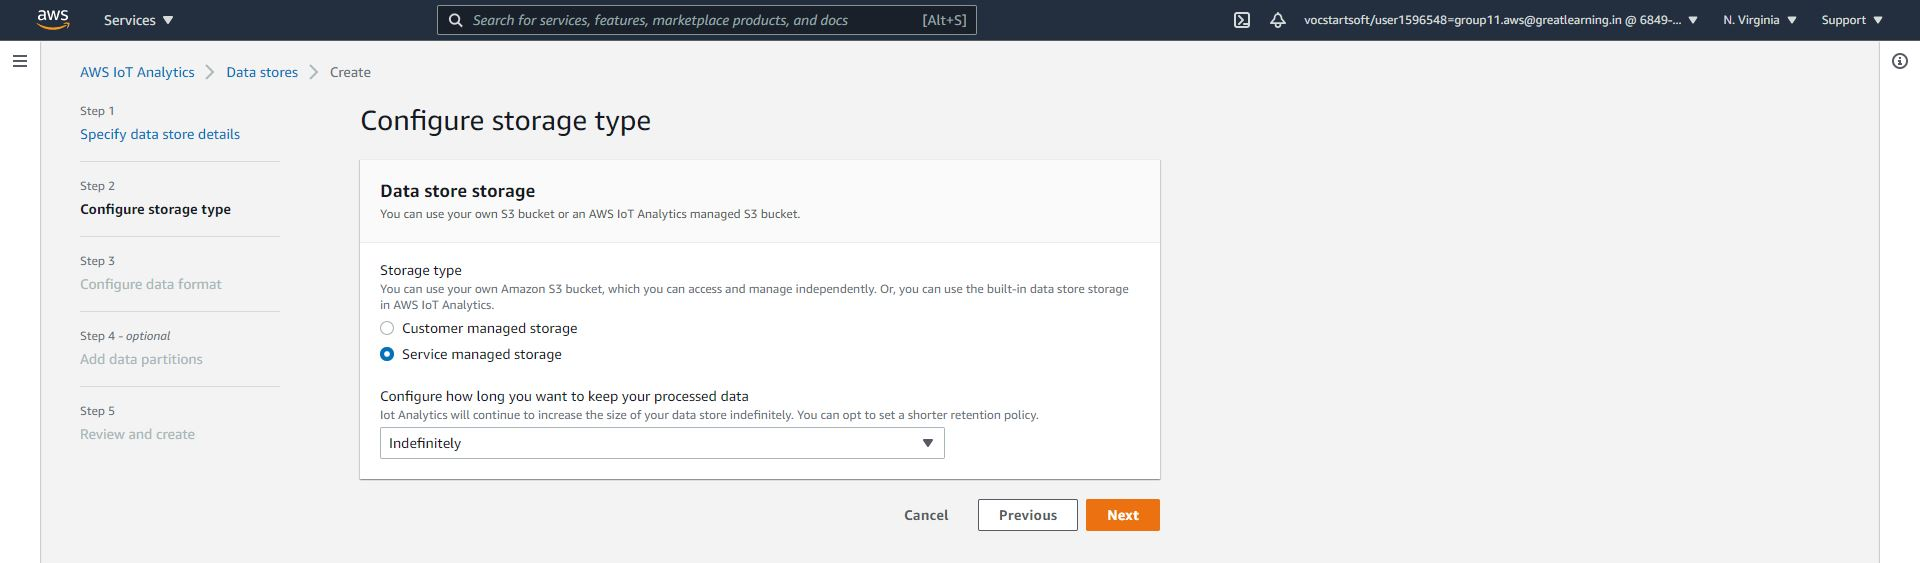

Choose the JSON format to store the data. Click on next on the next page it is an optional thing and you can leave it as it is. 

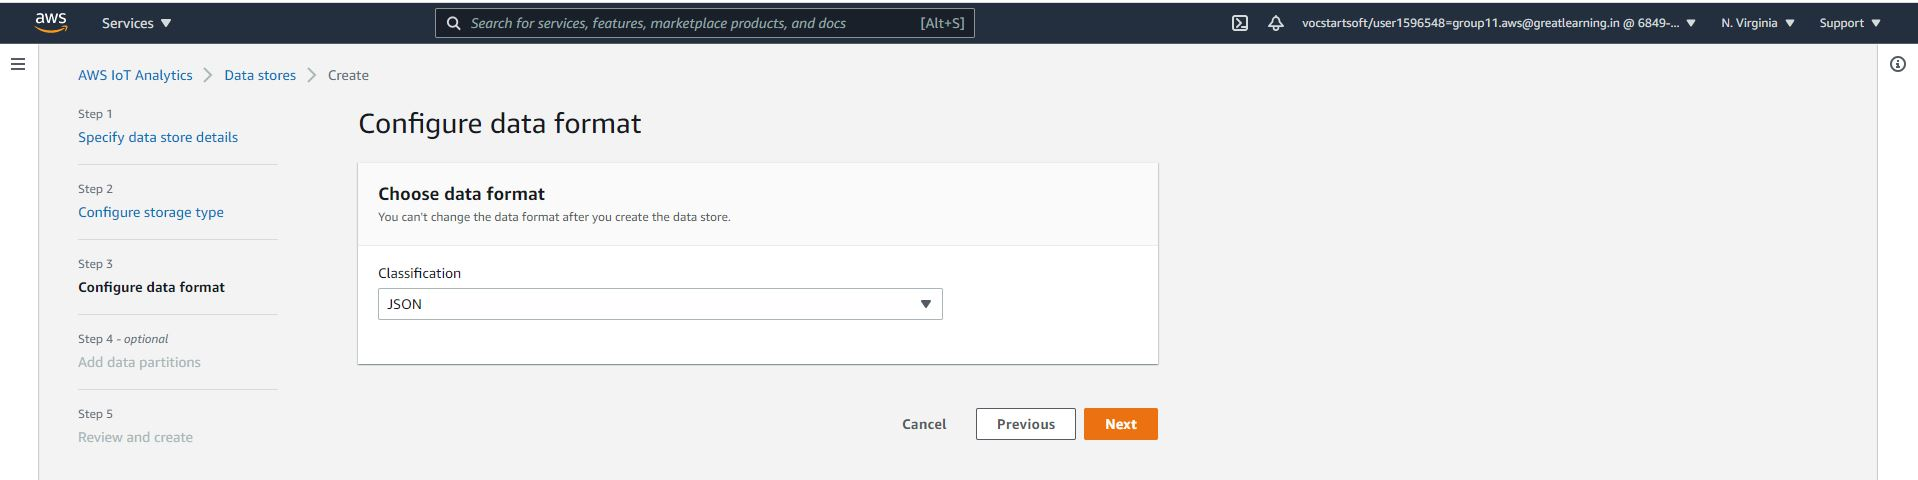

On the next page you should scroll till the end and find Create data store option, click on it and it will create the data store.  

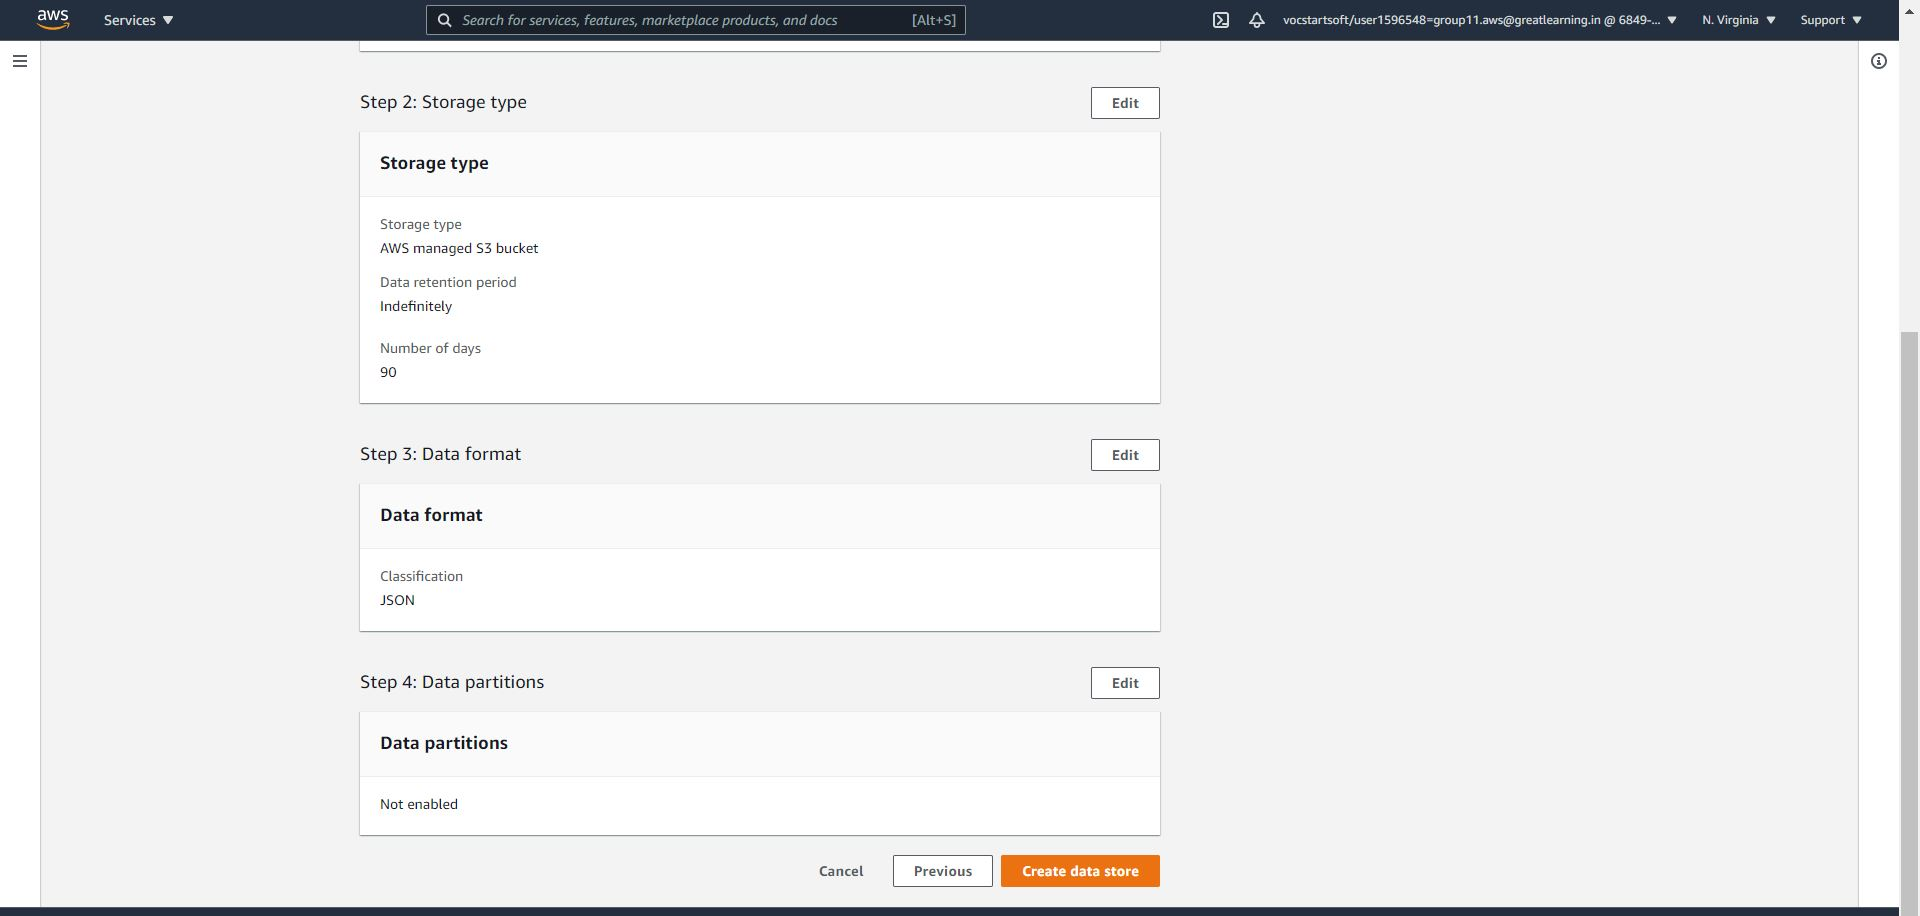

# <font color='blue'> AWS IoT analytics : Pipeline Creation </font>

In this section we are going to setup the pipeline by using the channel we have created in the previous steps. This will connect the source to the data store.

The pipeline step is useful as it can be used to do minor operations while sending the data from the channel to the data store. You can filter the data based on specific values, transform the data, and enrich by adding additional attributes based on information outside of the source.

Click on the pipeline from the home page. Next page will look similar to this. 

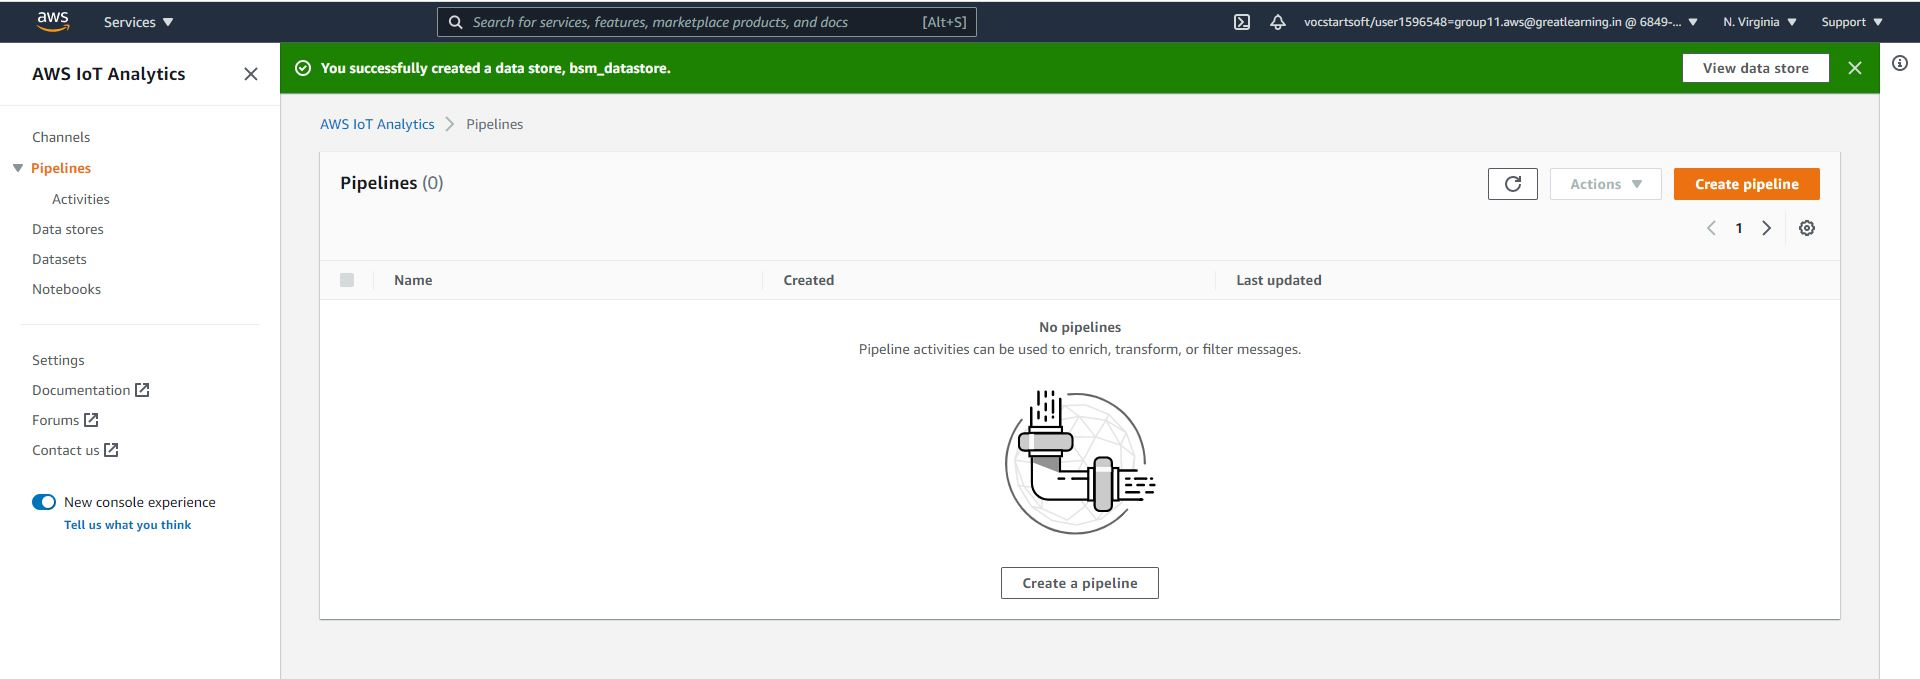

Enter the name under Pipeline ID and provide the pipeline source which will point to the channel. Provide the name of datastore created in the previous step and click on next. 

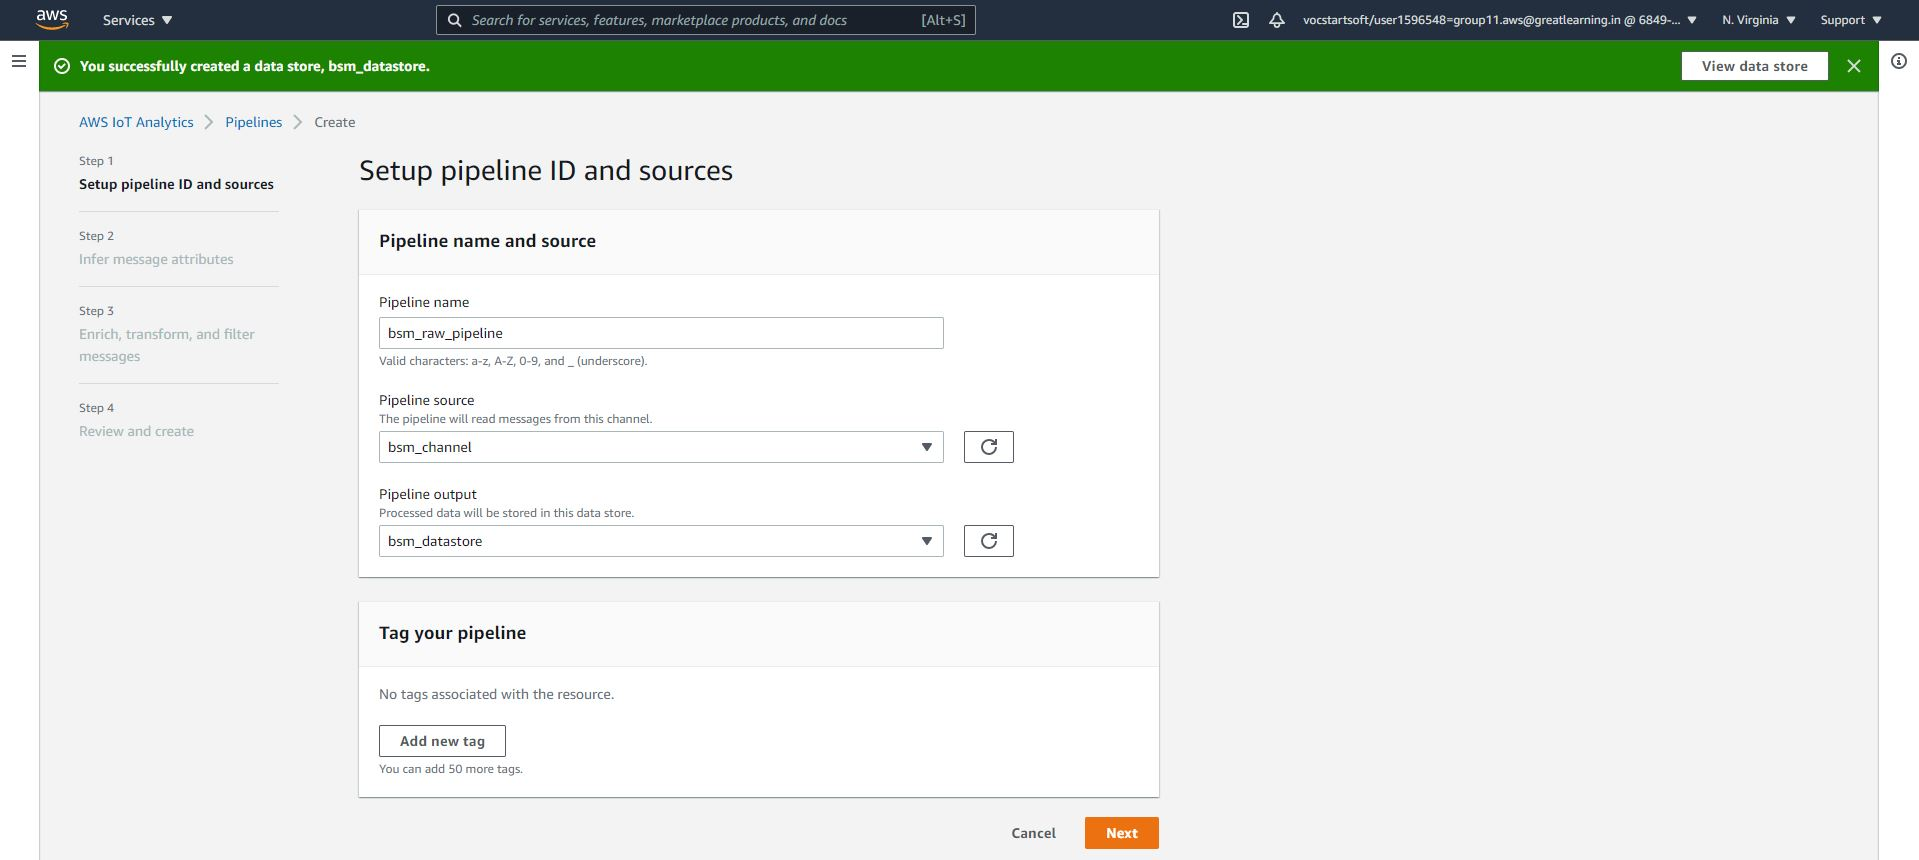



On the next page, which looks similar to the below attached image, here attributes are available as key-value pairs. 

Click on next to go to activity page. 

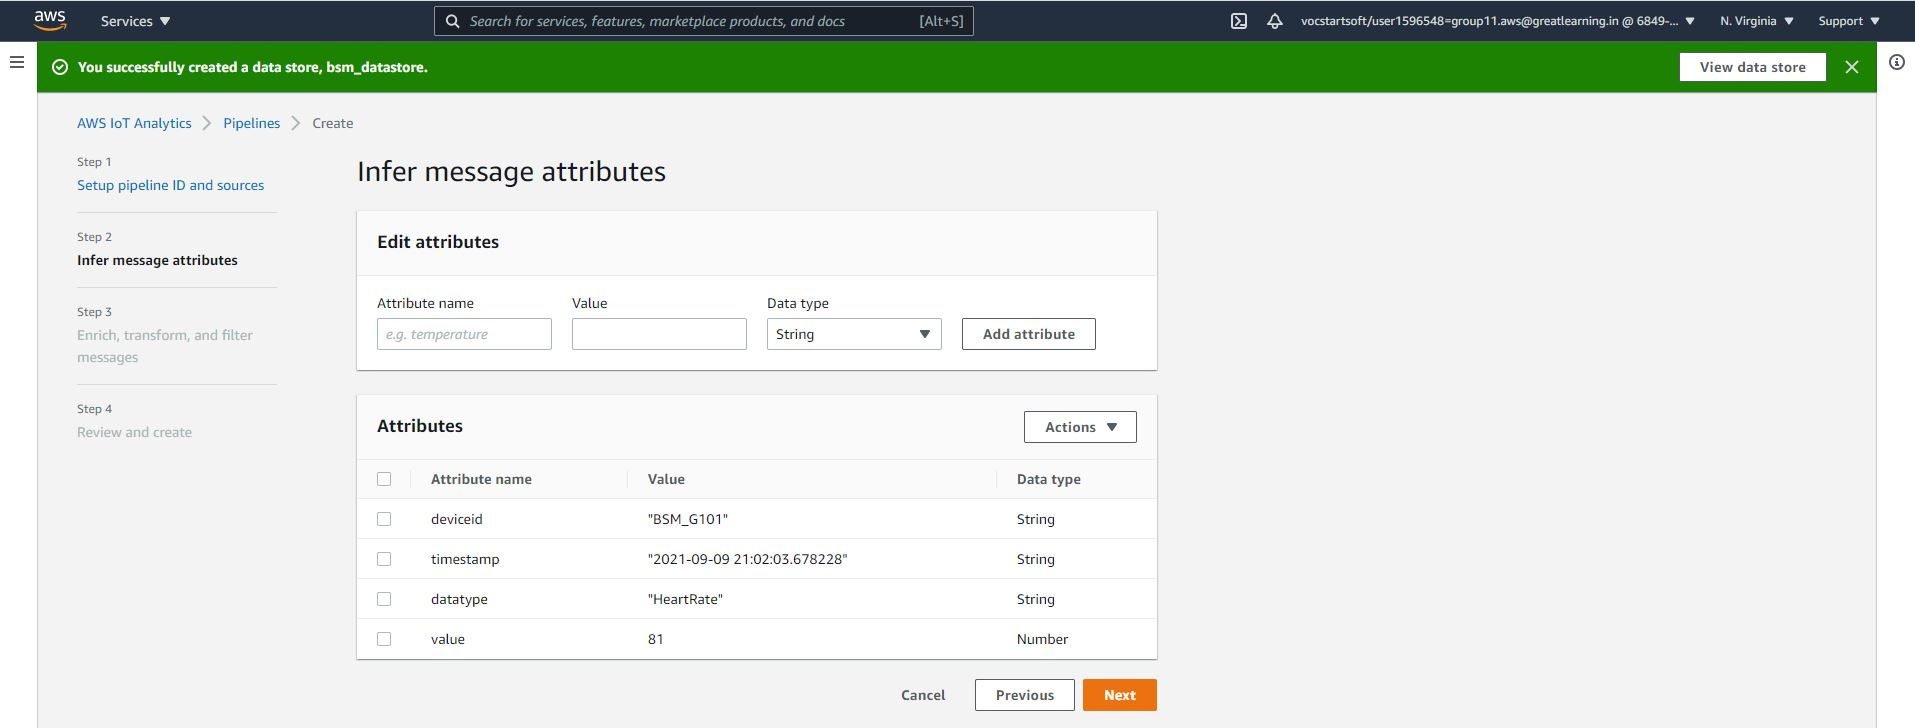

This section enables the data enrichment or transformation for our example. In this lab, we are not adding any activity. 


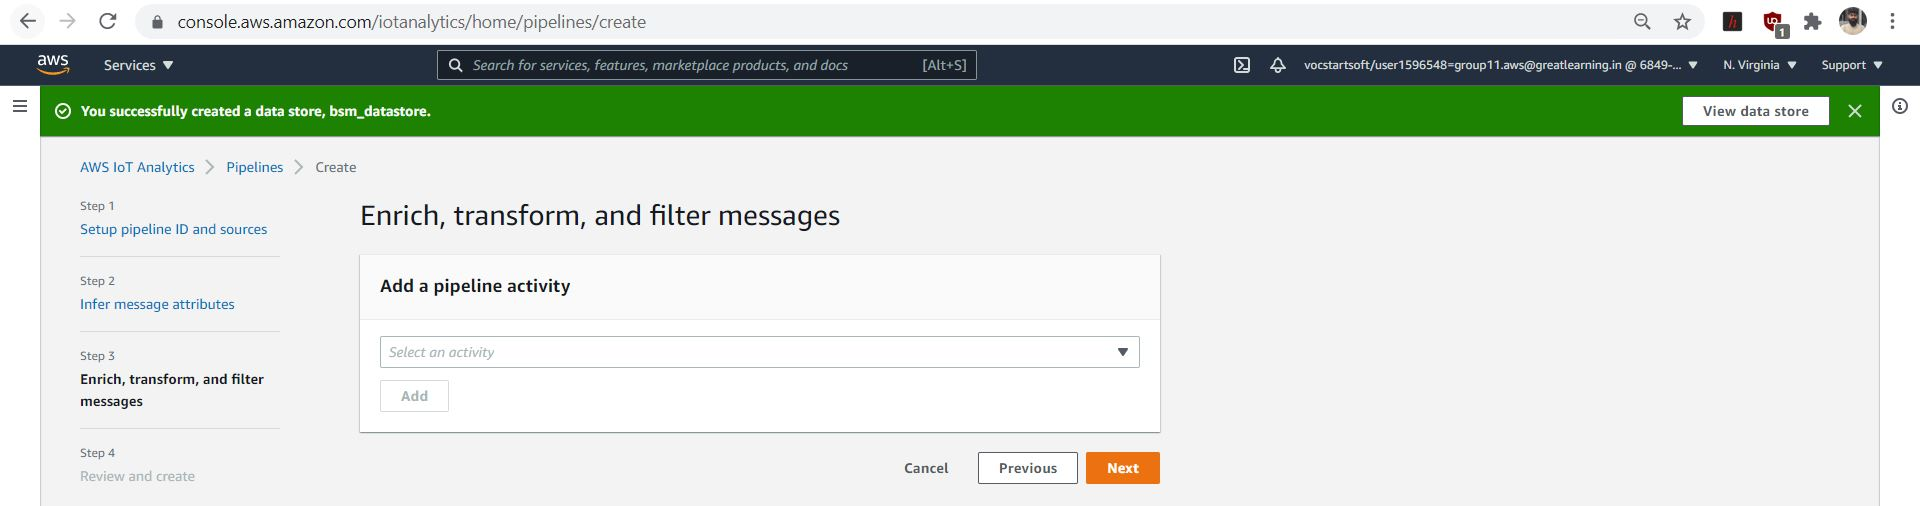

Scroll till the last and find the option to create pipeline. Click on create pipeline to complete the creation process. 

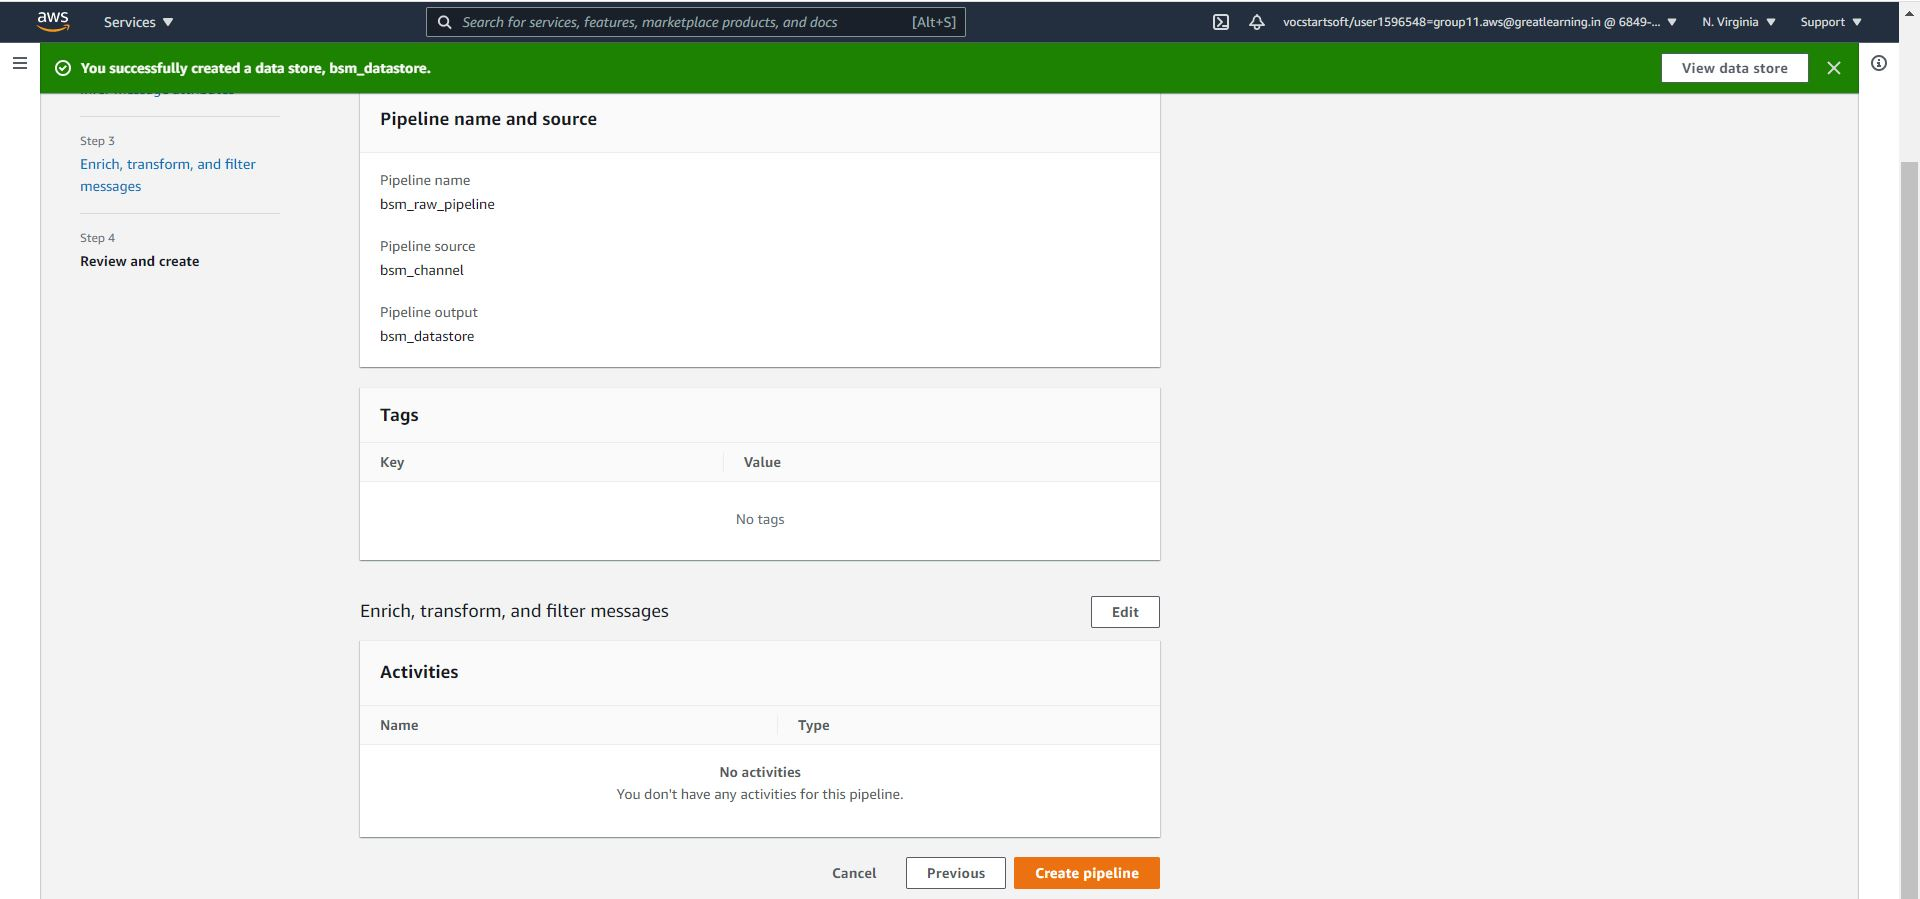

# <font color='blue'> AWS IoT analytics : Dataset Creation </font>

After creating the channel, pipeline, and getting the data to the data store, let's work on to create the data set. 

A data set is a view of the data store based on various sql-like filters that can be applied on the base data store. Multiple data sets can be created on the same data store for different use cases.

Choose Data sets tab available in the left side. 

Click on create data set, it will tak you to the next page. 

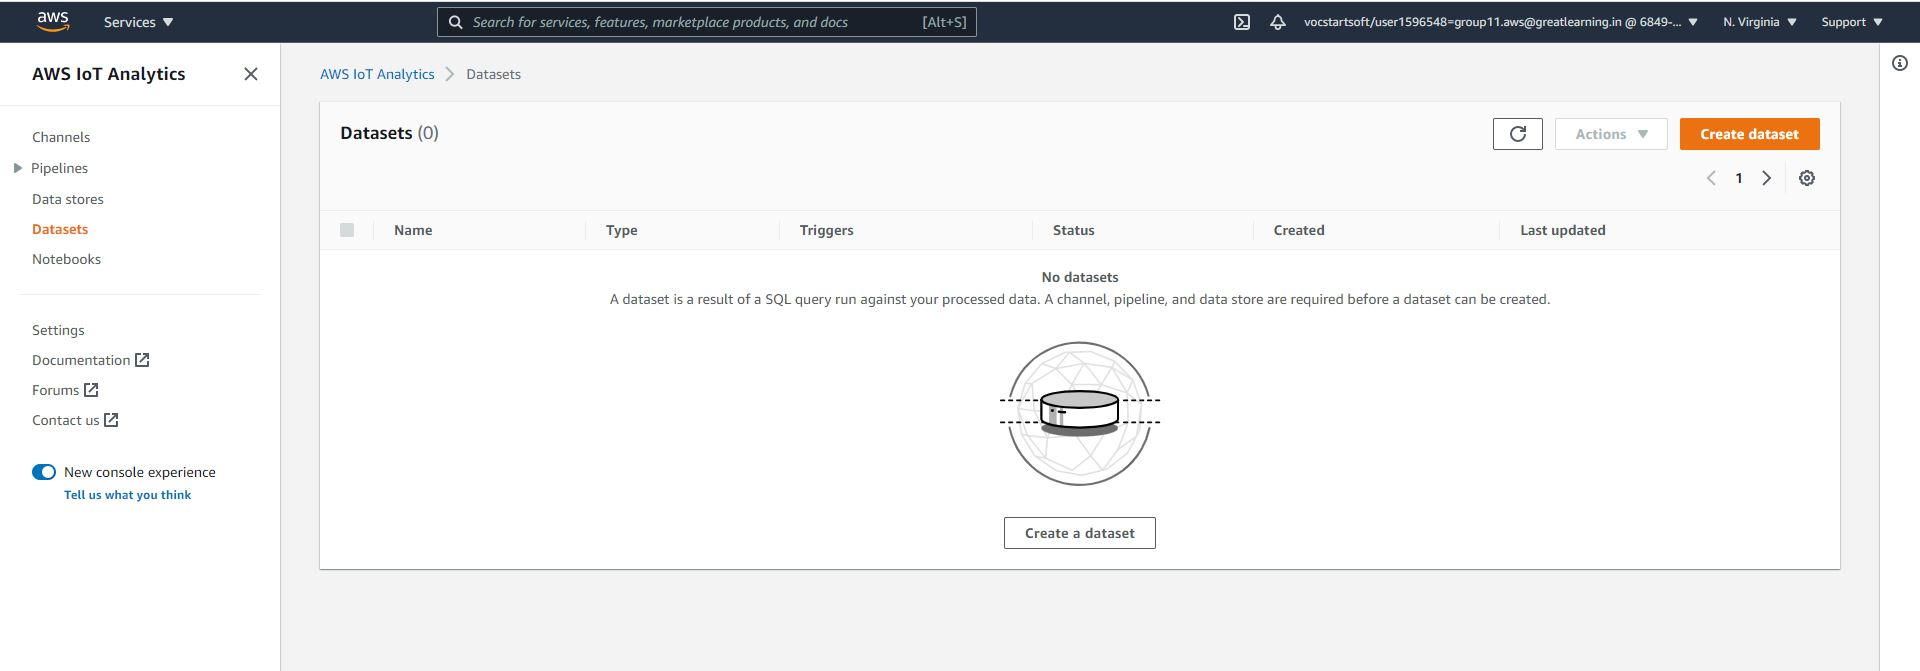

On the following page choose SQL datasets `Create SQL` option. This will take you to the next page. 

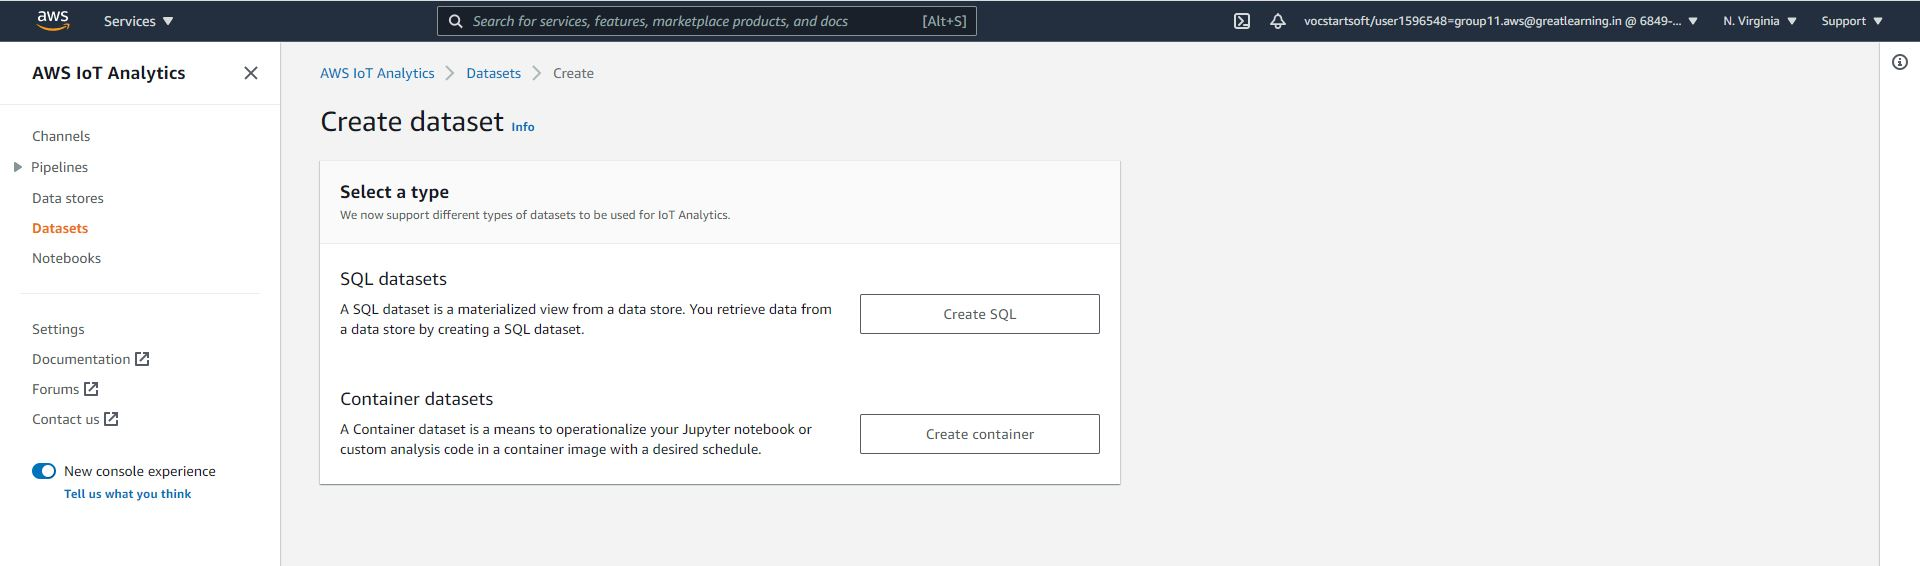

Provide the name for your Dataset. 

Click on select data store source, this will show the available datastore options we created in the previous step. Choose the appropriate one. 

Click next to go to the next page. 

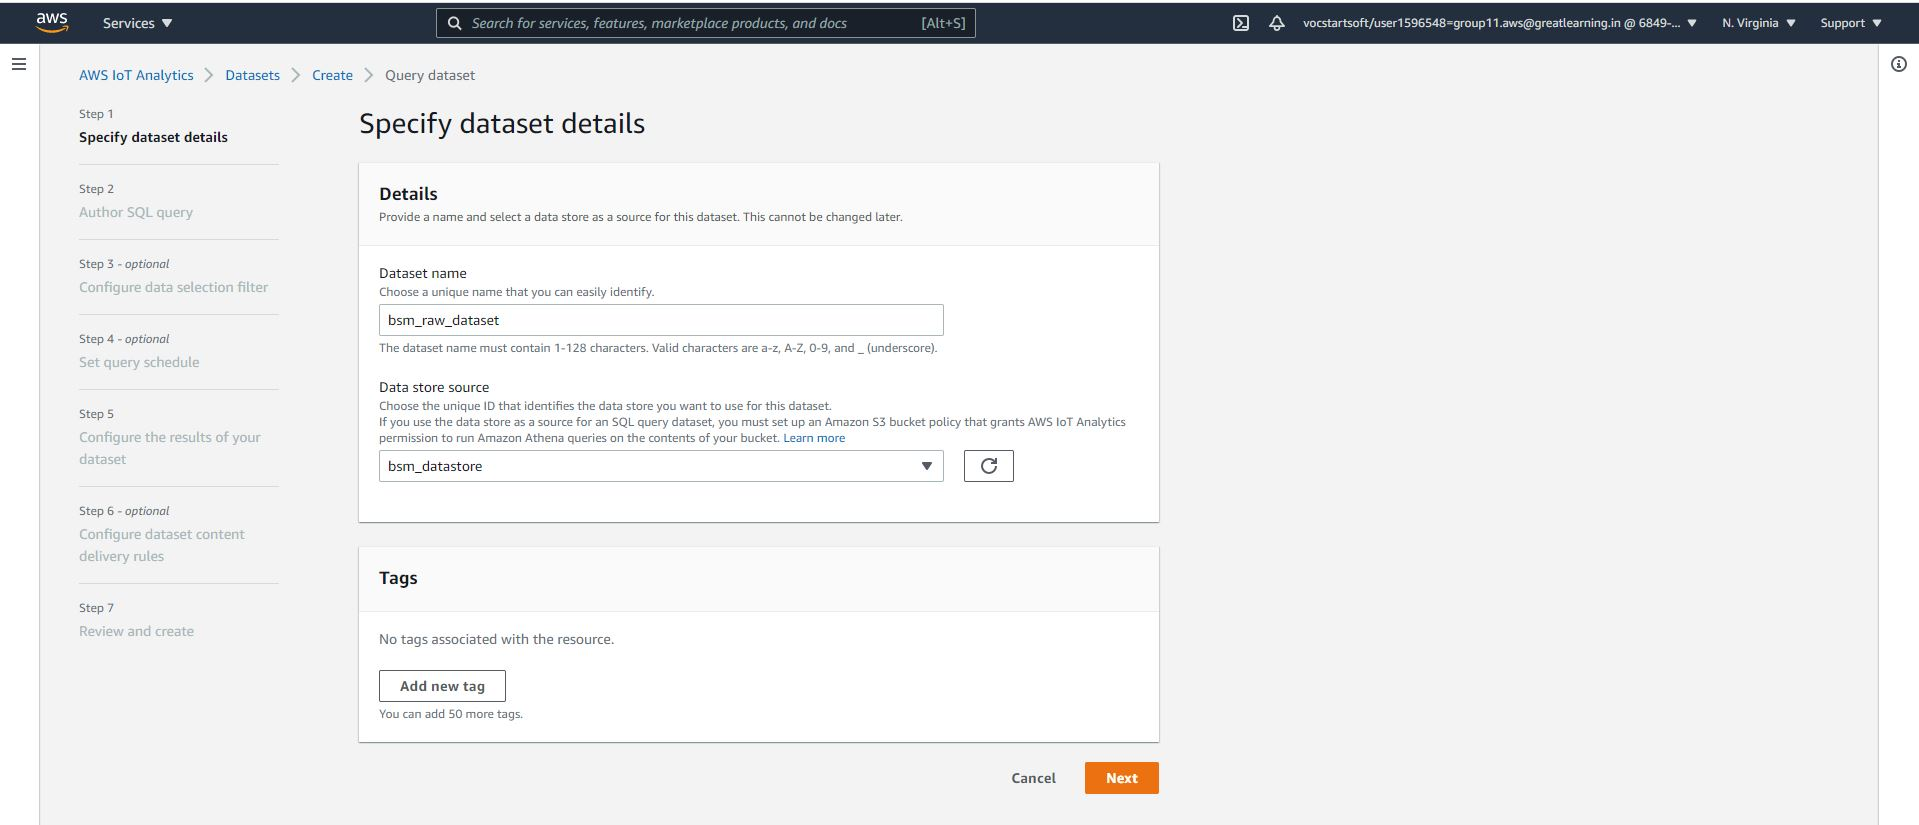

On this page you can test the query to ensure that you are able to access the data. 

By default the limit is set to 10, remove this limit and make sure that you are querying all the data points. 

Click on next to go to the next page. 

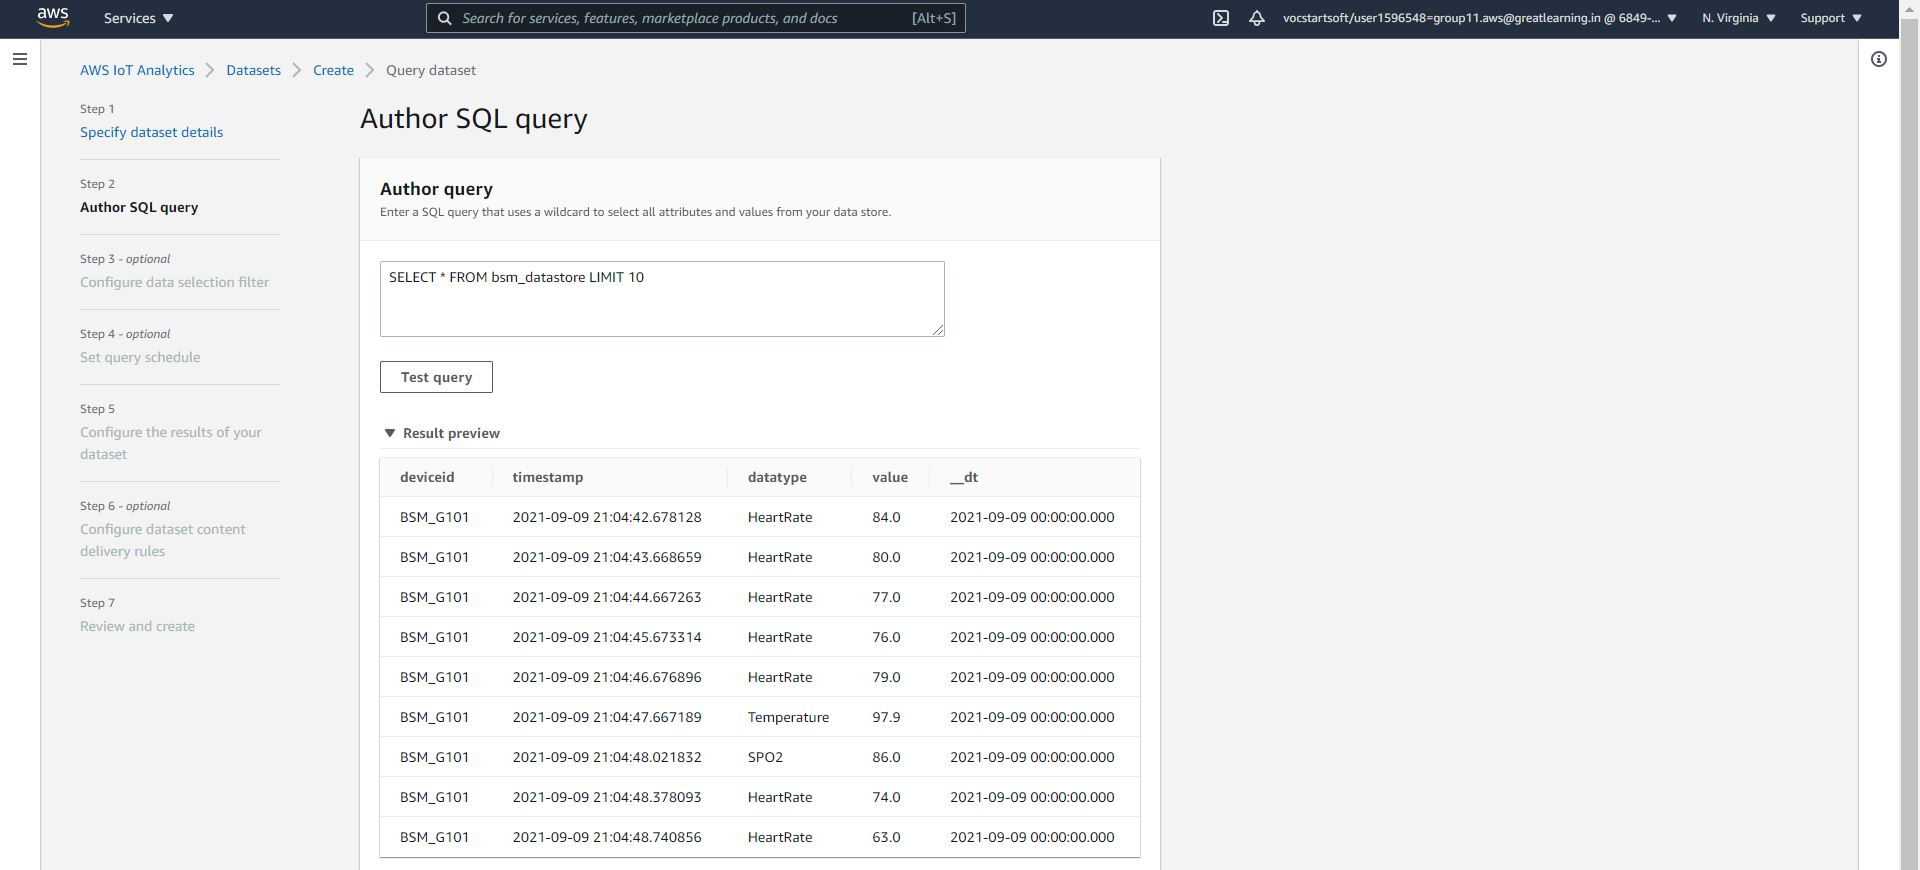

For our example we are not creating any filter and scheduled query. 

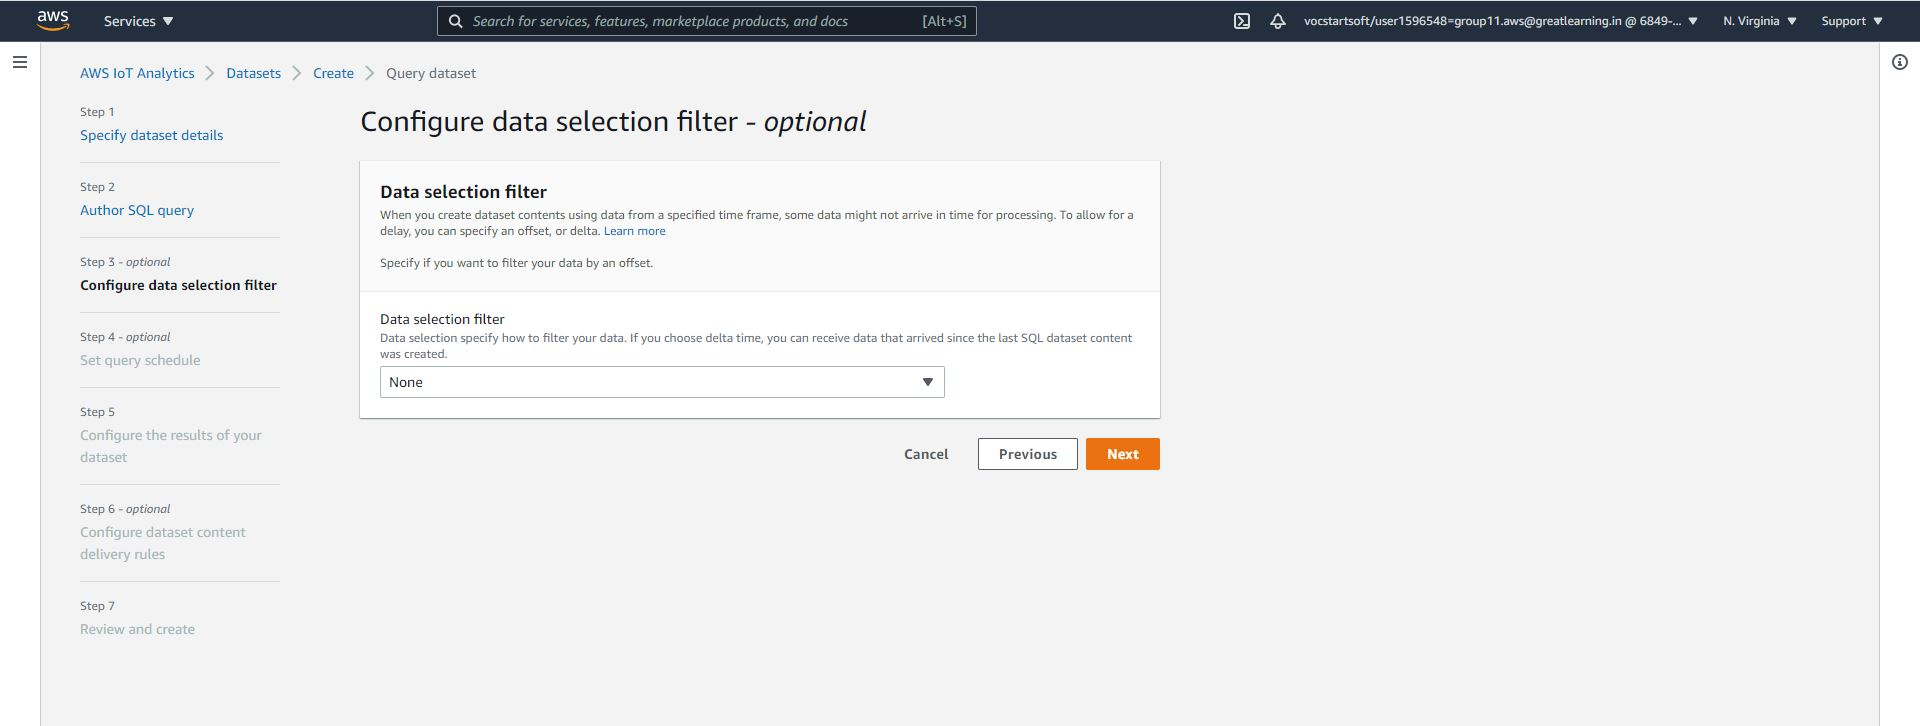

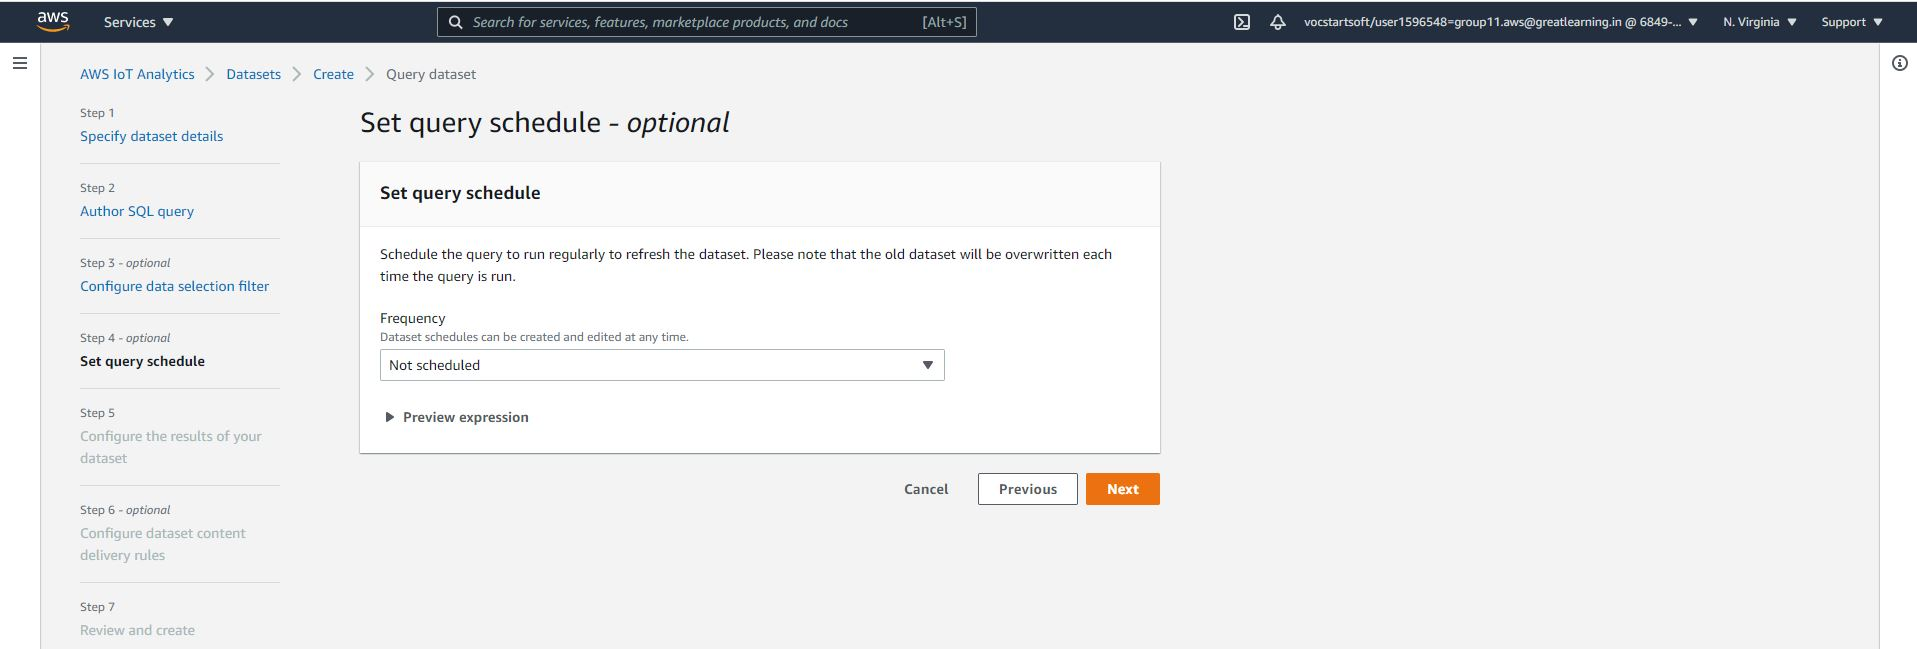



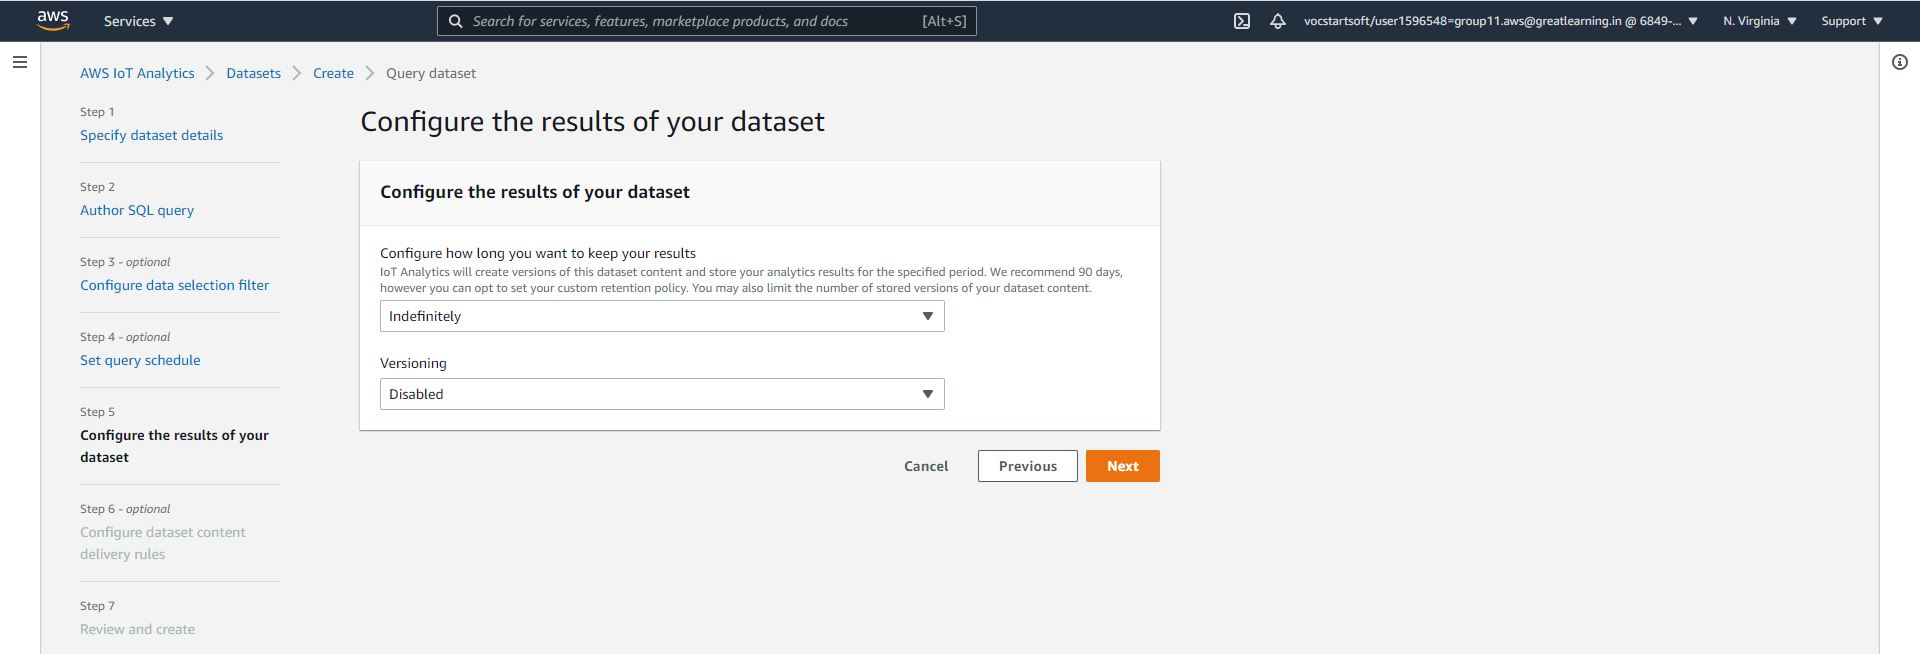

Click on Create data set to complete the process. 

This operation will create the dataset for our analytics example. 

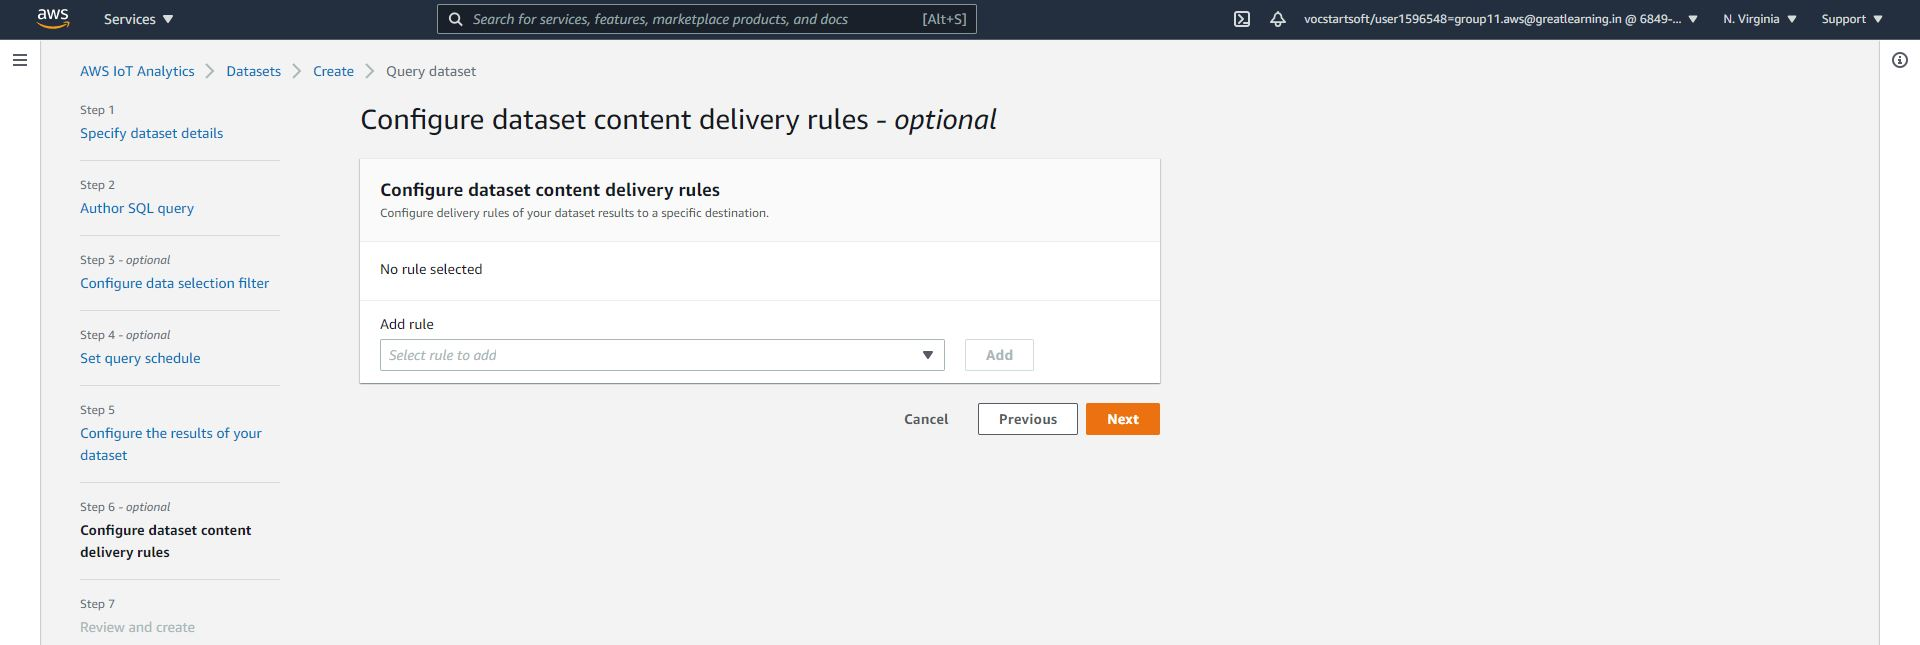

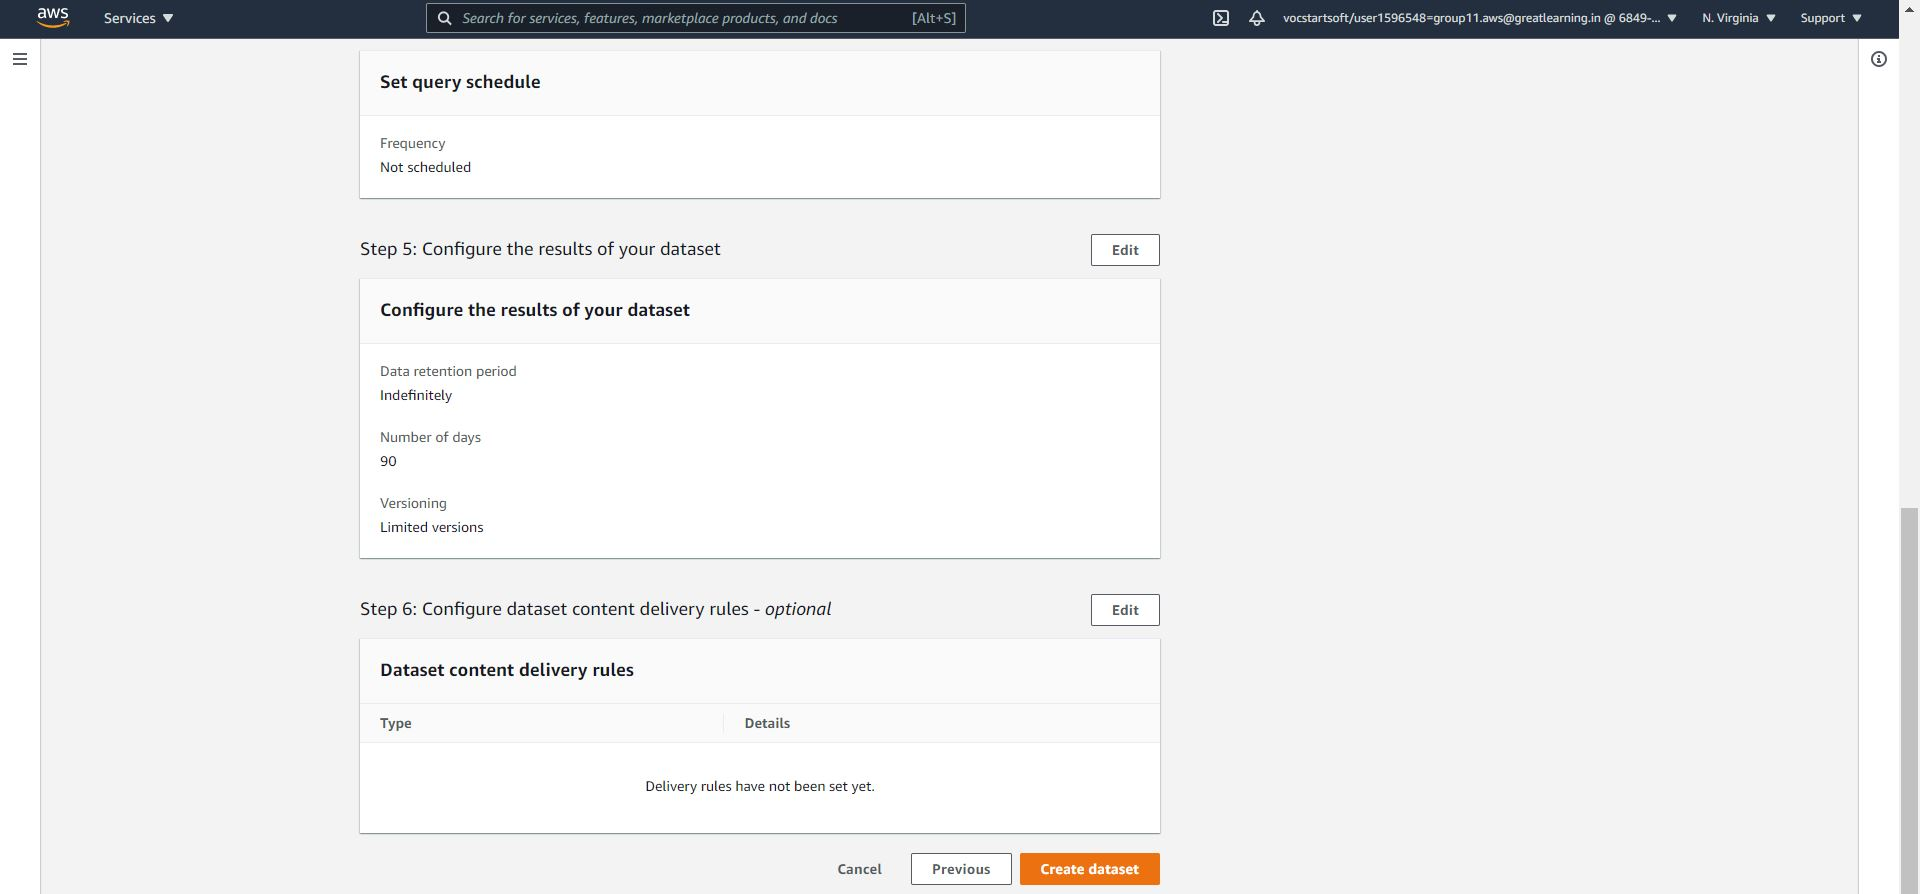

Once the dataset is created, the dataset console page will look as following. 

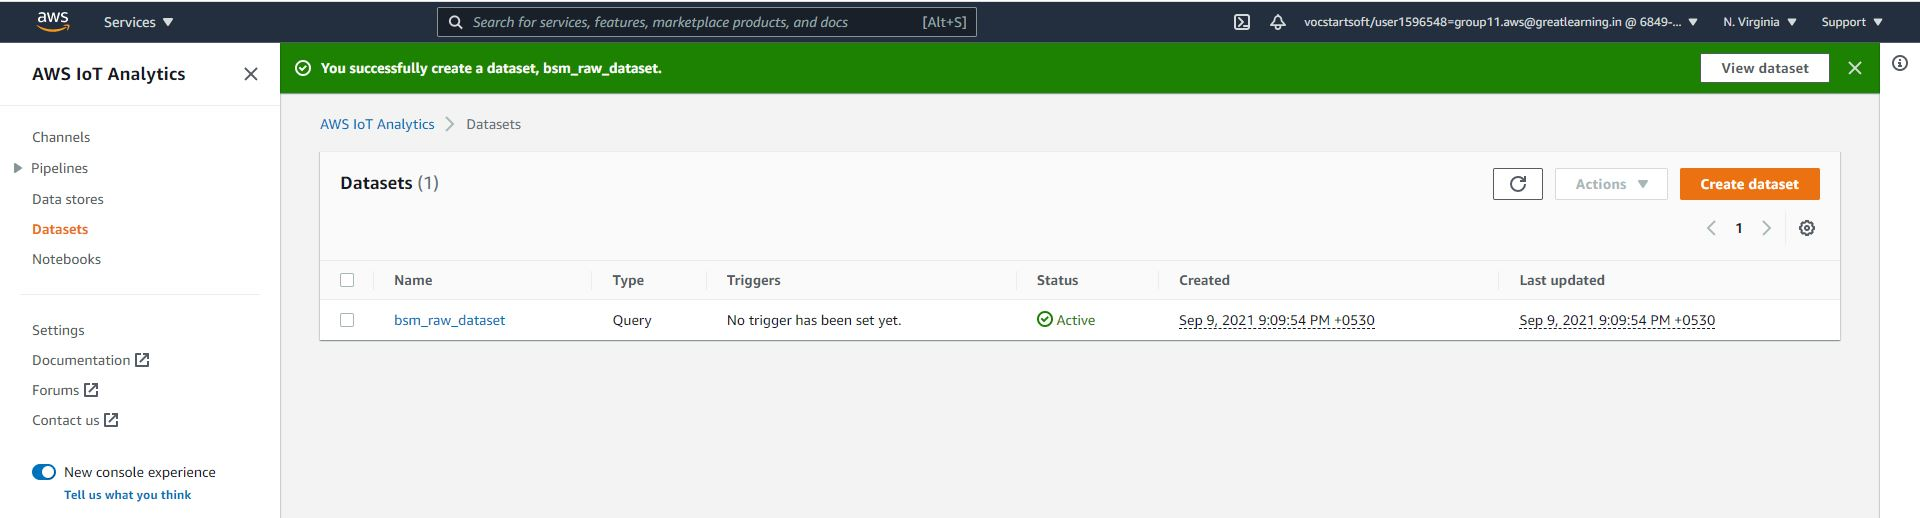

Click on the created dataset which will look as following, now click on run now to start receiving the data. 

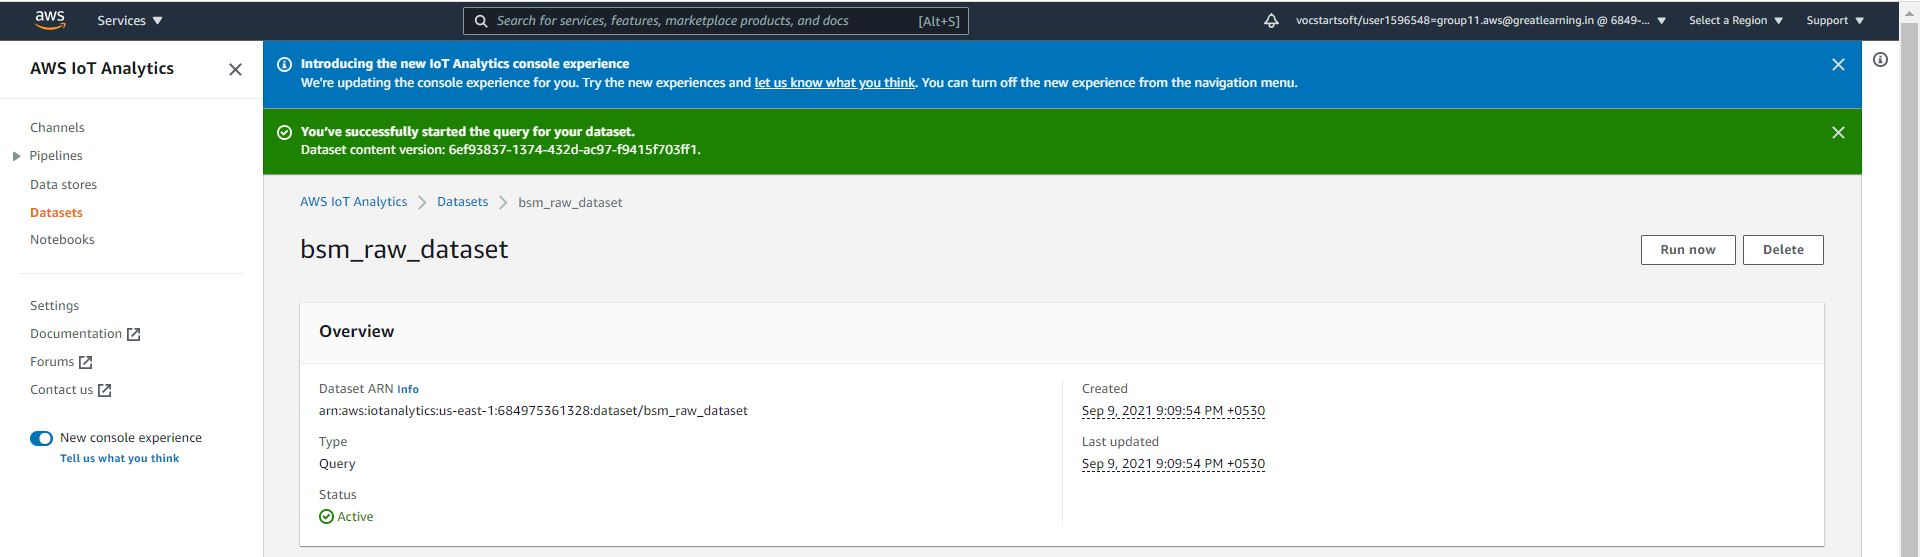

# <font color='blue'> AWS IoT analytics : Notebook Creation </font>

Once the channel, data store, pipeline, and data set are created, we can prepare our notebook to perform various operations. 

In orde to create the notebook we need to first create the notebook instance.

To do this, go to the AWS management console, search for sagemaker and choose the correct option. 

On the sagemaker page, choose Notebook Instances tab available under Amazon sagemaker studio. 

Click on create notebook instance, it will take you to the next page. 

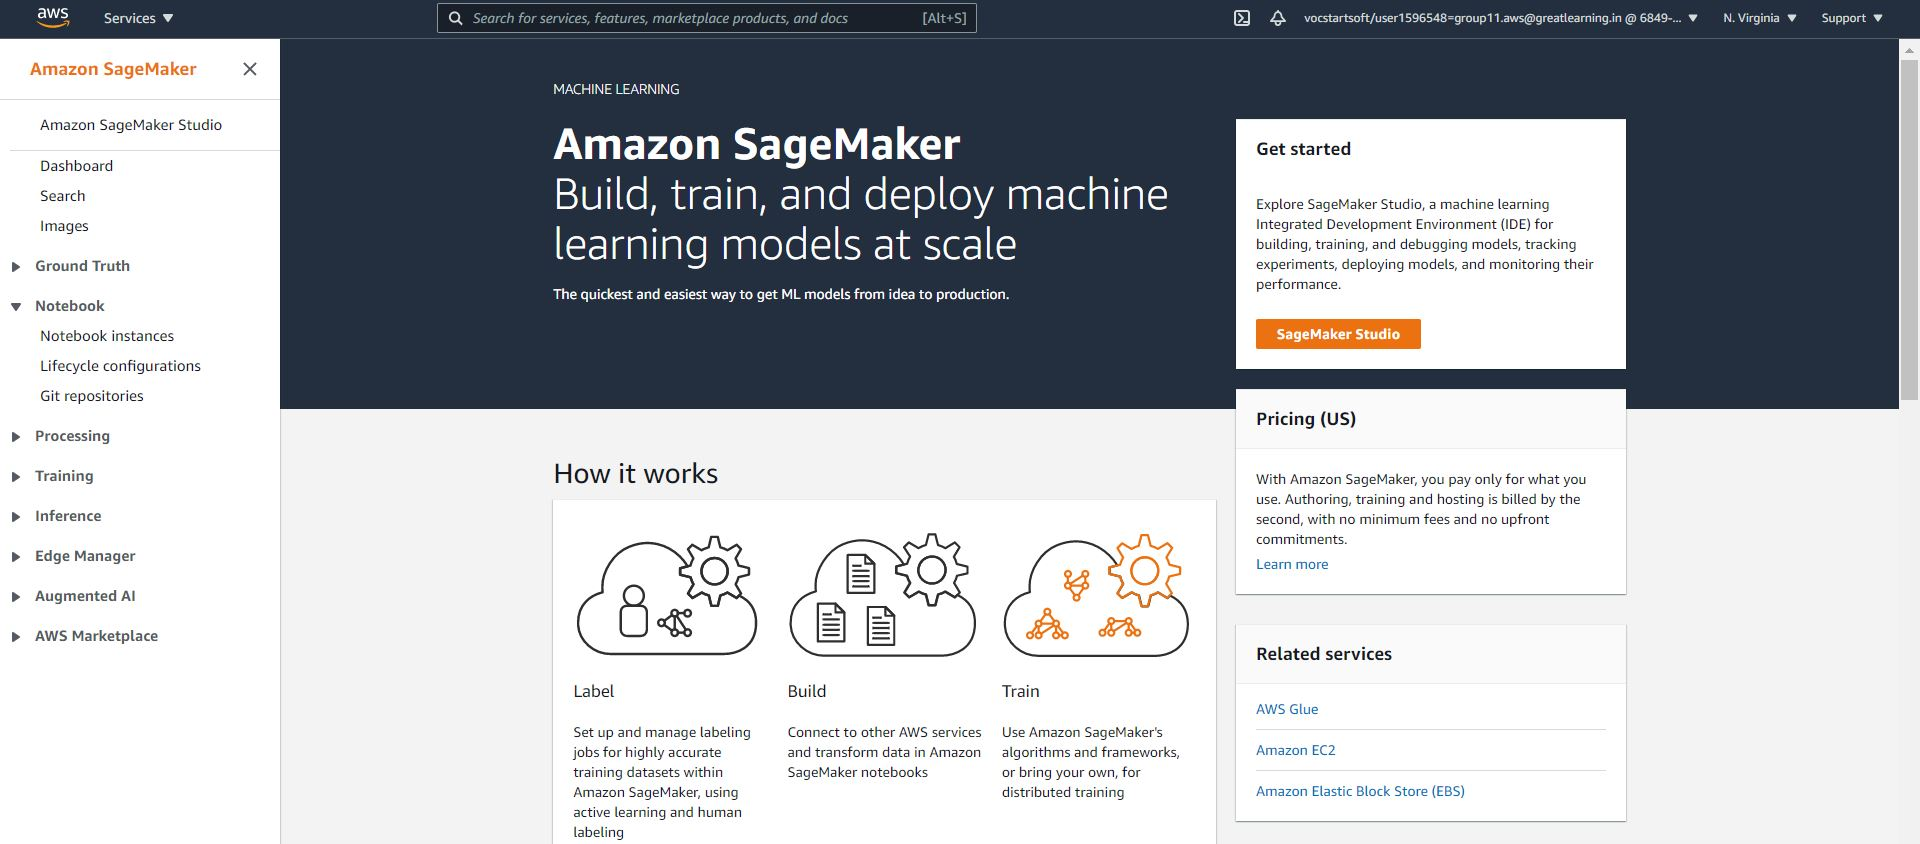

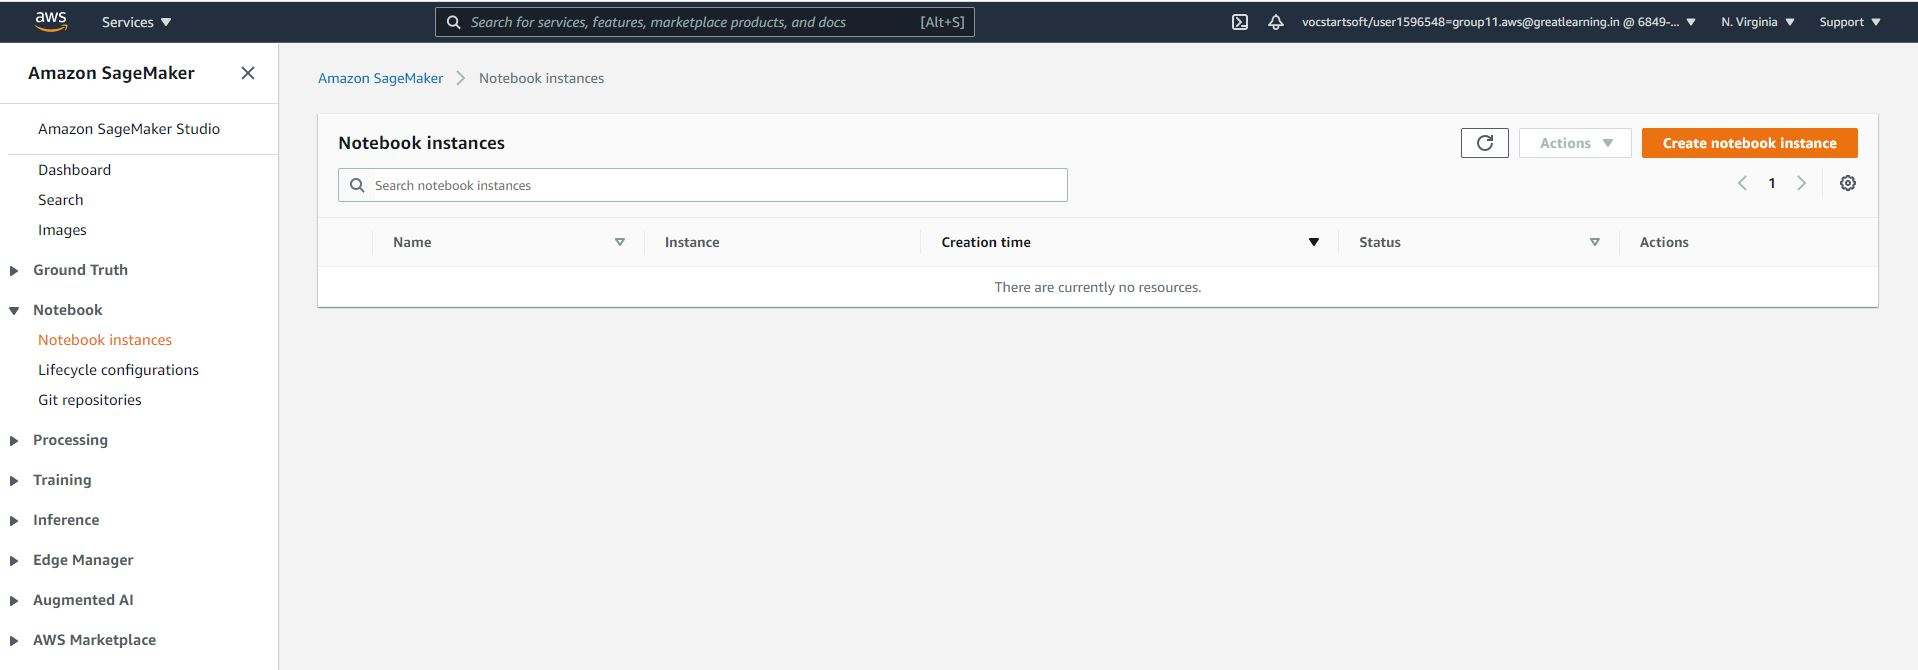

Enter the instance name and choose type as ml.t3.medium. Before clicking on create pass the IAM role ARN 

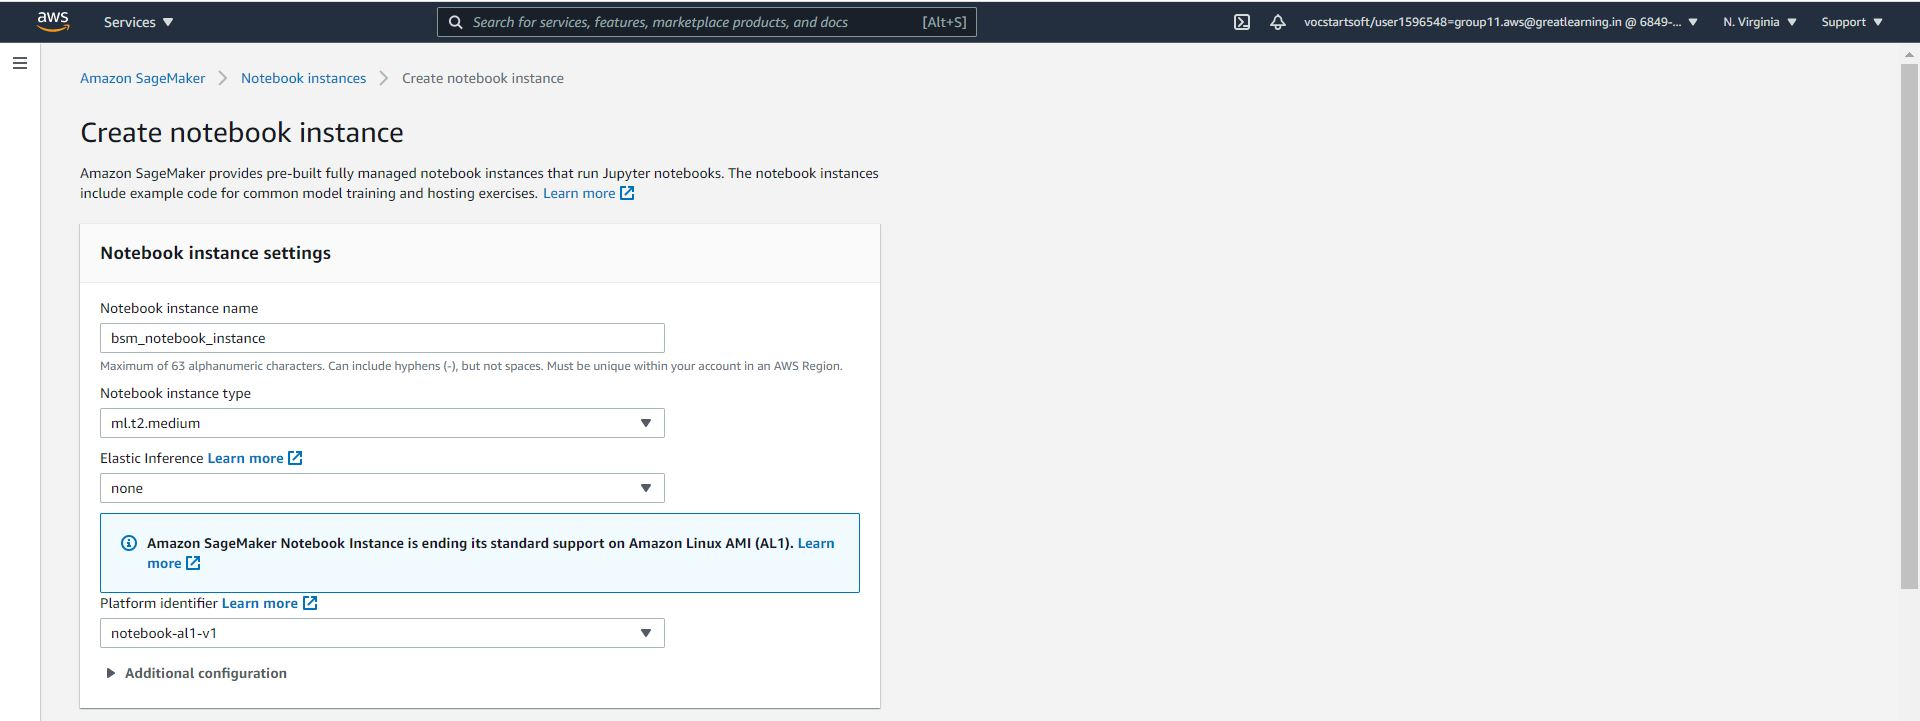

In the IAM role, choose the IAM Notebook role which we created earlier.

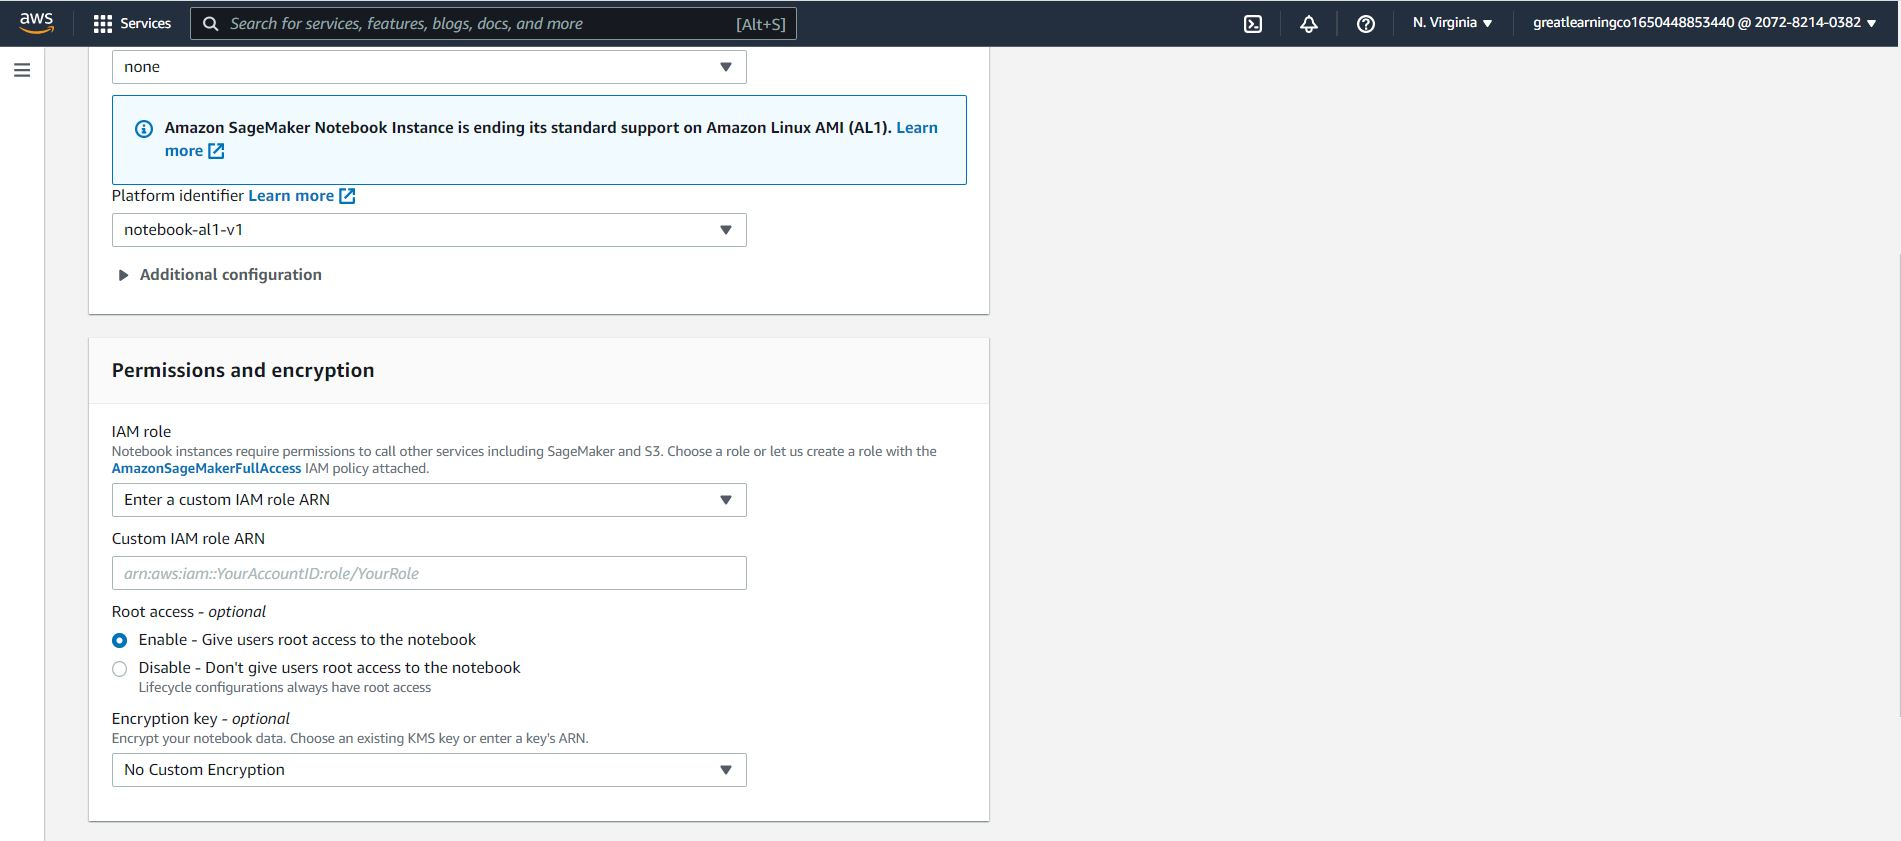

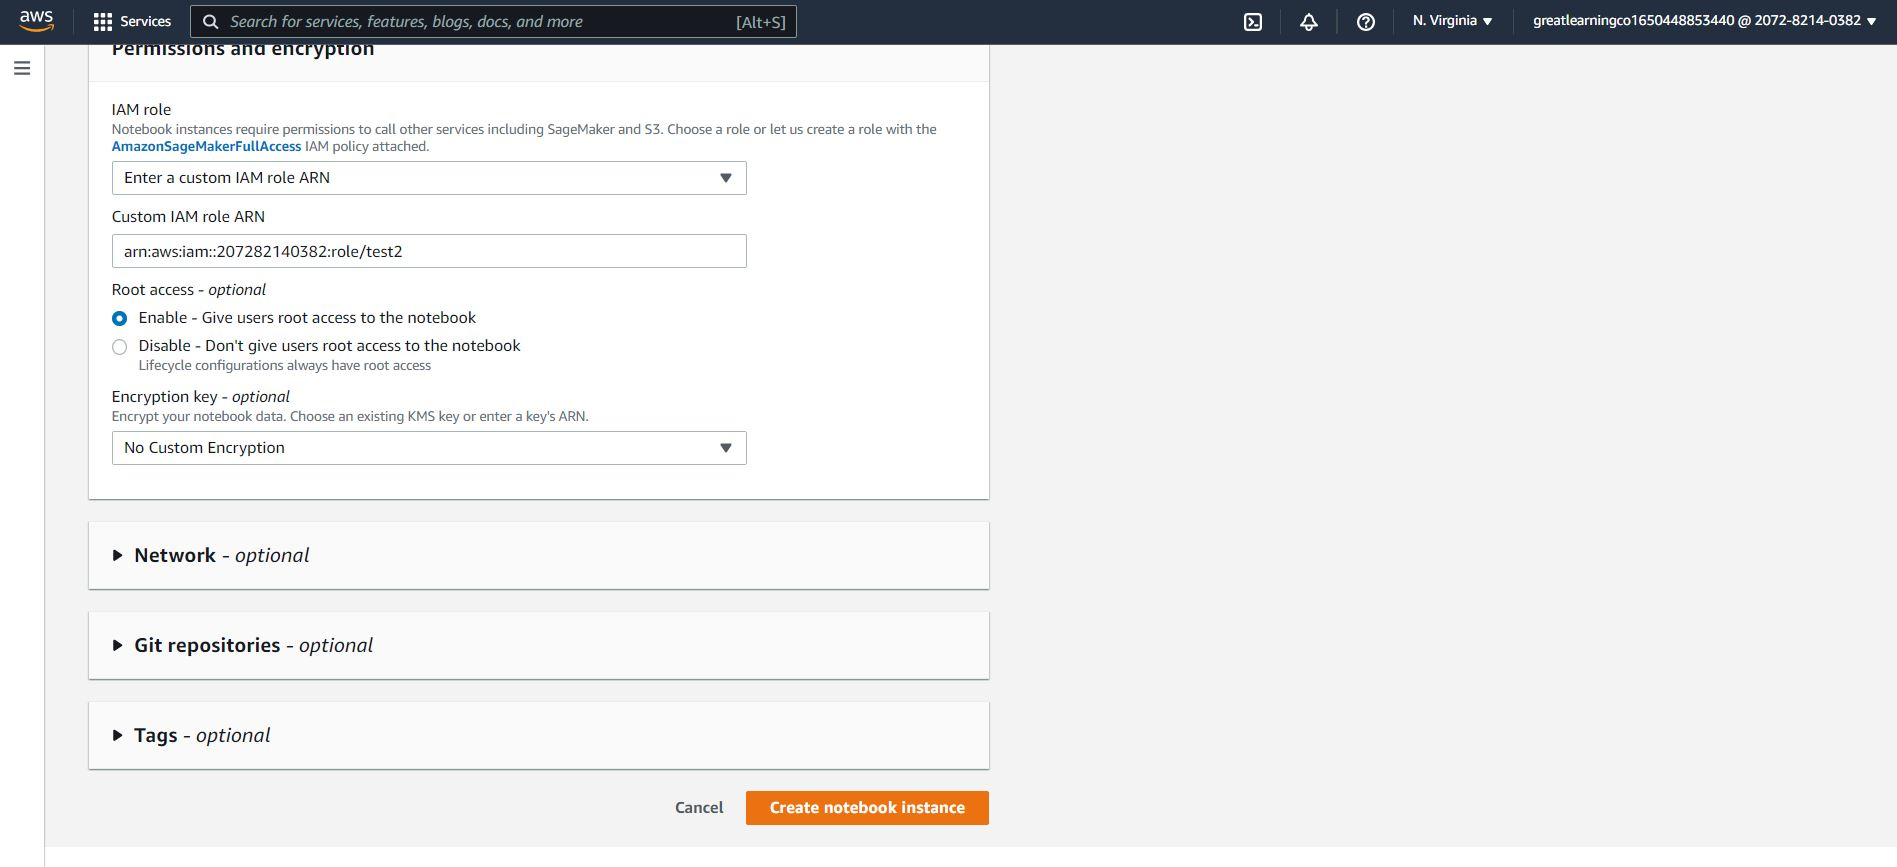

Scroll below and click on create notebook instance. 

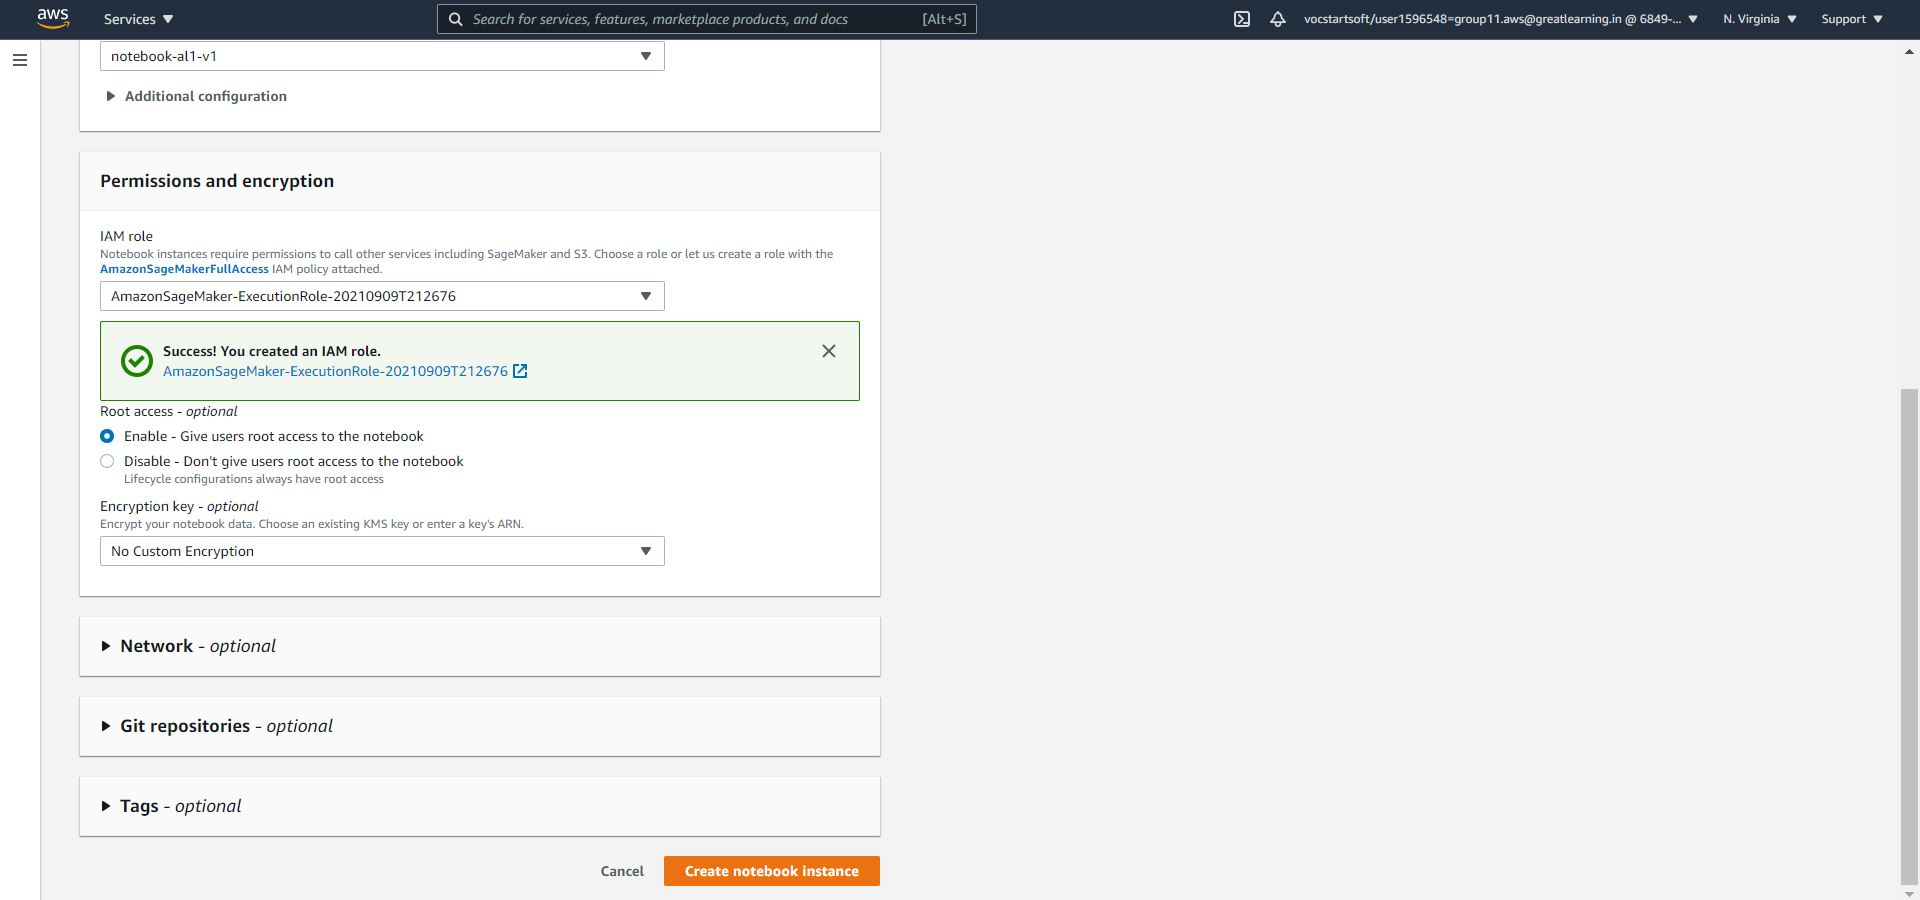


In this we will attach policies which will help us to push the data on MQTT core. 

For this we will add the policies which will give full access to EC2 machine and IoT Core. 

Goto Notebook instances, under permissions and encryption choose IAM role as mentioned below

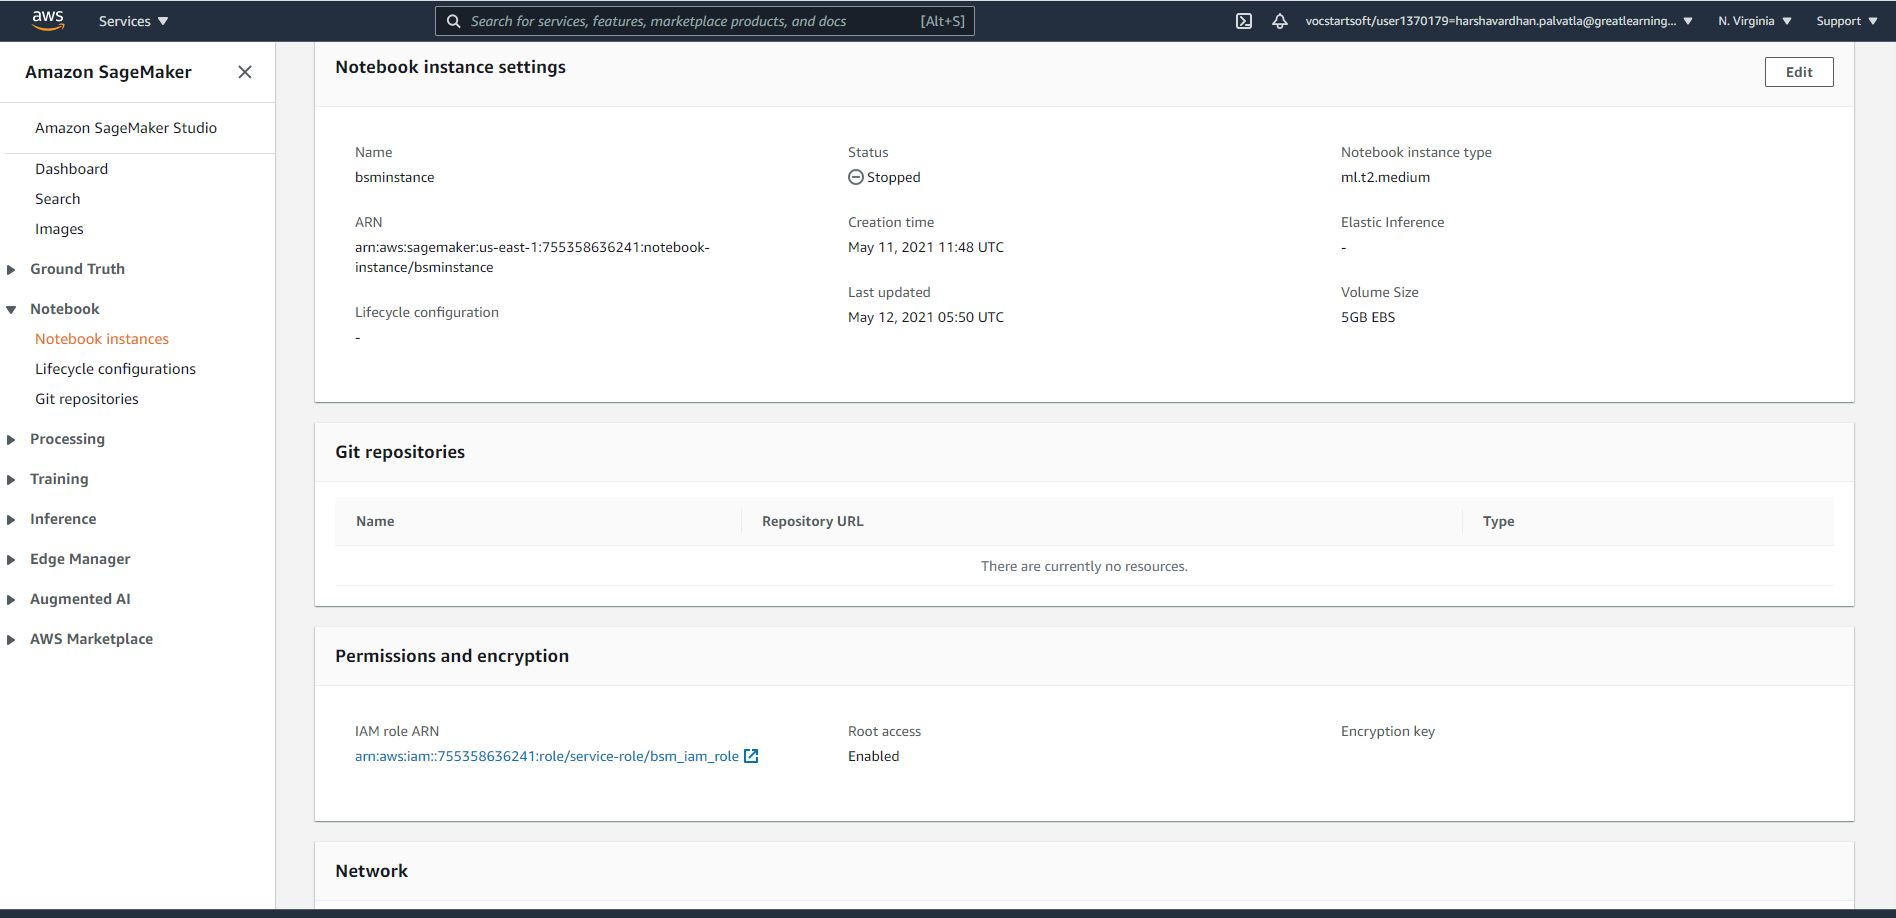

Under that role add the policy for Ec2 and IoT. 

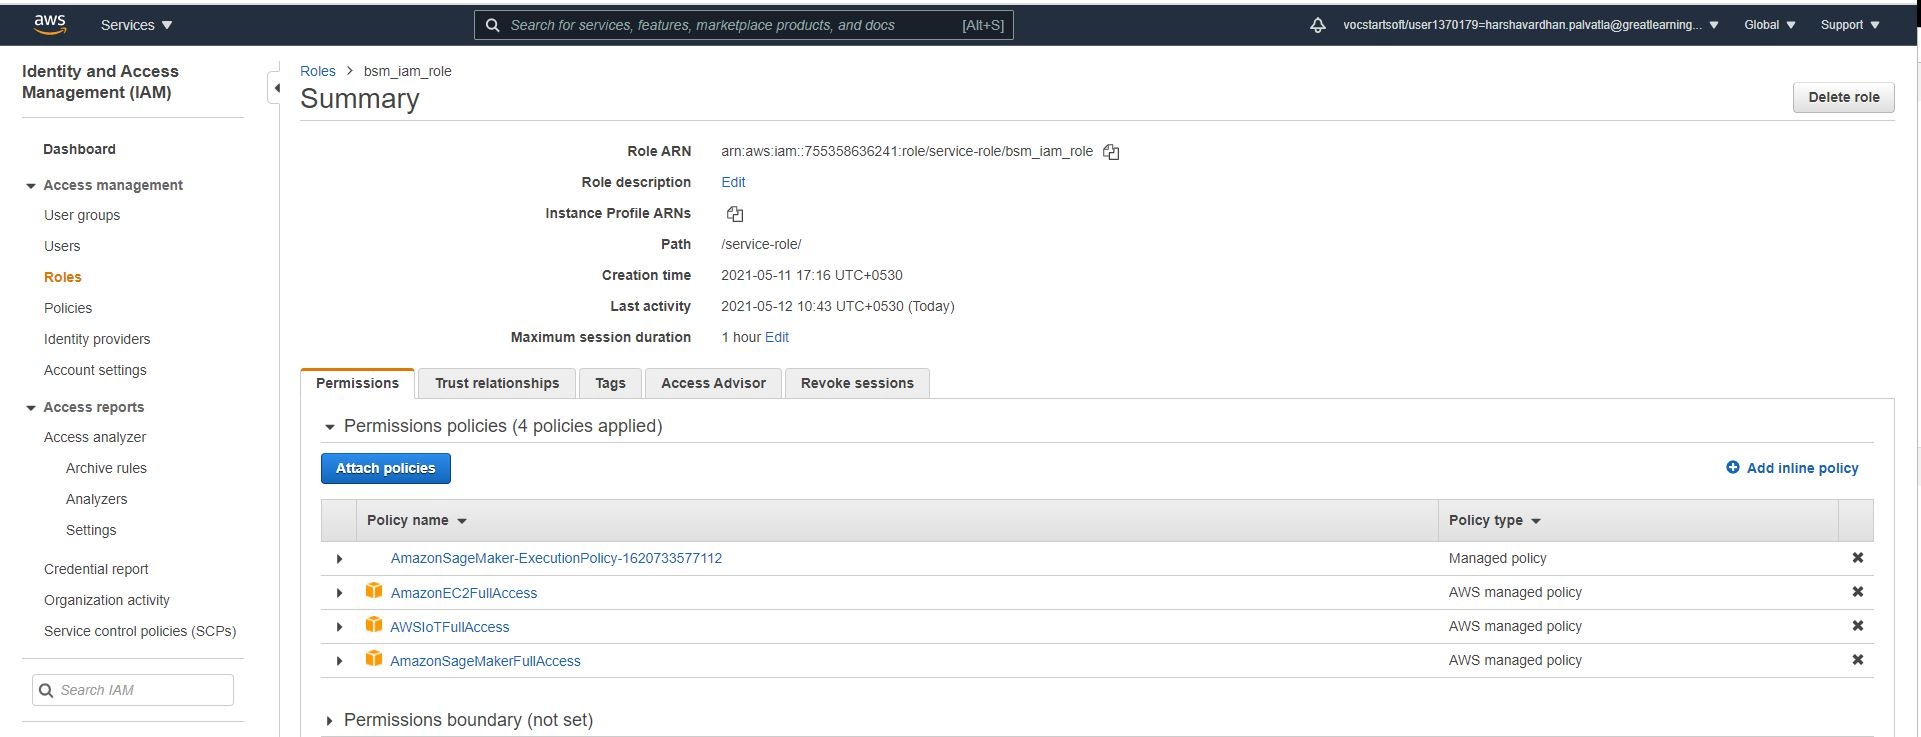


Now go to the AWS IAM services available under AWS management console.

IAM services page will appear similar to the attached image. 

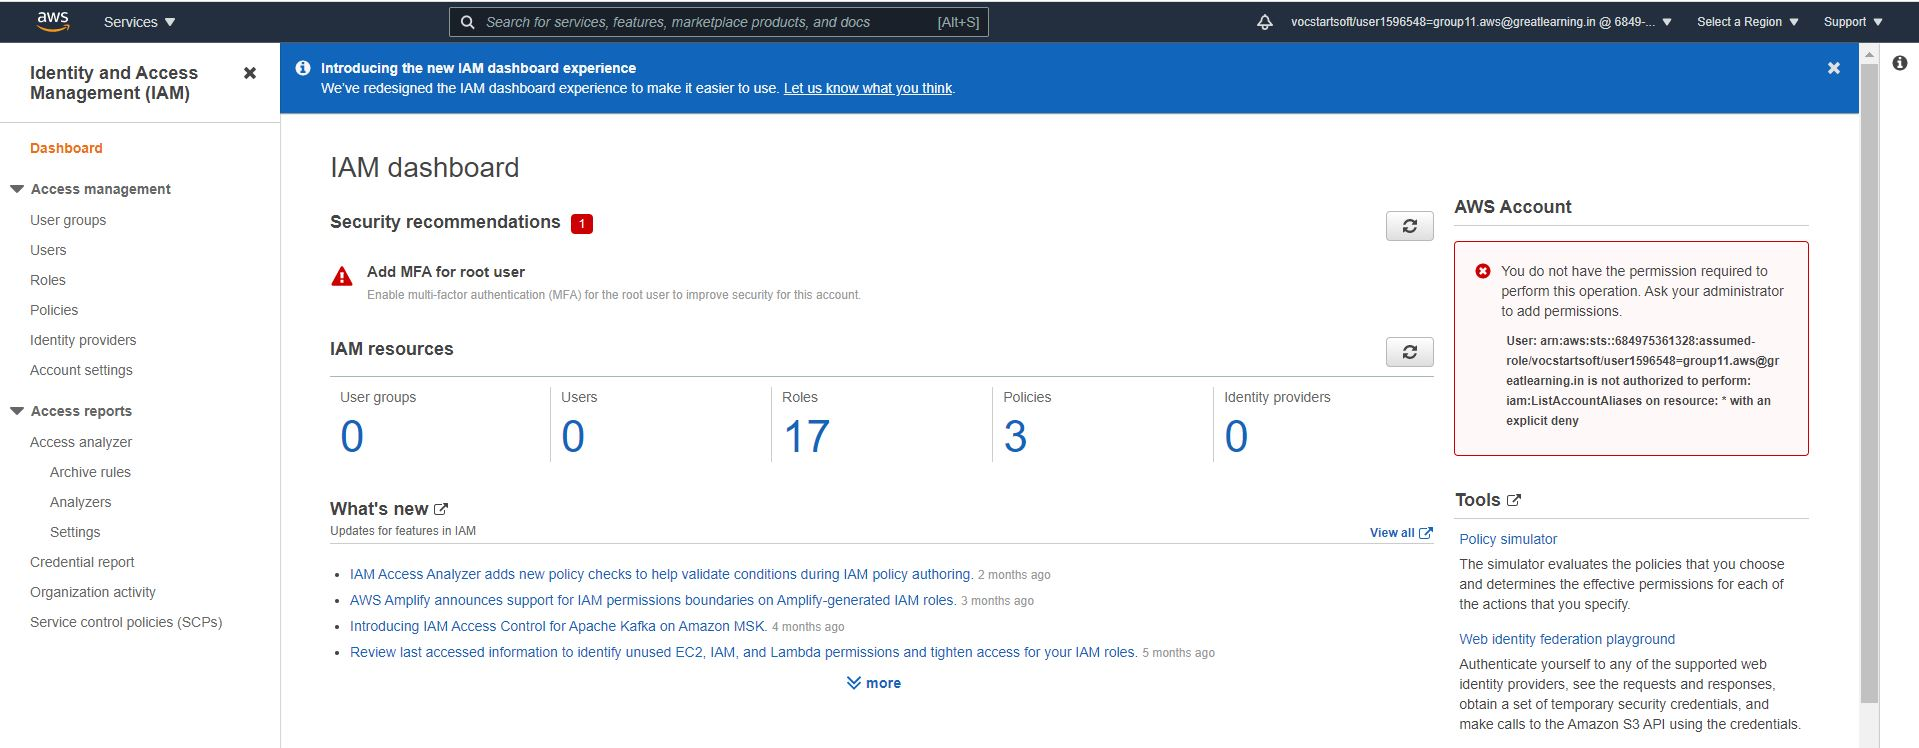

Click on Roles and search for the notebook role we created for AWS Sagemaker. 

On this page, under the `Permissions` tab, click on `Add permissions` and then click on `Create inline policy`. 

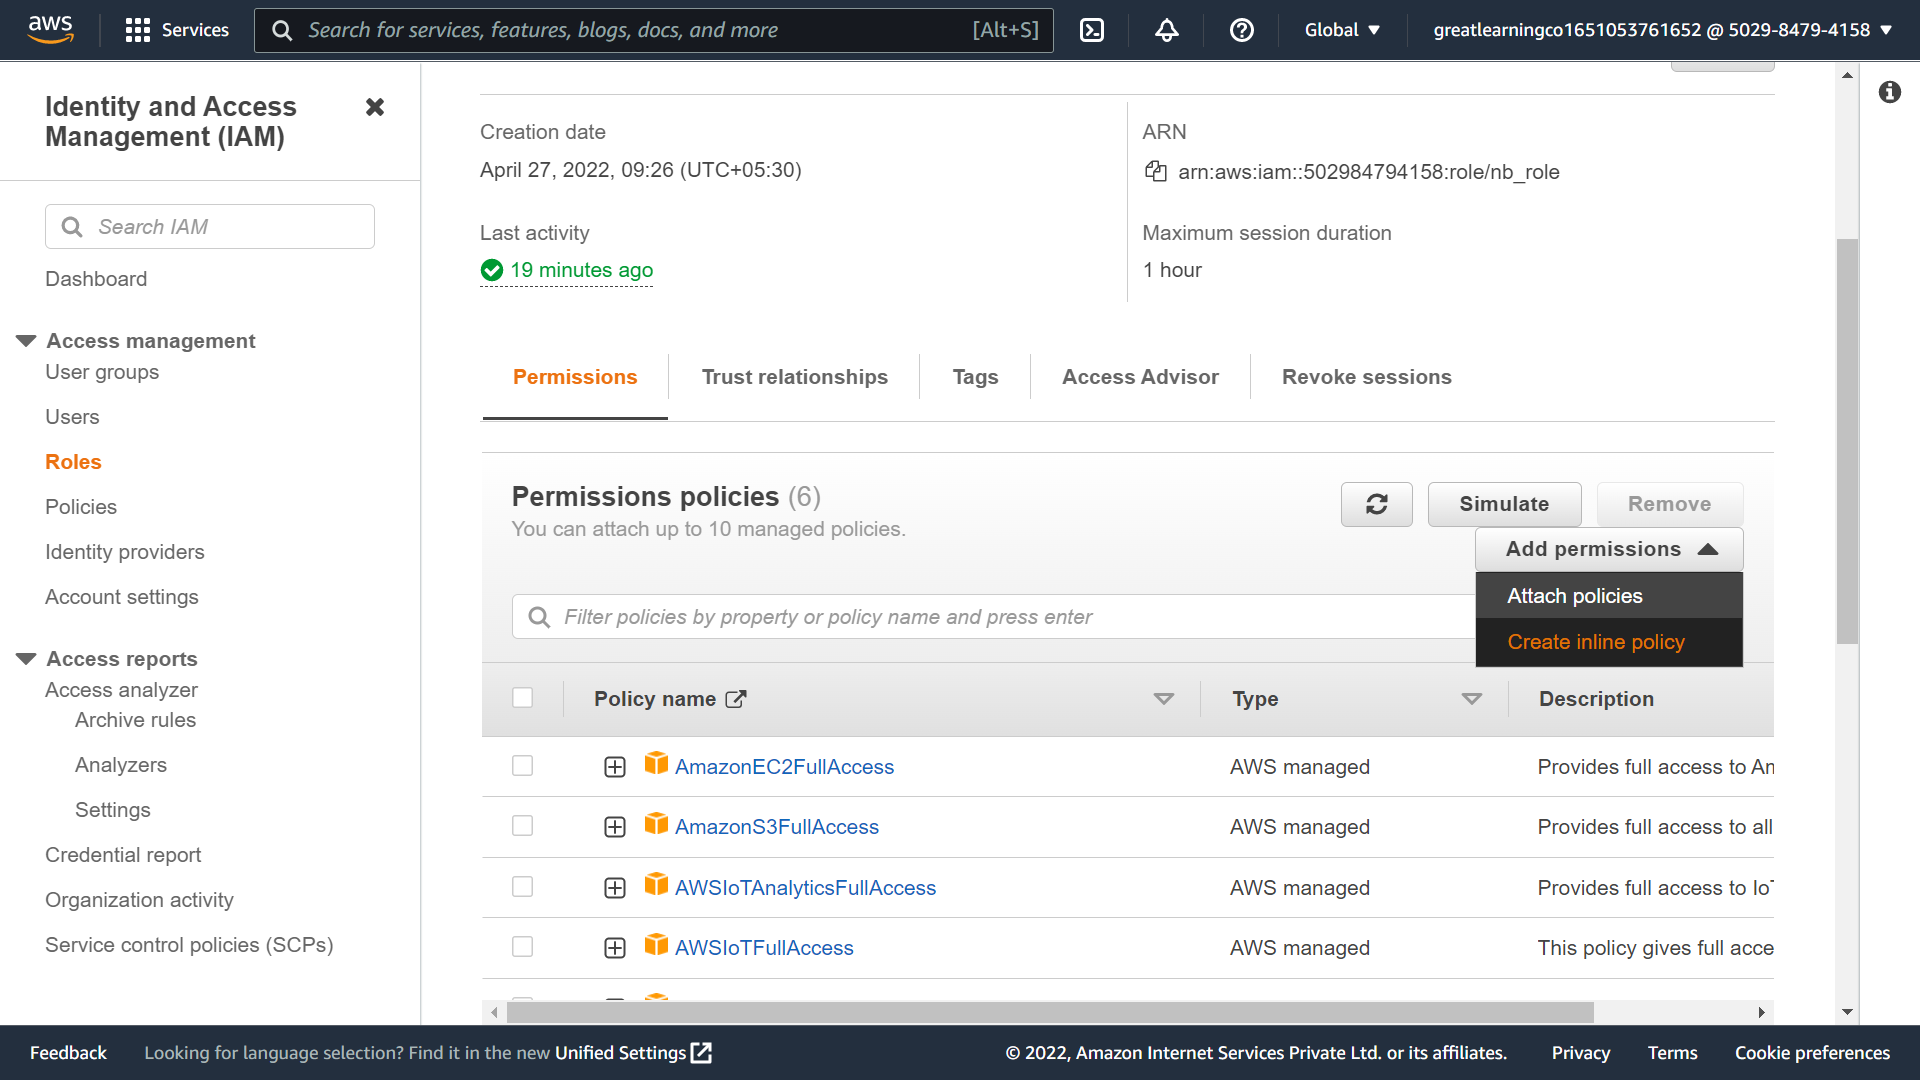

The next page will look similar to the below attached image. 

On this page we need to add service, actions, resources and requested conditions.   

Under service choose iotAnalytics and click on actions.


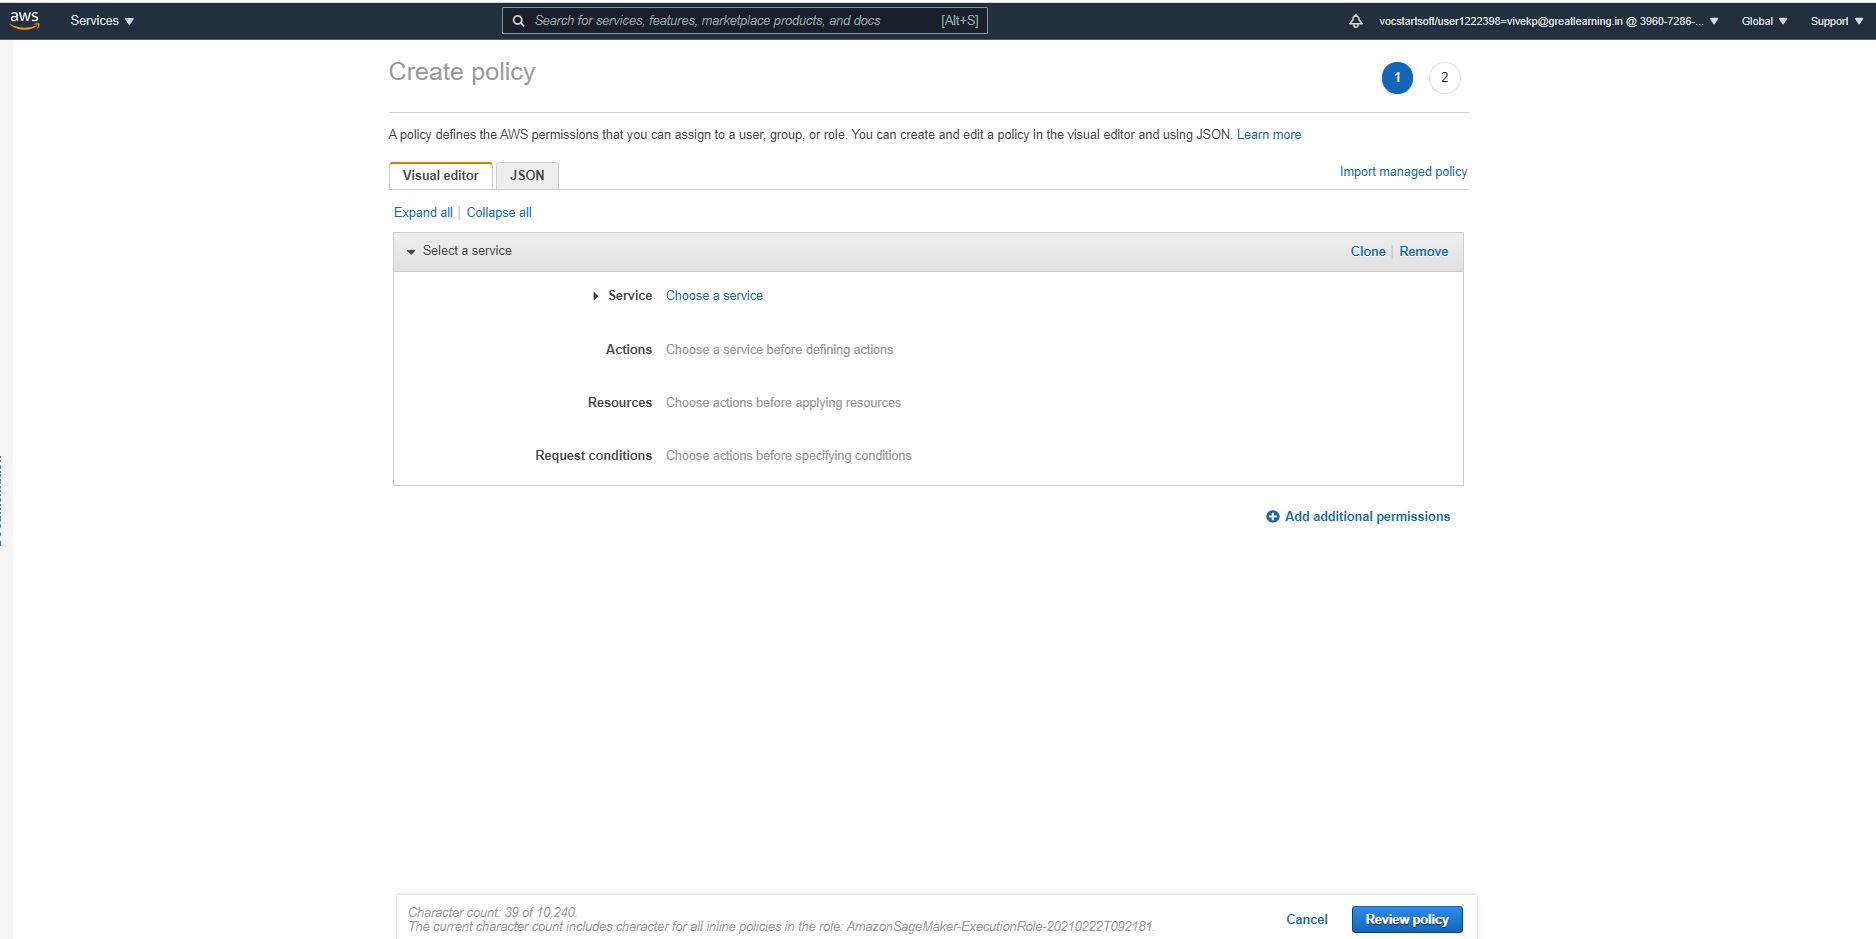

Under actions search for GetDatasetContent and click on resources. 


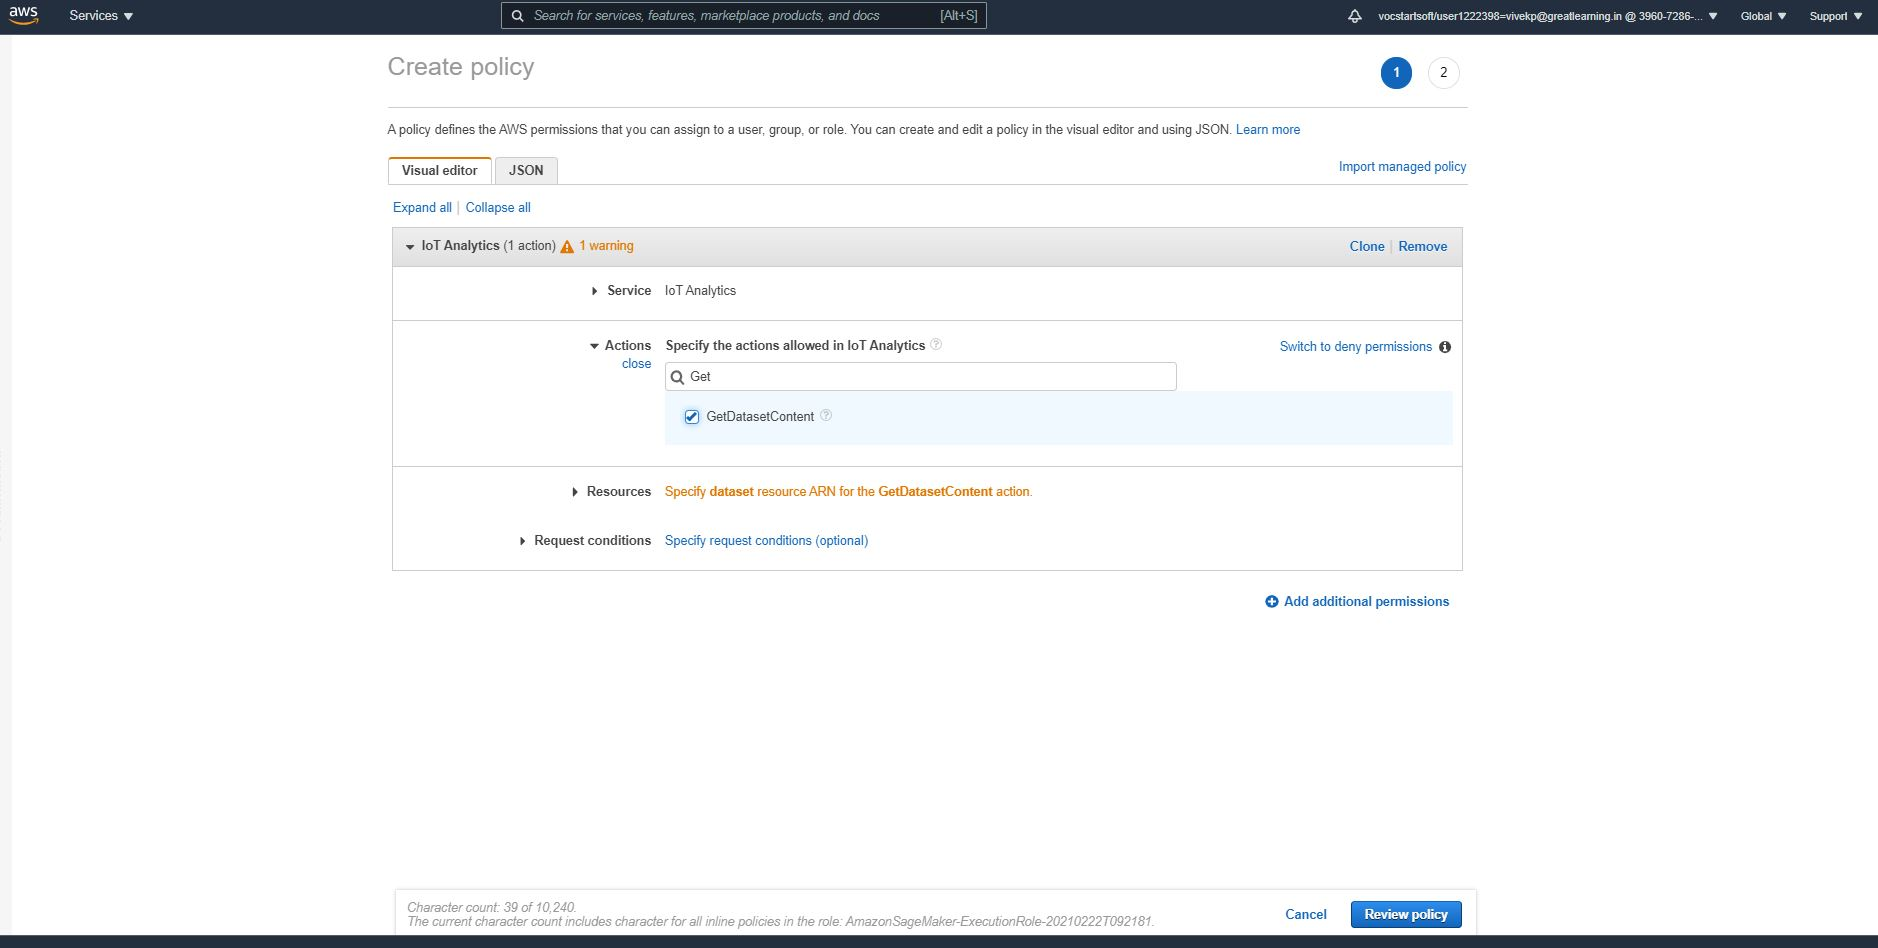

Under resources choose specific and click on add ARN. 

Enter the Region and dataset name created in the above steps and then click on save changes.  

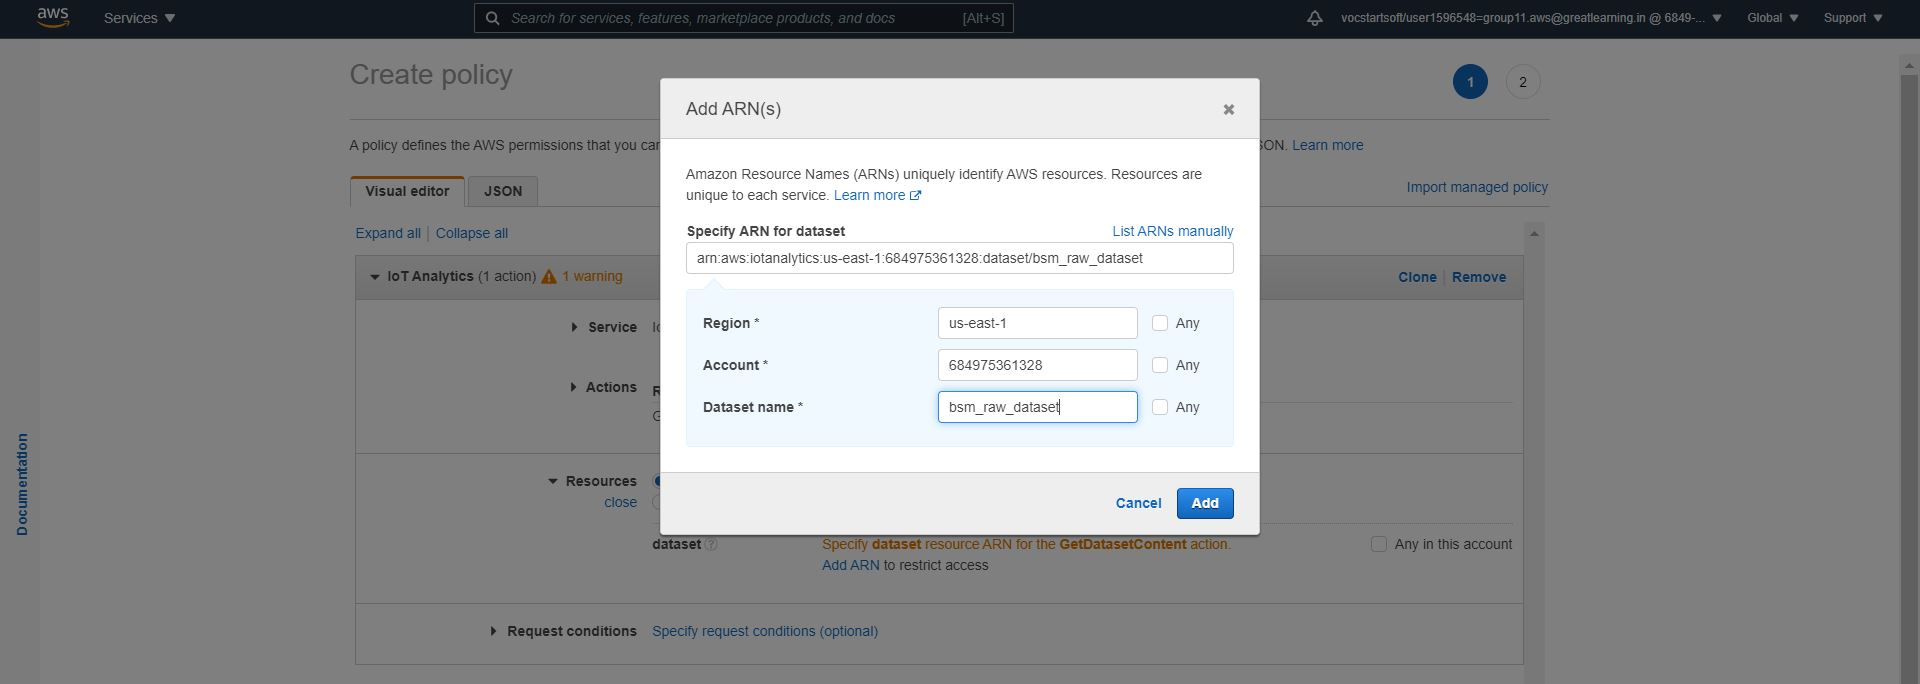

Do not add anything under request conditions and click on Review policy. 

Click on create policy to complete the policy creation process. 

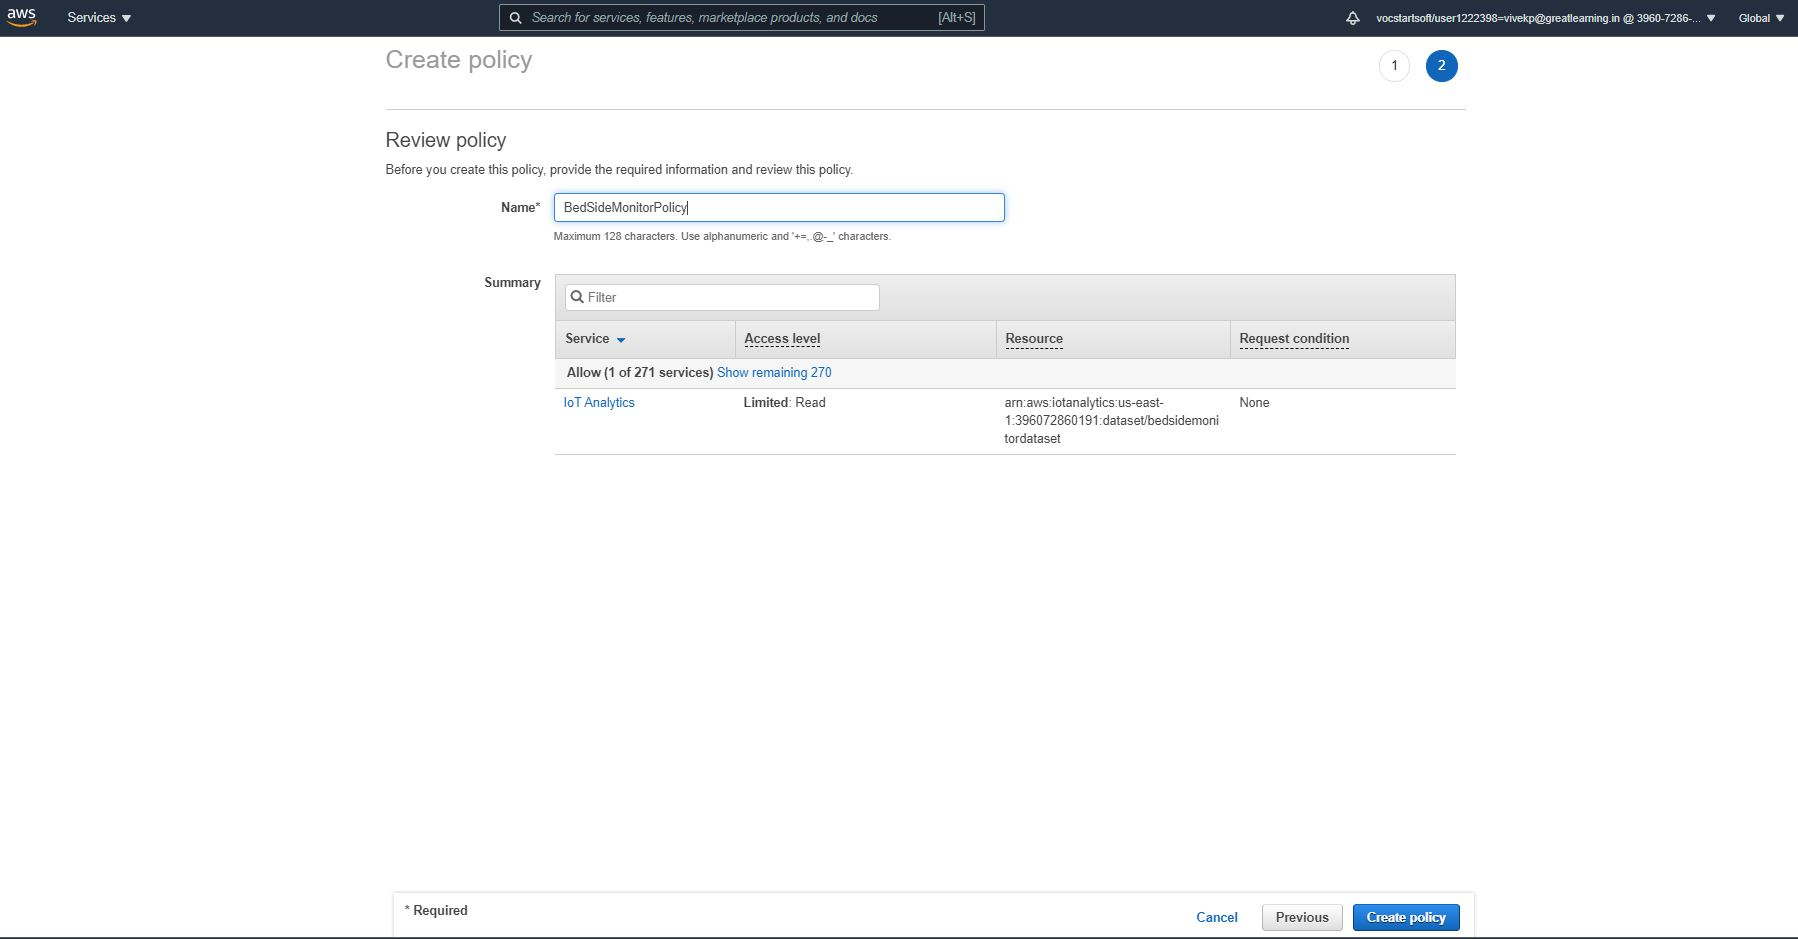

Now go to the IoT analytics service and under the notebook tab, click on create notebook. 

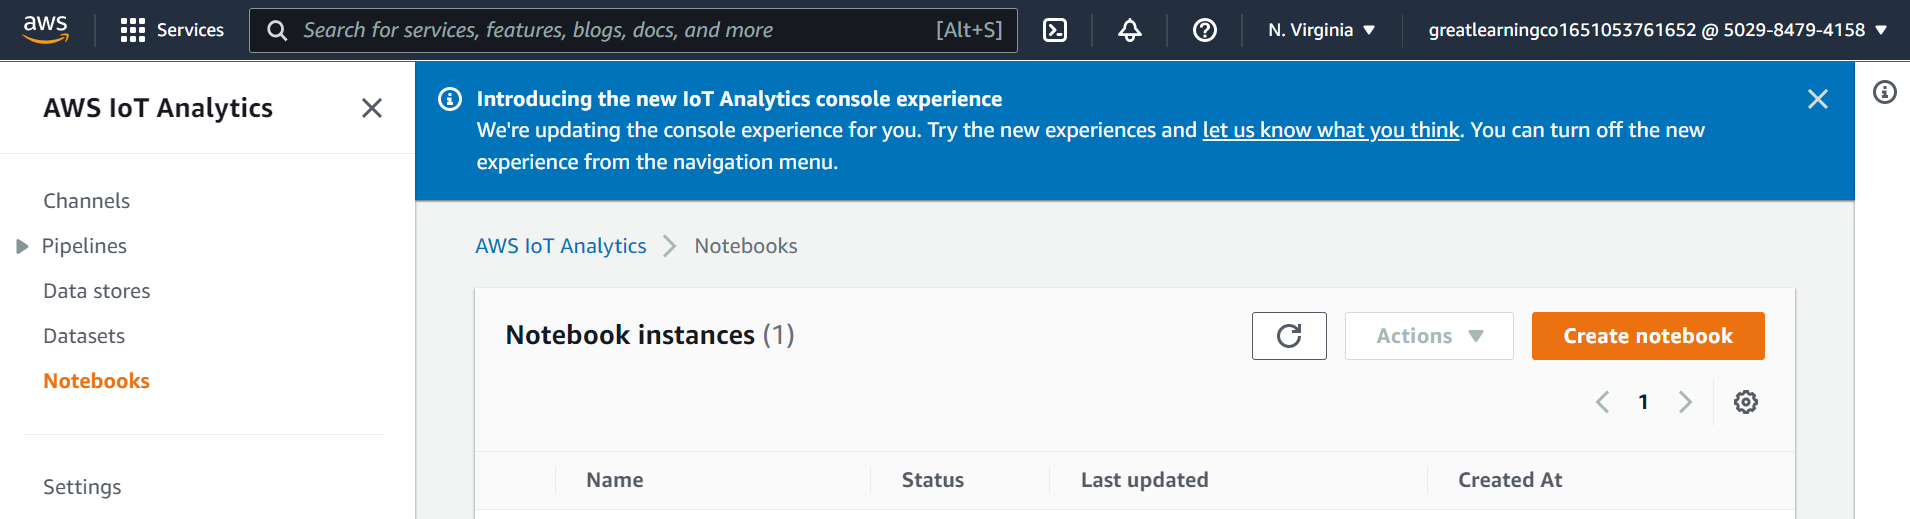

The next page will be similar to the following attached image. Click on Blank Notebook to initiate the notebook creation process. 

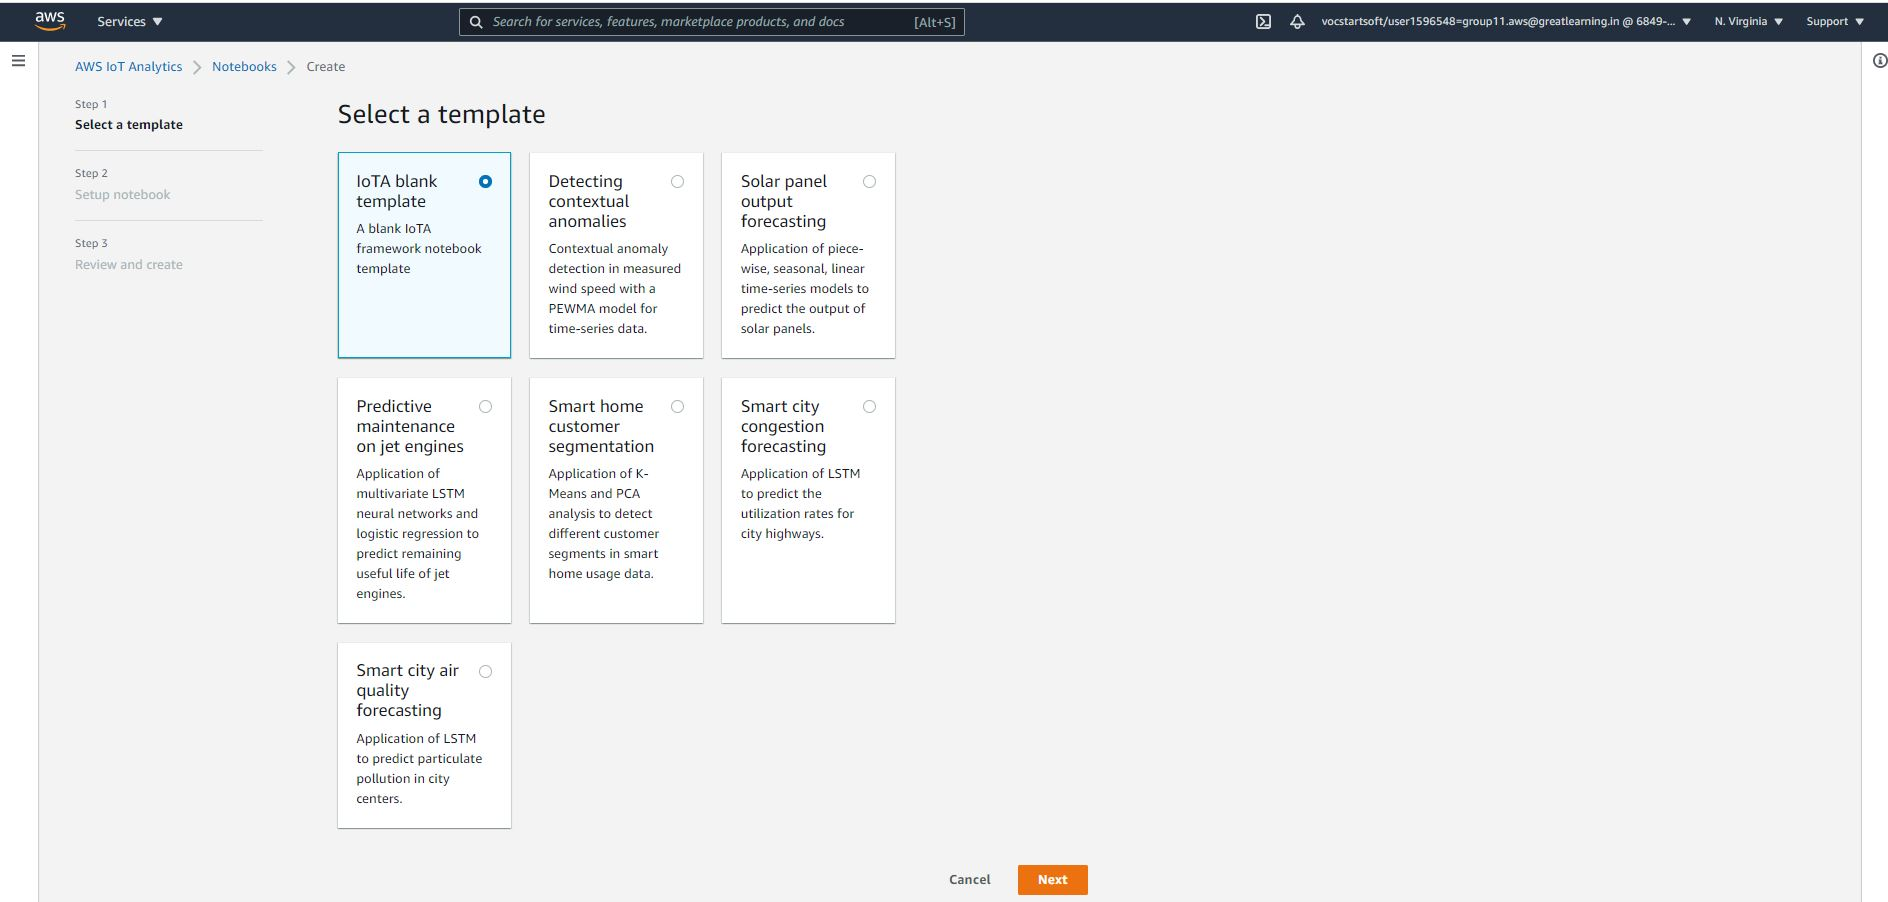

Enter the name for your notebook and provide the data set source. 

Choose the notebook instance and datset source we created in the previous steps. 

Click on Next to go to the next page. 

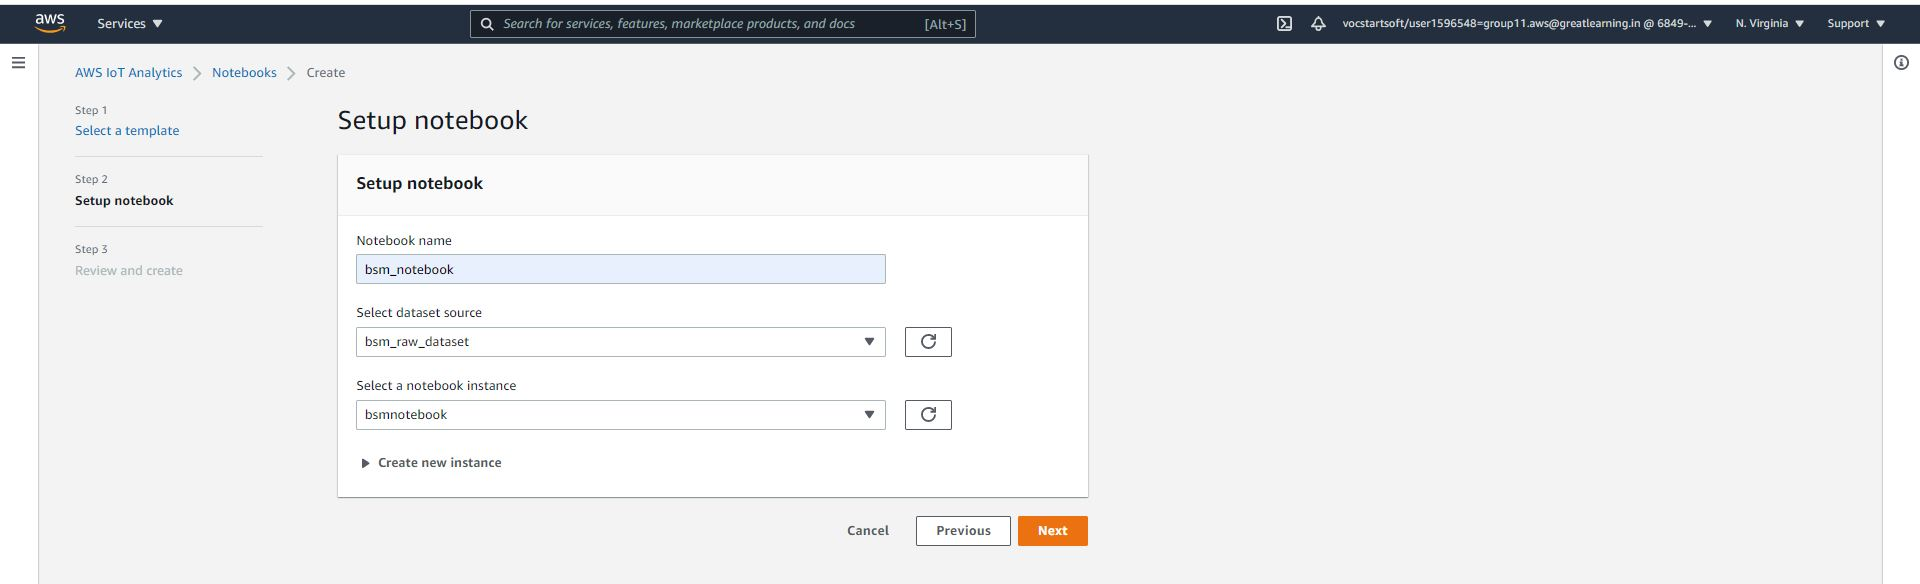

Scroll below and click on Create Notebook, to complete the creation of notebook. 

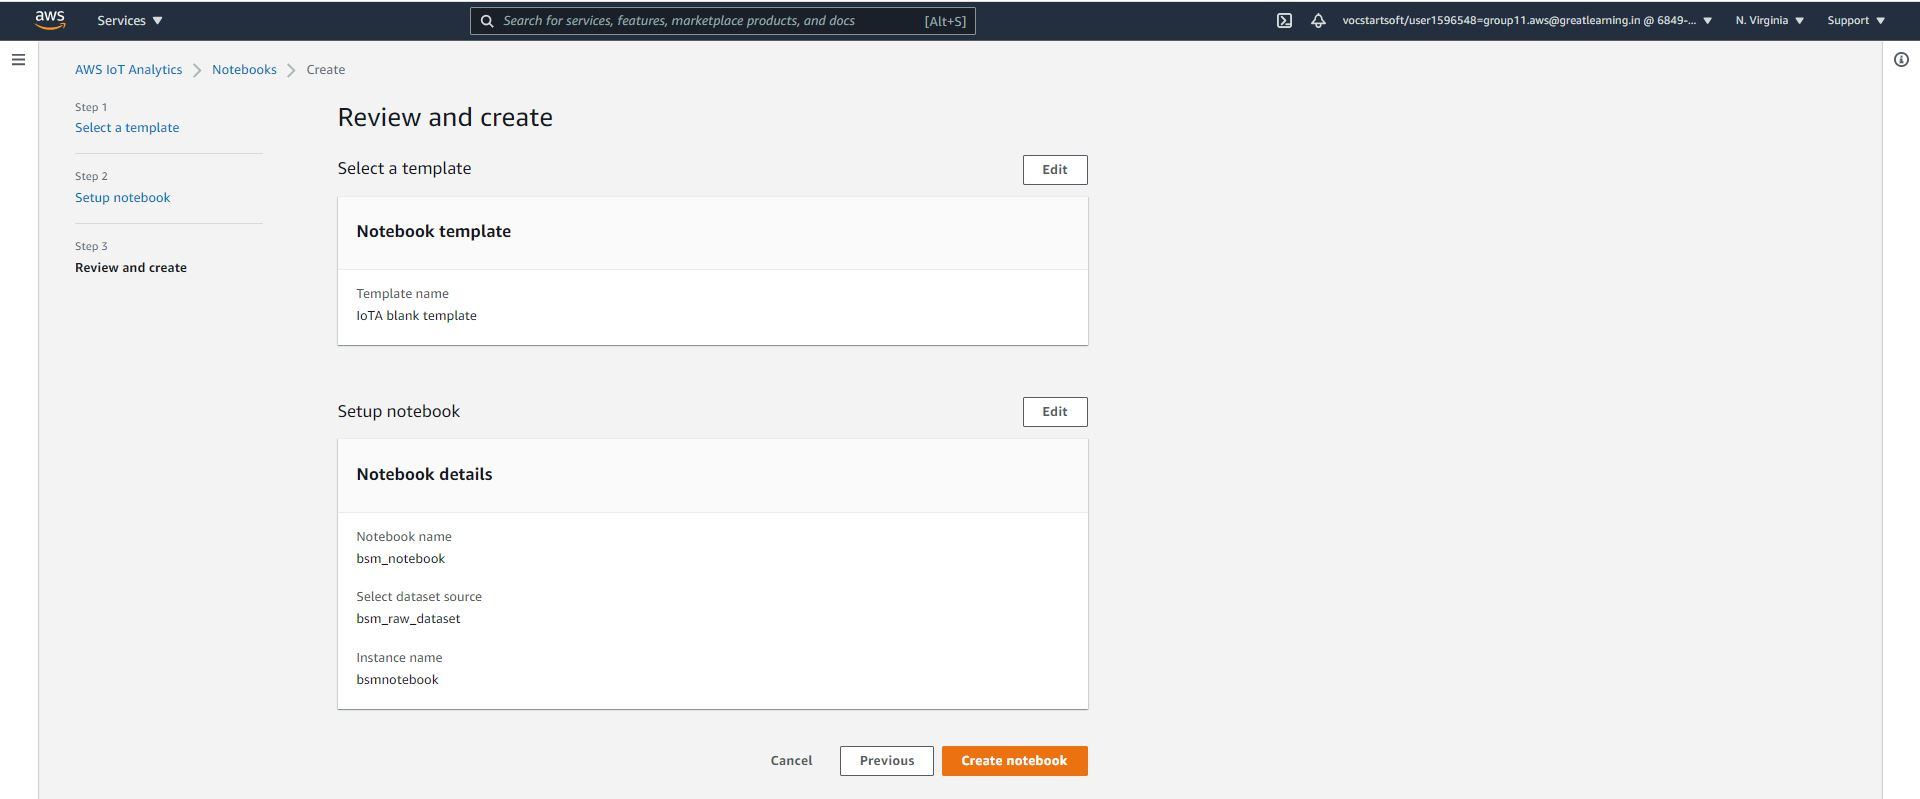

Choose the notebook instance it will show the services that notebook is using, click on the IoT anayltics. 

It will show all the notebooks you have created. 

Choose the notebook you have created. It will prompt you to the jupyter notebook editor. 

Kernel will not be set when notebook was opened for the first time. 

Hence choose the correct kernel to write your code, we have chosen conda_python3. 

Click on set kernel and you are ready to use your notebook.  

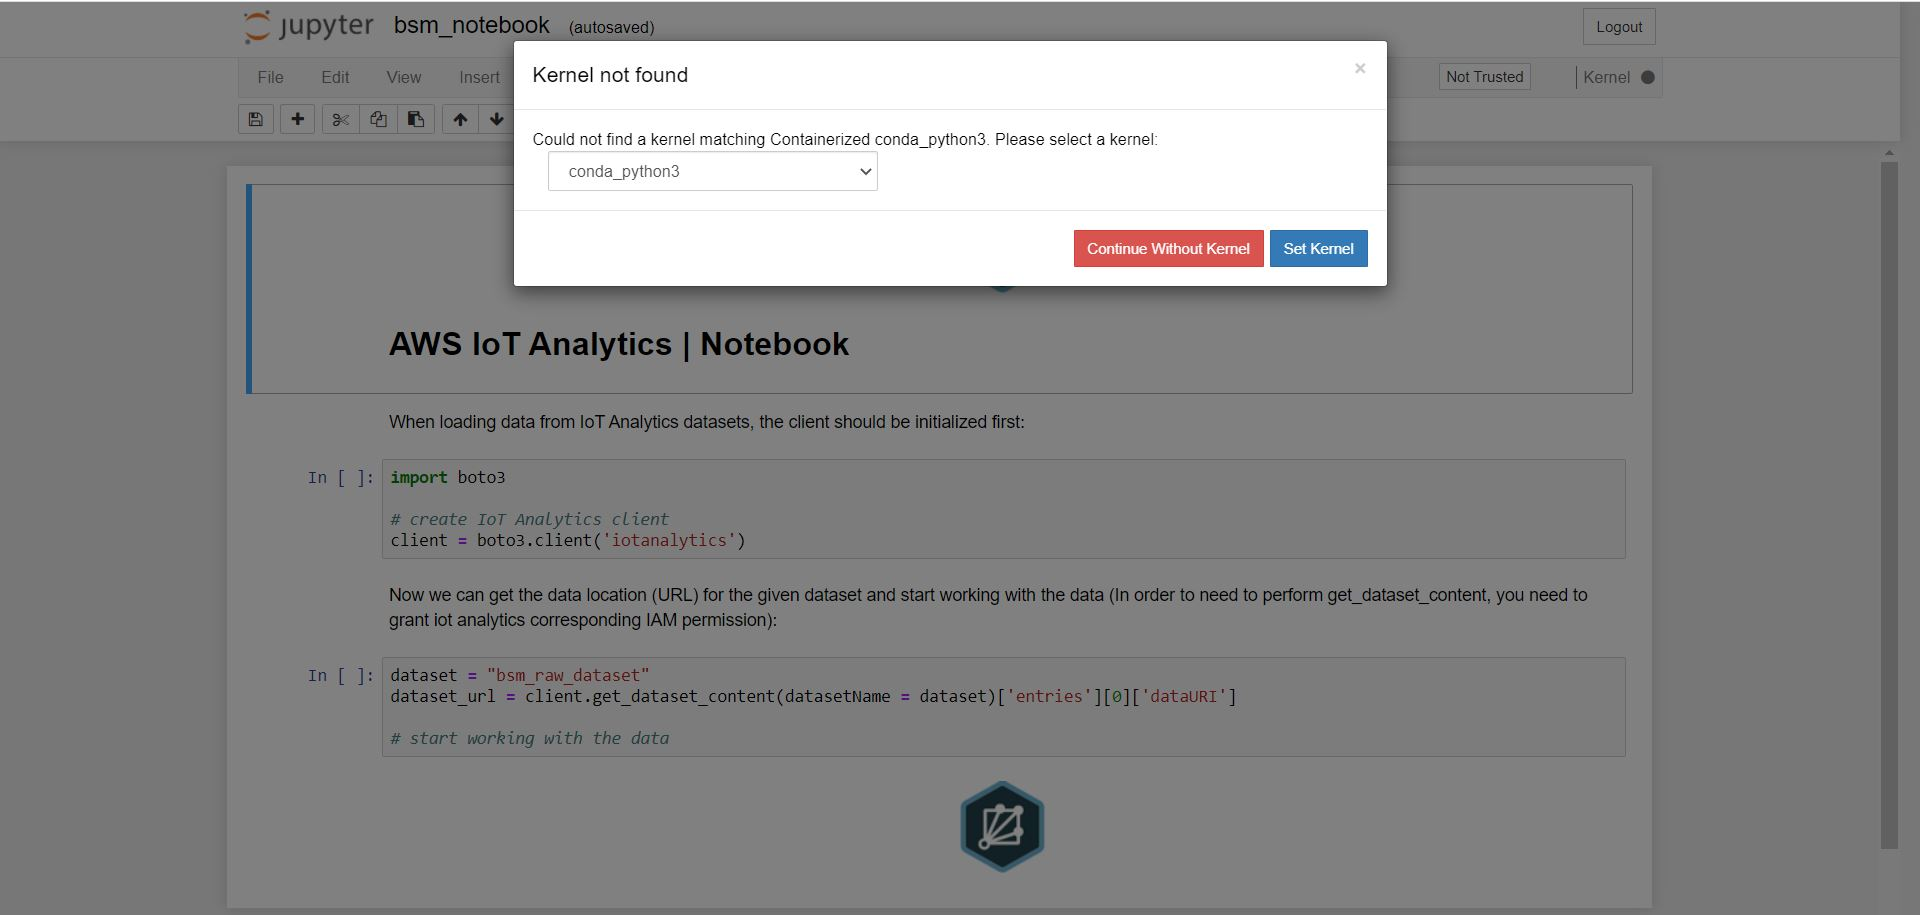

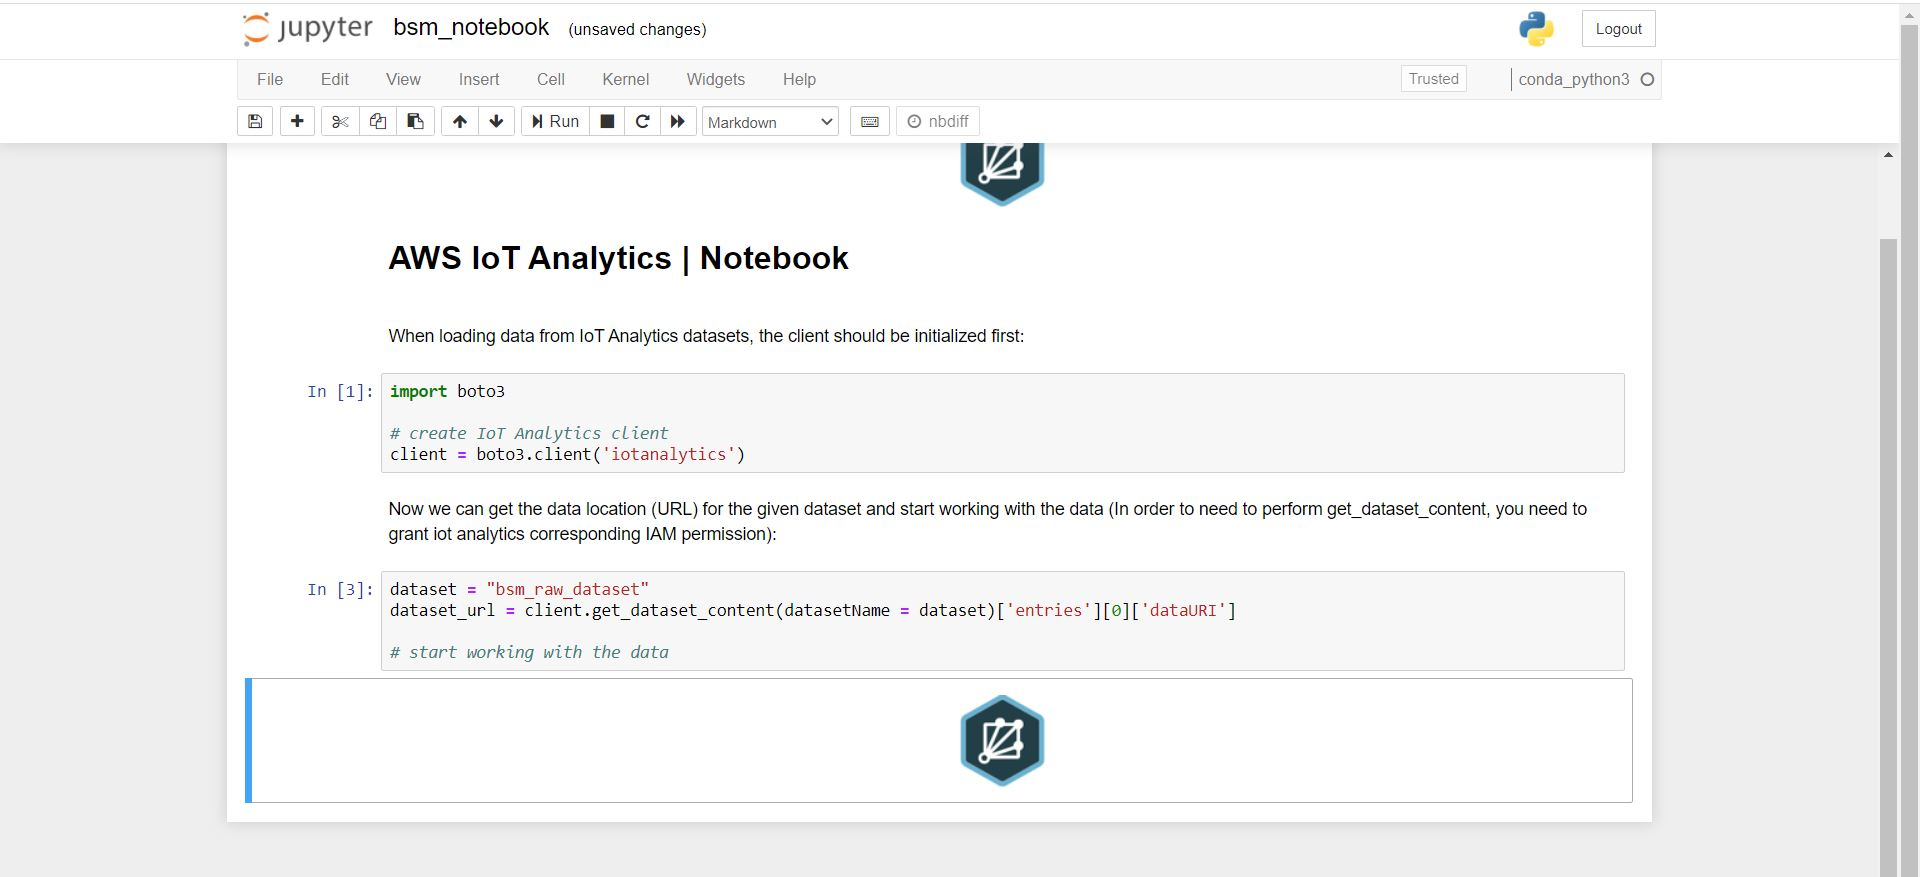

## <font color='blue'> AWS IoT analytics : Stopping Notebook Instance </font>

Once you have created notebook and completed your work, you should stop the running notebook instance. 

To do this go to the notebook and click on the three dots against the notebook instance. 

Click on stop instance and it will do the trick for you. 


# <font color='blue'> BedSideMonitor example </font>

The companion notebook ```BedSideMonitorNotebook.ipynb``` has all the code (with explanations) that should be run in the AWS notebook created above.